In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

# ***Preprocessing***

## ***Rotten Tomatoes***

### ***Đọc dữ liệu***

In [ ]:
tomato = pd.read_csv('Tomatoes_data.csv')
tomato

,Link,Poster Links,Movie_Name,Ratings,Movie_category,Film_Actor,Release_Date,Duration,Original_Language,Companies,Description,Box Office,Certificate (MPAA),Directors,Writing_Credits
0,https://www.rottentomatoes.com/m/juror_2,https://resizing.flixster.com/Uweg-aB2RW7m1tiY...,Juror #2,93%,"Drama, Crime, Mystery & Thriller","Clint Eastwood, Nicholas Hoult, Toni Collette,...","Dec 3, 2024",1h 54m,English,"Malpaso Productions,Dichotomy Films","""Juror #2"" follows family man Justin Kemp (Nic...",NaN,PG-13 (Some Violent Images|Strong Language),Clint Eastwood,Jonathan Abrams
1,https://www.rottentomatoes.com/m/conclave,https://resizing.flixster.com/qjfmXMJ6hiJ7x1WB...,Conclave,93%,"Drama, Mystery & Thriller","Edward Berger, Ralph Fiennes, Stanley Tucci, J...","Nov 26, 2024",2h 0m,English,"FilmNation Entertainment,House Productions",CONCLAVE follows one of the world’s most secre...,$15.0M,PG (Thematic Material and Smoking),Edward Berger,Peter Straughan
2,https://www.rottentomatoes.com/m/the_substance,https://resizing.flixster.com/1UnYNJn2dZk4aAiR...,The Substance,90%,"Drama, Horror","Coralie Fargeat, Demi Moore, Margaret Qualley,...","Oct 31, 2024",2h 21m,English,Working Title Films,Have you ever dreamt of a better version of yo...,$15.5M,R (Graphic Nudity|Gore|Language|Strong Violent...,Coralie Fargeat,Coralie Fargeat
3,https://www.rottentomatoes.com/m/dear_santa_2024,https://resizing.flixster.com/uJQmTX-G8kmT9ro3...,Dear Santa,22%,"Comedy, Holiday, Fantasy","Robert Farrelly, Jack Black, Keegan-Michael Ke...","Nov 25, 2024",1h 48m,English,Conundrum Entertainment,When a young boy mails his Christmas wish list...,NaN,PG-13 (Some Language|Suggestive Material),Robert Farrelly,"Ricky Blitt, Peter Farrelly"
4,https://www.rottentomatoes.com/m/nutcrackers,https://resizing.flixster.com/pL0CpZc9elVbI3cw...,Nutcrackers,43%,"Drama, Comedy, Holiday","David Gordon Green, Ben Stiller, Linda Cardell...","Nov 29, 2024",1h 44m,English,"Rivulet Films,Rough House Pictures",A strait-laced man finds his life suddenly upe...,NaN,NaN,David Gordon Green,Leland Douglas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,https://www.rottentomatoes.com/m/five_nights_a...,https://resizing.flixster.com/LYJAHtmMWytRO5BX...,Five Nights at Freddy's,32%,"Horror, Mystery & Thriller","Emma Tammi, Josh Hutcherson, Elizabeth Lail, K...","Oct 27, 2023",1h 50m,English,"ScottGames,Universal Pictures,Striker Entertai...",The film follows a troubled security guard as ...,$137.3M,PG-13 (Language|Bloody Images|Strong Violent C...,Emma Tammi,"Scott Cawthon, Emma Tammi, Seth Cuddeback"
218,https://www.rottentomatoes.com/m/in_the_land_o...,https://resizing.flixster.com/LVnI-1FL8zRZ7mFN...,In the Land of Saints and Sinners,83%,"Mystery & Thriller, Action","Robert Lorenz, Liam Neeson, Kerry Condon, Jack...","Apr 16, 2024",1h 46m,English,"Saga Film,Facing East Entertainment,Bleiberg E...","Ireland, 1970s. Eager to leave his dark past b...",$56.8K,R (Violence|Language Throughout),Robert Lorenz,"Mark Michael McNally, Terry Loane"
219,https://www.rottentomatoes.com/m/didi_2024,https://resizing.flixster.com/DFH-4JKar738gMko...,Dìdi,96%,"Drama, Comedy","Sean Wang, Izaac Wang, Joan Chen, Shirley Chen...","Sep 3, 2024",1h 34m,English,Unapologetic Projects,"In 2008, during the last month of summer befor...",$4.8M,R (Sexual Material|Language Throughout|Drug an...,Sean Wang,Sean Wang
220,https://www.rottentomatoes.com/m/damsel_2023,https://resizing.flixster.com/sskaBgGy55RvP6NP...,Damsel,56%,"Adventure, Fantasy, Action","Juan Carlos Fresnadillo, Millie Bobby Brown, R...","Mar 8, 2024",1h 47m,English,"PCMA Management and Productions,Roth/Kirschenb...",A dutiful damsel agrees to marry a handsome pr...,NaN,PG-13 (Strong Creature Violence|Bloody Images|...,Juan Carlos Fresnadillo,Dan Mazeau


In [ ]:
tomato.iloc[129]

Link                  https://www.rottentomatoes.com/m/a_nonsense_ch...
Poster Links          https://resizing.flixster.com/KJBNkQfbfPie_OJj...
Movie_Name                  A Nonsense Christmas with Sabrina Carpenter
Ratings                                                             NaN
Movie_category                                  Variety, Holiday, Music
Film_Actor            Sam Wrench, Sabrina Carpenter, Shania Twain, C...
Release_Date                                                Dec 6, 2024
Duration                                                            50m
Original_Language                                               English
Companies                                                           NaN
Description           Pop icon Sabrina Carpenter jingles all the bel...
Box Office                                                          NaN
Certificate (MPAA)                                                  NaN
Directors                                                    Sam

In [ ]:
tomato['Movie_category'].unique()

array(['Drama, Crime, Mystery & Thriller', 'Drama, Mystery & Thriller',
       'Drama, Horror', 'Comedy, Holiday, Fantasy',
       'Drama, Comedy, Holiday', 'Comedy, Holiday, Romance',
       'Animation, Kids & Family, Holiday, Adventure, Comedy',
       'Horror, Mystery & Thriller', 'Comedy, Holiday, Fantasy, Romance',
       'Kids & Family, Animation, Adventure',
       'Kids & Family, Comedy, Holiday',
       'Drama, Comedy, History, Romance', 'Drama, History, War',
       'Drama, Music', 'Comedy, Fantasy',
       'Drama, Adventure, History, Action',
       'Sci-Fi, Drama, Mystery & Thriller, Action', 'Sci-Fi, Horror',
       'Drama, Horror, Mystery & Thriller',
       'Animation, Kids & Family, Adventure, Musical, Comedy',
       'Drama, Romance', 'Music, Drama, Biography',
       'Drama, Comedy, Fantasy', 'Comedy, Adventure, Action',
       'Drama, Crime, Musical', 'Sci-Fi, Adventure, Action',
       'Horror, Holiday, Mystery & Thriller', 'Drama',
       'Mystery & Thriller',
    

### ***Xử lý thuộc tính Movie_category thành dạng đúng***

In [ ]:
# Danh sách thể loại theo nhóm
category_groups = {
    "Action": [
        "Action", "Action Epic", "Martial Arts", "Car Action",
        "One-Person Army Action", "Sword & Sandal", "Superhero"
    ],
    "Adventure": [
        "Adventure", "Desert Adventure", "Urban Adventure", "Sea Adventure",
        "Globetrotting Adventure", "Quest", "Road Trip"
    ],
    "Sci-Fi": [
        "Sci-Fi", "Sci-Fi Epic", "Space Sci-Fi", "Cyberpunk",
        "Dystopian Sci-Fi", "Artificial Intelligence", "Alien Invasion",
        "Time Travel"
    ],
    "Fantasy": [
        "Fantasy", "Fantasy Epic", "Sword & Sorcery", "Supernatural Fantasy",
        "Dark Fantasy", "Fairy Tale", "Steampunk"
    ],
    "Horror": [
        "Horror", "Supernatural Horror", "Psychological Horror",
        "Slasher Horror", "Zombie Horror", "Monster Horror",
        "Body Horror", "Found Footage Horror", "Vampire Horror"
    ],
    "Romance": [
        "Romance", "Romantic Comedy", "Feel-Good Romance", "Steamy Romance",
        "Holiday Romance", "Tragic Romance", "Teen Romance",
        "Dark Romance", "Romantic Epic"
    ],
    "Comedy": [
        "Comedy", "Dark Comedy", "Sitcom", "Teen Comedy", "Raunchy Comedy",
        "Slapstick", "Parody", "High-Concept Comedy", "Buddy Comedy",
        "Holiday Comedy", "Quirky Comedy", "Satire", "Farce"
    ],
    "Drama": [
        "Drama", "Period Drama", "Medical Drama", "Legal Drama",
        "Historical Drama", "Workplace Drama", "Showbiz Drama",
        "Cop Drama", "Political Drama", "Financial Drama", "Prison Drama",
        "War", "True Crime"
    ],
    "Mystery & Thriller": [
        "Mystery", "Suspense Mystery", "Whodunnit", "Crime",
        "Hard-boiled Detective", "Cozy Mystery", "Serial Killer", "Cyber Thriller",
        "Police Procedural", "Conspiracy Thriller", "Psychological Thriller","Legal TThriller","Thriller","Mystery & Thriller"
    ],
    "Animation": [
        "Animation", "Computer Animation", "Hand-Drawn Animation",
        "Adult Animation", "Anime", "Shōnen"
    ],
    "Kids & Family": [
        "Kids & Family", "Family", "Holiday Family", "Family Animation", "Holiday"
    ],
    "Sports": [
        "Soccer", "Sports"
    ],
    "LGBTQ+": [
        "LGBTQ+"
    ],
    "Documentary": ["Documentary"]
    ,
    "Musical": ["Musical", "Music"]
}


In [ ]:
# Tạo dictionary ánh xạ thể loại phim đến nhóm
category_map = {}
for group, categories in category_groups.items():
    for category in categories:
        category_map[category] = group

In [ ]:
def map_category_to_group(categories):
    if isinstance(categories, list):
        category_list = categories
    else:
        category_list = [category.strip() for category in categories.split(',')]

    mapped_groups = {category_map[cat] for cat in category_list if cat in category_map}
    return ', '.join(sorted(mapped_groups))


tomato['Movie_category'] = tomato['Movie_category'].apply(map_category_to_group)

In [ ]:
all_genres = tomato['Movie_category'].str.split(', ').explode().str.strip()
# Đếm tần suất xuất hiện của từng thể loại
all_genres.value_counts()

Movie_category
Drama                 90
Comedy                82
Mystery & Thriller    78
Action                61
Kids & Family         55
Adventure             51
Fantasy               38
Horror                37
Sci-Fi                29
Romance               25
Animation             15
Musical               10
Documentary            7
LGBTQ+                 5
Name: count, dtype: int64

In [ ]:
tomato[tomato['Movie_category'] == '']

,Link,Poster Links,Movie_Name,Ratings,Movie_category,Film_Actor,Release_Date,Duration,Original_Language,Companies,Description,Box Office,Certificate (MPAA),Directors,Writing_Credits


### ***Xử lý thuộc tính Certificate (MPAA) thành dạng giống Tomato***

In [ ]:
tomato["Certificate (MPAA)"] = tomato["Certificate (MPAA)"].str.replace(r"\s*\(.*?\)", "", regex=True)
tomato

,Link,Poster Links,Movie_Name,Ratings,Movie_category,Film_Actor,Release_Date,Duration,Original_Language,Companies,Description,Box Office,Certificate (MPAA),Directors,Writing_Credits
0,https://www.rottentomatoes.com/m/juror_2,https://resizing.flixster.com/Uweg-aB2RW7m1tiY...,Juror #2,93%,"Drama, Mystery & Thriller","Clint Eastwood, Nicholas Hoult, Toni Collette,...","Dec 3, 2024",1h 54m,English,"Malpaso Productions,Dichotomy Films","""Juror #2"" follows family man Justin Kemp (Nic...",NaN,PG-13,Clint Eastwood,Jonathan Abrams
1,https://www.rottentomatoes.com/m/conclave,https://resizing.flixster.com/qjfmXMJ6hiJ7x1WB...,Conclave,93%,"Drama, Mystery & Thriller","Edward Berger, Ralph Fiennes, Stanley Tucci, J...","Nov 26, 2024",2h 0m,English,"FilmNation Entertainment,House Productions",CONCLAVE follows one of the world’s most secre...,$15.0M,PG,Edward Berger,Peter Straughan
2,https://www.rottentomatoes.com/m/the_substance,https://resizing.flixster.com/1UnYNJn2dZk4aAiR...,The Substance,90%,"Drama, Horror","Coralie Fargeat, Demi Moore, Margaret Qualley,...","Oct 31, 2024",2h 21m,English,Working Title Films,Have you ever dreamt of a better version of yo...,$15.5M,R,Coralie Fargeat,Coralie Fargeat
3,https://www.rottentomatoes.com/m/dear_santa_2024,https://resizing.flixster.com/uJQmTX-G8kmT9ro3...,Dear Santa,22%,"Comedy, Fantasy, Kids & Family","Robert Farrelly, Jack Black, Keegan-Michael Ke...","Nov 25, 2024",1h 48m,English,Conundrum Entertainment,When a young boy mails his Christmas wish list...,NaN,PG-13,Robert Farrelly,"Ricky Blitt, Peter Farrelly"
4,https://www.rottentomatoes.com/m/nutcrackers,https://resizing.flixster.com/pL0CpZc9elVbI3cw...,Nutcrackers,43%,"Comedy, Drama, Kids & Family","David Gordon Green, Ben Stiller, Linda Cardell...","Nov 29, 2024",1h 44m,English,"Rivulet Films,Rough House Pictures",A strait-laced man finds his life suddenly upe...,NaN,NaN,David Gordon Green,Leland Douglas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,https://www.rottentomatoes.com/m/five_nights_a...,https://resizing.flixster.com/LYJAHtmMWytRO5BX...,Five Nights at Freddy's,32%,"Horror, Mystery & Thriller","Emma Tammi, Josh Hutcherson, Elizabeth Lail, K...","Oct 27, 2023",1h 50m,English,"ScottGames,Universal Pictures,Striker Entertai...",The film follows a troubled security guard as ...,$137.3M,PG-13,Emma Tammi,"Scott Cawthon, Emma Tammi, Seth Cuddeback"
218,https://www.rottentomatoes.com/m/in_the_land_o...,https://resizing.flixster.com/LVnI-1FL8zRZ7mFN...,In the Land of Saints and Sinners,83%,"Action, Mystery & Thriller","Robert Lorenz, Liam Neeson, Kerry Condon, Jack...","Apr 16, 2024",1h 46m,English,"Saga Film,Facing East Entertainment,Bleiberg E...","Ireland, 1970s. Eager to leave his dark past b...",$56.8K,R,Robert Lorenz,"Mark Michael McNally, Terry Loane"
219,https://www.rottentomatoes.com/m/didi_2024,https://resizing.flixster.com/DFH-4JKar738gMko...,Dìdi,96%,"Comedy, Drama","Sean Wang, Izaac Wang, Joan Chen, Shirley Chen...","Sep 3, 2024",1h 34m,English,Unapologetic Projects,"In 2008, during the last month of summer befor...",$4.8M,R,Sean Wang,Sean Wang
220,https://www.rottentomatoes.com/m/damsel_2023,https://resizing.flixster.com/sskaBgGy55RvP6NP...,Damsel,56%,"Action, Adventure, Fantasy","Juan Carlos Fresnadillo, Millie Bobby Brown, R...","Mar 8, 2024",1h 47m,English,"PCMA Management and Productions,Roth/Kirschenb...",A dutiful damsel agrees to marry a handsome pr...,NaN,PG-13,Juan Carlos Fresnadillo,Dan Mazeau


In [ ]:
tomato['Certificate (MPAA)'].unique()

array(['PG-13', 'PG', 'R', nan, 'G', 'TV-PG'], dtype=object)

### ***Bỏ cột Poster Links***

In [ ]:
tomato = tomato.drop(columns=['Poster Links'])
tomato

,Link,Movie_Name,Ratings,Movie_category,Film_Actor,Release_Date,Duration,Original_Language,Companies,Description,Box Office,Certificate (MPAA),Directors,Writing_Credits
0,https://www.rottentomatoes.com/m/juror_2,Juror #2,93%,"Drama, Mystery & Thriller","Clint Eastwood, Nicholas Hoult, Toni Collette,...","Dec 3, 2024",1h 54m,English,"Malpaso Productions,Dichotomy Films","""Juror #2"" follows family man Justin Kemp (Nic...",NaN,PG-13,Clint Eastwood,Jonathan Abrams
1,https://www.rottentomatoes.com/m/conclave,Conclave,93%,"Drama, Mystery & Thriller","Edward Berger, Ralph Fiennes, Stanley Tucci, J...","Nov 26, 2024",2h 0m,English,"FilmNation Entertainment,House Productions",CONCLAVE follows one of the world’s most secre...,$15.0M,PG,Edward Berger,Peter Straughan
2,https://www.rottentomatoes.com/m/the_substance,The Substance,90%,"Drama, Horror","Coralie Fargeat, Demi Moore, Margaret Qualley,...","Oct 31, 2024",2h 21m,English,Working Title Films,Have you ever dreamt of a better version of yo...,$15.5M,R,Coralie Fargeat,Coralie Fargeat
3,https://www.rottentomatoes.com/m/dear_santa_2024,Dear Santa,22%,"Comedy, Fantasy, Kids & Family","Robert Farrelly, Jack Black, Keegan-Michael Ke...","Nov 25, 2024",1h 48m,English,Conundrum Entertainment,When a young boy mails his Christmas wish list...,NaN,PG-13,Robert Farrelly,"Ricky Blitt, Peter Farrelly"
4,https://www.rottentomatoes.com/m/nutcrackers,Nutcrackers,43%,"Comedy, Drama, Kids & Family","David Gordon Green, Ben Stiller, Linda Cardell...","Nov 29, 2024",1h 44m,English,"Rivulet Films,Rough House Pictures",A strait-laced man finds his life suddenly upe...,NaN,NaN,David Gordon Green,Leland Douglas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,https://www.rottentomatoes.com/m/five_nights_a...,Five Nights at Freddy's,32%,"Horror, Mystery & Thriller","Emma Tammi, Josh Hutcherson, Elizabeth Lail, K...","Oct 27, 2023",1h 50m,English,"ScottGames,Universal Pictures,Striker Entertai...",The film follows a troubled security guard as ...,$137.3M,PG-13,Emma Tammi,"Scott Cawthon, Emma Tammi, Seth Cuddeback"
218,https://www.rottentomatoes.com/m/in_the_land_o...,In the Land of Saints and Sinners,83%,"Action, Mystery & Thriller","Robert Lorenz, Liam Neeson, Kerry Condon, Jack...","Apr 16, 2024",1h 46m,English,"Saga Film,Facing East Entertainment,Bleiberg E...","Ireland, 1970s. Eager to leave his dark past b...",$56.8K,R,Robert Lorenz,"Mark Michael McNally, Terry Loane"
219,https://www.rottentomatoes.com/m/didi_2024,Dìdi,96%,"Comedy, Drama","Sean Wang, Izaac Wang, Joan Chen, Shirley Chen...","Sep 3, 2024",1h 34m,English,Unapologetic Projects,"In 2008, during the last month of summer befor...",$4.8M,R,Sean Wang,Sean Wang
220,https://www.rottentomatoes.com/m/damsel_2023,Damsel,56%,"Action, Adventure, Fantasy","Juan Carlos Fresnadillo, Millie Bobby Brown, R...","Mar 8, 2024",1h 47m,English,"PCMA Management and Productions,Roth/Kirschenb...",A dutiful damsel agrees to marry a handsome pr...,NaN,PG-13,Juan Carlos Fresnadillo,Dan Mazeau


### ***Thêm khoảng cách sau dấu phẩy***

In [ ]:
tomato["Companies"] = tomato["Companies"].str.replace(r",", ", ", regex=True)
tomato

,Link,Movie_Name,Ratings,Movie_category,Film_Actor,Release_Date,Duration,Original_Language,Companies,Description,Box Office,Certificate (MPAA),Directors,Writing_Credits
0,https://www.rottentomatoes.com/m/juror_2,Juror #2,93%,"Drama, Mystery & Thriller","Clint Eastwood, Nicholas Hoult, Toni Collette,...","Dec 3, 2024",1h 54m,English,"Malpaso Productions, Dichotomy Films","""Juror #2"" follows family man Justin Kemp (Nic...",NaN,PG-13,Clint Eastwood,Jonathan Abrams
1,https://www.rottentomatoes.com/m/conclave,Conclave,93%,"Drama, Mystery & Thriller","Edward Berger, Ralph Fiennes, Stanley Tucci, J...","Nov 26, 2024",2h 0m,English,"FilmNation Entertainment, House Productions",CONCLAVE follows one of the world’s most secre...,$15.0M,PG,Edward Berger,Peter Straughan
2,https://www.rottentomatoes.com/m/the_substance,The Substance,90%,"Drama, Horror","Coralie Fargeat, Demi Moore, Margaret Qualley,...","Oct 31, 2024",2h 21m,English,Working Title Films,Have you ever dreamt of a better version of yo...,$15.5M,R,Coralie Fargeat,Coralie Fargeat
3,https://www.rottentomatoes.com/m/dear_santa_2024,Dear Santa,22%,"Comedy, Fantasy, Kids & Family","Robert Farrelly, Jack Black, Keegan-Michael Ke...","Nov 25, 2024",1h 48m,English,Conundrum Entertainment,When a young boy mails his Christmas wish list...,NaN,PG-13,Robert Farrelly,"Ricky Blitt, Peter Farrelly"
4,https://www.rottentomatoes.com/m/nutcrackers,Nutcrackers,43%,"Comedy, Drama, Kids & Family","David Gordon Green, Ben Stiller, Linda Cardell...","Nov 29, 2024",1h 44m,English,"Rivulet Films, Rough House Pictures",A strait-laced man finds his life suddenly upe...,NaN,NaN,David Gordon Green,Leland Douglas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,https://www.rottentomatoes.com/m/five_nights_a...,Five Nights at Freddy's,32%,"Horror, Mystery & Thriller","Emma Tammi, Josh Hutcherson, Elizabeth Lail, K...","Oct 27, 2023",1h 50m,English,"ScottGames, Universal Pictures, Striker Entert...",The film follows a troubled security guard as ...,$137.3M,PG-13,Emma Tammi,"Scott Cawthon, Emma Tammi, Seth Cuddeback"
218,https://www.rottentomatoes.com/m/in_the_land_o...,In the Land of Saints and Sinners,83%,"Action, Mystery & Thriller","Robert Lorenz, Liam Neeson, Kerry Condon, Jack...","Apr 16, 2024",1h 46m,English,"Saga Film, Facing East Entertainment, Bleiberg...","Ireland, 1970s. Eager to leave his dark past b...",$56.8K,R,Robert Lorenz,"Mark Michael McNally, Terry Loane"
219,https://www.rottentomatoes.com/m/didi_2024,Dìdi,96%,"Comedy, Drama","Sean Wang, Izaac Wang, Joan Chen, Shirley Chen...","Sep 3, 2024",1h 34m,English,Unapologetic Projects,"In 2008, during the last month of summer befor...",$4.8M,R,Sean Wang,Sean Wang
220,https://www.rottentomatoes.com/m/damsel_2023,Damsel,56%,"Action, Adventure, Fantasy","Juan Carlos Fresnadillo, Millie Bobby Brown, R...","Mar 8, 2024",1h 47m,English,"PCMA Management and Productions, Roth/Kirschen...",A dutiful damsel agrees to marry a handsome pr...,NaN,PG-13,Juan Carlos Fresnadillo,Dan Mazeau


## ***IMDB***

### ***Đọc các file imdb***

In [ ]:
imdb_1 = pd.read_csv('IMDB_1_500.csv')
imdb_2 = pd.read_csv('IMDB_501_1000.csv')
imdb_3 = pd.read_csv('IMDB_1001_1500.csv')
imdb_4 = pd.read_csv('IMDB_1501_2000.csv')
imdb_5 = pd.read_csv('IMDB_2001_2500.csv')
imdb_6 = pd.read_csv('IMDB_2501_3000.csv')
imdb_7 = pd.read_csv('IMDB_3001_3500.csv')
imdb_8 = pd.read_csv('IMDB_3501_4000.csv')
imdb_9 = pd.read_csv('IMDB_4001_4500.csv')
imdb_10 = pd.read_csv('IMDB_4501_5000.csv')

In [ ]:
imdb_1.isna().sum()

Links                  0
Poster                 0
Movie                  0
Actors                 1
Duration              54
Ratings               19
Release Date           0
Country                1
Budget               360
Box Office           365
Certificate           46
Original Language      2
Companies              3
Genres                 0
Directors              1
Writing Credits        3
Descriptions           0
dtype: int64

In [ ]:
imdb_2.isna().sum()

Links                  0
Poster                 0
Movie                  0
Actors                 1
Duration              29
Ratings               10
Release Date           1
Country                2
Budget               254
Box Office           261
Certificate           36
Original Language      5
Companies              6
Genres                 0
Directors              5
Writing Credits        7
Descriptions           0
dtype: int64

In [ ]:
imdb_3.isna().sum()

Links                  0
Poster                 1
Movie                  0
Actors                 0
Duration              33
Ratings               16
Release Date           2
Country                0
Budget               238
Box Office           247
Certificate           39
Original Language      3
Companies              4
Genres                 0
Directors              1
Writing Credits        4
Descriptions           0
dtype: int64

In [ ]:
imdb_4.isna().sum()

Links                  0
Poster                 4
Movie                  0
Actors                 1
Duration              27
Ratings               19
Release Date           2
Country                0
Budget               231
Box Office           238
Certificate           36
Original Language      4
Companies              5
Genres                 2
Directors              2
Writing Credits        5
Descriptions           0
dtype: int64

In [ ]:
imdb_5.isna().sum()

Links                  0
Poster                 1
Movie                  0
Actors                 1
Duration              26
Ratings               10
Release Date           2
Country                2
Budget               219
Box Office           231
Certificate           44
Original Language      5
Companies              5
Genres                 0
Directors              5
Writing Credits        5
Descriptions           0
dtype: int64

In [ ]:
imdb_6.isna().sum()

Links                  0
Poster                 2
Movie                  0
Actors                 1
Duration              28
Ratings               11
Release Date           1
Country                1
Budget               217
Box Office           230
Certificate           44
Original Language      6
Companies              5
Genres                 1
Directors              4
Writing Credits        9
Descriptions           0
dtype: int64

In [ ]:
imdb_7.isna().sum()

Links                  0
Poster                 2
Movie                  0
Actors                 1
Duration              26
Ratings               10
Release Date           1
Country                2
Budget               224
Box Office           238
Certificate           44
Original Language      7
Companies              6
Genres                 0
Directors              4
Writing Credits        9
Descriptions           0
dtype: int64

In [ ]:
imdb_9.isna().sum()

Links                  0
Poster                 6
Movie                  0
Actors                 1
Duration              27
Ratings               16
Release Date           8
Country                3
Budget               231
Box Office           245
Certificate           55
Original Language      8
Companies              7
Genres                 0
Directors              3
Writing Credits        4
Descriptions           0
dtype: int64

In [ ]:
imdb_10.isna().sum()

Links                  0
Poster                 1
Movie                  0
Actors                 0
Duration              21
Ratings                8
Release Date           1
Country                2
Budget               239
Box Office           262
Certificate           38
Original Language      6
Companies              5
Genres                 0
Directors              3
Writing Credits        6
Descriptions           0
dtype: int64

### ***Gộp các file imdb lại với nhau***

In [ ]:
dataframes = [imdb_1, imdb_2, imdb_3, imdb_4, imdb_5, imdb_6, imdb_7, imdb_8, imdb_9, imdb_10]
imdb = pd.concat(dataframes)
imdb

,Links,Poster,Movie,Actors,Duration,Ratings,Release Date,Country,Budget,Box Office,Certificate,Original Language,Companies,Genres,Directors,Writing Credits,Descriptions
0,https://www.imdb.com/title/tt1262426/?ref_=sr_t_1,https://m.media-amazon.com/images/M/MV5BOWMwYj...,Wicked,"Cynthia Erivo, Ariana Grande, Jeff Goldblum, M...",2 hours 40 minutes,8.1,"November 22, 2024 (United States)",United States,"$150,000,000 (estimated)","$460,849,795",PG,English,"Universal Pictures, Marc Platt Productions, SK...","Fairy Tale, Pop Musical, Fantasy, Musical, Rom...",Jon M. Chu,"Winnie Holzman, Dana Fox, Winnie Holzman, Greg...","Elphaba, a misunderstood young woman because o..."
1,https://www.imdb.com/title/tt4236770/?ref_=sr_t_2,https://m.media-amazon.com/images/M/MV5BYzE2OD...,Yellowstone,"Kevin Costner, Luke Grimes, Kelly Reilly, Wes ...",1 hour,8.7,"June 20, 2018 (United States)",United States,NaN,NaN,TV-MA,English,"Paramount Network, 101 Studios, Linson Enterta...","Contemporary Western, Epic, Western Epic, Dram...","Stephen Kay, Christina Alexandra Voros, Taylor...","John Linson, John Linson, Taylor Sheridan, Tay...",A ranching family in Montana faces off against...
2,https://www.imdb.com/title/tt11126994/?ref_=sr...,https://m.media-amazon.com/images/M/MV5BOWJhYj...,Arcane,"Kevin Alejandro, Hailee Steinfeld, Ella Purnel...",40 minutes,9.1,"November 6, 2021 (United States)",United States,NaN,NaN,TV-14,English,"Riot Games, Fortiche Production","Action Epic, Adult Animation, Computer Animati...","Pascal Charrue, Arnaud Delord, Barth Maunoury,...","Mollie Bickley St. John, Ash Brannon, Ash Bran...",Amid the stark discord of twin cities Piltover...
3,https://www.imdb.com/title/tt13622970/?ref_=sr...,https://m.media-amazon.com/images/M/MV5BZDUxNT...,Moana 2,"Auli'i Cravalho, Dwayne Johnson, Hualalai Chun...",1 hour 40 minutes,7.1,"November 27, 2024 (United States)",United States,"$150,000,000 (estimated)","$601,828,622",PG,English,"Disney Television Animation, The Walt Disney C...","Computer Animation, Sea Adventure, Adventure, ...","David G. Derrick Jr., Jason Hand, Dana Ledoux ...","Jared Bush, Dana Ledoux Miller, Jared Bush, Da...",After receiving an unexpected call from her wa...
4,https://www.imdb.com/title/tt20600980/?ref_=sr...,https://m.media-amazon.com/images/M/MV5BN2VlZj...,Skeleton Crew,"Dominic Burgess, Jude Law, Ryan Kiera Armstron...",NaN,7.2,"December 2, 2024 (United States)",United States,NaN,NaN,TV-PG,English,"Lucasfilm, The Walt Disney Company","Space Sci-Fi, Action, Adventure, Sci-Fi","Jon Watts, David Lowery, Bryce Dallas Howard, ...","Christopher Ford, Christopher Ford, George Luc...",Four kids make a mysterious discovery on their...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,https://www.imdb.com/title/tt1353056/?ref_=sr_...,https://m.media-amazon.com/images/M/MV5BZDg4OT...,RuPaul's Drag Race,"RuPaul, Michelle Visage, Ross Mathews, Jason C...",1 hour 3 minutes,8.5,"February 2, 2009 (United States)",United States,NaN,NaN,TV-14,English,World of Wonder Productions,"Beauty Competition, Talent Competition, Game S...","Nick Murray, Bob McKinnon, Ian Stevenson, Just...","RuPaul, Michelle Visage, Merle Ginsberg",RuPaul searches for America's next drag supers...
496,https://www.imdb.com/title/tt0106701/?ref_=sr_...,https://m.media-amazon.com/images/M/MV5BMWZhMT...,Dennis the Menace,"Walter Matthau, Mason Gamble, Joan Plowright, ...",1 hour 34 minutes,5.7,"June 25, 1993 (United States)",United States,NaN,NaN,PG,English,"Warner Bros., Hughes Entertainment, Warner Bro...","Slapstick, Comedy, Family",Nick Castle,"Hank Ketcham, John Hughes",When his parents must go out of town on busine...
497,https://www.imdb.com/title/tt0066995/?ref_=sr_...,https://m.media-amazon.com/images/M/MV5BMTEwMT...,Diamonds Are Forever,"Sean Connery, Jill St. John, Charles Gray, Lan...",2 hours,6.5,"December 17, 1971 (United States)",United Kingdom,"$7,200,000 (estimated)","$43,830,091",PG,English,Eon Productions,"Spy, Acti

In [ ]:
imdb.isna().sum()

Links                   0
Poster                 20
Movie                   0
Actors                  7
Duration              309
Ratings               135
Release Date           23
Country                14
Budget               2461
Box Office           2583
Certificate           425
Original Language      53
Companies              52
Genres                  3
Directors              30
Writing Credits        55
Descriptions            0
dtype: int64

### ***Bỏ cột Country, Budget để giống với số lượng dữ liệu của bộ Tomato***

In [ ]:
imdb.drop(columns = ['Country','Budget'], inplace = True)

### ***Chuyển đổi thuộc tính Duration để giống Tomato***

In [ ]:
def convert_time_format(time_string):
    if pd.isna(time_string):
        return time_string
    time_string = str(time_string)
    # Thay thế "hours", "hour", "minutes", "minute" bằng "h" và "m"
    time_string = time_string.replace(" hours", "h").replace(" hour", "h").replace(" minutes", "m").replace(" minute", "m")
    return " ".join(time_string.split())

imdb['Duration'] = imdb['Duration'].apply(convert_time_format)
imdb

,Links,Poster,Movie,Actors,Duration,Ratings,Release Date,Box Office,Certificate,Original Language,Companies,Genres,Directors,Writing Credits,Descriptions
0,https://www.imdb.com/title/tt1262426/?ref_=sr_t_1,https://m.media-amazon.com/images/M/MV5BOWMwYj...,Wicked,"Cynthia Erivo, Ariana Grande, Jeff Goldblum, M...",2h 40m,8.1,"November 22, 2024 (United States)","$460,849,795",PG,English,"Universal Pictures, Marc Platt Productions, SK...","Fairy Tale, Pop Musical, Fantasy, Musical, Rom...",Jon M. Chu,"Winnie Holzman, Dana Fox, Winnie Holzman, Greg...","Elphaba, a misunderstood young woman because o..."
1,https://www.imdb.com/title/tt4236770/?ref_=sr_t_2,https://m.media-amazon.com/images/M/MV5BYzE2OD...,Yellowstone,"Kevin Costner, Luke Grimes, Kelly Reilly, Wes ...",1h,8.7,"June 20, 2018 (United States)",NaN,TV-MA,English,"Paramount Network, 101 Studios, Linson Enterta...","Contemporary Western, Epic, Western Epic, Dram...","Stephen Kay, Christina Alexandra Voros, Taylor...","John Linson, John Linson, Taylor Sheridan, Tay...",A ranching family in Montana faces off against...
2,https://www.imdb.com/title/tt11126994/?ref_=sr...,https://m.media-amazon.com/images/M/MV5BOWJhYj...,Arcane,"Kevin Alejandro, Hailee Steinfeld, Ella Purnel...",40m,9.1,"November 6, 2021 (United States)",NaN,TV-14,English,"Riot Games, Fortiche Production","Action Epic, Adult Animation, Computer Animati...","Pascal Charrue, Arnaud Delord, Barth Maunoury,...","Mollie Bickley St. John, Ash Brannon, Ash Bran...",Amid the stark discord of twin cities Piltover...
3,https://www.imdb.com/title/tt13622970/?ref_=sr...,https://m.media-amazon.com/images/M/MV5BZDUxNT...,Moana 2,"Auli'i Cravalho, Dwayne Johnson, Hualalai Chun...",1h 40m,7.1,"November 27, 2024 (United States)","$601,828,622",PG,English,"Disney Television Animation, The Walt Disney C...","Computer Animation, Sea Adventure, Adventure, ...","David G. Derrick Jr., Jason Hand, Dana Ledoux ...","Jared Bush, Dana Ledoux Miller, Jared Bush, Da...",After receiving an unexpected call from her wa...
4,https://www.imdb.com/title/tt20600980/?ref_=sr...,https://m.media-amazon.com/images/M/MV5BN2VlZj...,Skeleton Crew,"Dominic Burgess, Jude Law, Ryan Kiera Armstron...",NaN,7.2,"December 2, 2024 (United States)",NaN,TV-PG,English,"Lucasfilm, The Walt Disney Company","Space Sci-Fi, Action, Adventure, Sci-Fi","Jon Watts, David Lowery, Bryce Dallas Howard, ...","Christopher Ford, Christopher Ford, George Luc...",Four kids make a mysterious discovery on their...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,https://www.imdb.com/title/tt1353056/?ref_=sr_...,https://m.media-amazon.com/images/M/MV5BZDg4OT...,RuPaul's Drag Race,"RuPaul, Michelle Visage, Ross Mathews, Jason C...",1h 3m,8.5,"February 2, 2009 (United States)",NaN,TV-14,English,World of Wonder Productions,"Beauty Competition, Talent Competition, Game S...","Nick Murray, Bob McKinnon, Ian Stevenson, Just...","RuPaul, Michelle Visage, Merle Ginsberg",RuPaul searches for America's next drag supers...
496,https://www.imdb.com/title/tt0106701/?ref_=sr_...,https://m.media-amazon.com/images/M/MV5BMWZhMT...,Dennis the Menace,"Walter Matthau, Mason Gamble, Joan Plowright, ...",1h 34m,5.7,"June 25, 1993 (United States)",NaN,PG,English,"Warner Bros., Hughes Entertainment, Warner Bro...","Slapstick, Comedy, Family",Nick Castle,"Hank Ketcham, John Hughes",When his parents must go out of town on busine...
497,https://www.imdb.com/title/tt0066995/?ref_=sr_...,https://m.media-amazon.com/images/M/MV5BMTEwMT...,Diamonds Are Forever,"Sean Connery, Jill St. John, Charles Gray, Lan...",2h,6.5,"December 17, 1971 (United States)","$43,830,091",PG,English,Eon Productions,"Spy, Action, Adventure, Thriller",Guy Hamilton,"Richard Maibaum, Tom Mankiewicz, Ian Fleming",A diamond smuggling investigation leads James ...
498,https://www.imdb.com/title/tt0067023/?ref_=sr_...,https://m.media-amazon.com/images/M/MV5BN2ZhYj...,Duel,"Dennis Weaver, Jacqueline Scott, Eddie Firesto...",

### ***Thay đổi thứ tự các thuộc tính***

In [ ]:
new_order = ['Links', 'Movie', 'Ratings', 'Genres', 'Actors', 'Release Date', 'Duration', 'Original Language', 'Companies', 'Descriptions', 'Box Office', 'Certificate', 'Directors', 'Writing Credits']
imdb = imdb[new_order]
imdb

,Links,Movie,Ratings,Genres,Actors,Release Date,Duration,Original Language,Companies,Descriptions,Box Office,Certificate,Directors,Writing Credits
0,https://www.imdb.com/title/tt1262426/?ref_=sr_t_1,Wicked,8.1,"Fairy Tale, Pop Musical, Fantasy, Musical, Rom...","Cynthia Erivo, Ariana Grande, Jeff Goldblum, M...","November 22, 2024 (United States)",2h 40m,English,"Universal Pictures, Marc Platt Productions, SK...","Elphaba, a misunderstood young woman because o...","$460,849,795",PG,Jon M. Chu,"Winnie Holzman, Dana Fox, Winnie Holzman, Greg..."
1,https://www.imdb.com/title/tt4236770/?ref_=sr_t_2,Yellowstone,8.7,"Contemporary Western, Epic, Western Epic, Dram...","Kevin Costner, Luke Grimes, Kelly Reilly, Wes ...","June 20, 2018 (United States)",1h,English,"Paramount Network, 101 Studios, Linson Enterta...",A ranching family in Montana faces off against...,NaN,TV-MA,"Stephen Kay, Christina Alexandra Voros, Taylor...","John Linson, John Linson, Taylor Sheridan, Tay..."
2,https://www.imdb.com/title/tt11126994/?ref_=sr...,Arcane,9.1,"Action Epic, Adult Animation, Computer Animati...","Kevin Alejandro, Hailee Steinfeld, Ella Purnel...","November 6, 2021 (United States)",40m,English,"Riot Games, Fortiche Production",Amid the stark discord of twin cities Piltover...,NaN,TV-14,"Pascal Charrue, Arnaud Delord, Barth Maunoury,...","Mollie Bickley St. John, Ash Brannon, Ash Bran..."
3,https://www.imdb.com/title/tt13622970/?ref_=sr...,Moana 2,7.1,"Computer Animation, Sea Adventure, Adventure, ...","Auli'i Cravalho, Dwayne Johnson, Hualalai Chun...","November 27, 2024 (United States)",1h 40m,English,"Disney Television Animation, The Walt Disney C...",After receiving an unexpected call from her wa...,"$601,828,622",PG,"David G. Derrick Jr., Jason Hand, Dana Ledoux ...","Jared Bush, Dana Ledoux Miller, Jared Bush, Da..."
4,https://www.imdb.com/title/tt20600980/?ref_=sr...,Skeleton Crew,7.2,"Space Sci-Fi, Action, Adventure, Sci-Fi","Dominic Burgess, Jude Law, Ryan Kiera Armstron...","December 2, 2024 (United States)",NaN,English,"Lucasfilm, The Walt Disney Company",Four kids make a mysterious discovery on their...,NaN,TV-PG,"Jon Watts, David Lowery, Bryce Dallas Howard, ...","Christopher Ford, Christopher Ford, George Luc..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,https://www.imdb.com/title/tt1353056/?ref_=sr_...,RuPaul's Drag Race,8.5,"Beauty Competition, Talent Competition, Game S...","RuPaul, Michelle Visage, Ross Mathews, Jason C...","February 2, 2009 (United States)",1h 3m,English,World of Wonder Productions,RuPaul searches for America's next drag supers...,NaN,TV-14,"Nick Murray, Bob McKinnon, Ian Stevenson, Just...","RuPaul, Michelle Visage, Merle Ginsberg"
496,https://www.imdb.com/title/tt0106701/?ref_=sr_...,Dennis the Menace,5.7,"Slapstick, Comedy, Family","Walter Matthau, Mason Gamble, Joan Plowright, ...","June 25, 1993 (United States)",1h 34m,English,"Warner Bros., Hughes Entertainment, Warner Bro...",When his parents must go out of town on busine...,NaN,PG,Nick Castle,"Hank Ketcham, John Hughes"
497,https://www.imdb.com/title/tt0066995/?ref_=sr_...,Diamonds Are Forever,6.5,"Spy, Action, Adventure, Thriller","Sean Connery, Jill St. John, Charles Gray, Lan...","December 17, 1971 (United States)",2h,English,Eon Productions,A diamond smuggling investigation leads James ...,"$43,830,091",PG,Guy Hamilton,"Richard Maibaum, Tom Mankiewicz, Ian Fleming"
498,https://www.imdb.com/title/tt0067023/?ref_=sr_...,Duel,7.6,"Psychological Thriller, Action, Thriller","Dennis Weaver, Jacqueline Scott, Eddie Firesto...","November 13, 1971 (United States)",1h 30m,English,Universal Television,A business commuter is pursued and terrorized ...,"$2,544",PG,Steven Spielberg,"Richard Matheson, Richard Matheson"


### ***Rename để giống Tomato***

In [ ]:
imdb = imdb.rename(columns={'Links': 'Link',
                            'Movie': 'Movie_Name',
                            'Genres' : 'Movie_category',
                            'Actors' : 'Film_Actor',
                            'Release Date' : 'Release_Date',
                            'Original Language' : 'Original_Language',
                            'Descriptions' : 'Description',
                            'Certificate' : 'Certificate (MPAA)',
                            'Writing Credits' : 'Writing_Credits'
                            })
imdb

,Link,Movie_Name,Ratings,Movie_category,Film_Actor,Release_Date,Duration,Original_Language,Companies,Description,Box Office,Certificate (MPAA),Directors,Writing_Credits
0,https://www.imdb.com/title/tt1262426/?ref_=sr_t_1,Wicked,8.1,"Fairy Tale, Pop Musical, Fantasy, Musical, Rom...","Cynthia Erivo, Ariana Grande, Jeff Goldblum, M...","November 22, 2024 (United States)",2h 40m,English,"Universal Pictures, Marc Platt Productions, SK...","Elphaba, a misunderstood young woman because o...","$460,849,795",PG,Jon M. Chu,"Winnie Holzman, Dana Fox, Winnie Holzman, Greg..."
1,https://www.imdb.com/title/tt4236770/?ref_=sr_t_2,Yellowstone,8.7,"Contemporary Western, Epic, Western Epic, Dram...","Kevin Costner, Luke Grimes, Kelly Reilly, Wes ...","June 20, 2018 (United States)",1h,English,"Paramount Network, 101 Studios, Linson Enterta...",A ranching family in Montana faces off against...,NaN,TV-MA,"Stephen Kay, Christina Alexandra Voros, Taylor...","John Linson, John Linson, Taylor Sheridan, Tay..."
2,https://www.imdb.com/title/tt11126994/?ref_=sr...,Arcane,9.1,"Action Epic, Adult Animation, Computer Animati...","Kevin Alejandro, Hailee Steinfeld, Ella Purnel...","November 6, 2021 (United States)",40m,English,"Riot Games, Fortiche Production",Amid the stark discord of twin cities Piltover...,NaN,TV-14,"Pascal Charrue, Arnaud Delord, Barth Maunoury,...","Mollie Bickley St. John, Ash Brannon, Ash Bran..."
3,https://www.imdb.com/title/tt13622970/?ref_=sr...,Moana 2,7.1,"Computer Animation, Sea Adventure, Adventure, ...","Auli'i Cravalho, Dwayne Johnson, Hualalai Chun...","November 27, 2024 (United States)",1h 40m,English,"Disney Television Animation, The Walt Disney C...",After receiving an unexpected call from her wa...,"$601,828,622",PG,"David G. Derrick Jr., Jason Hand, Dana Ledoux ...","Jared Bush, Dana Ledoux Miller, Jared Bush, Da..."
4,https://www.imdb.com/title/tt20600980/?ref_=sr...,Skeleton Crew,7.2,"Space Sci-Fi, Action, Adventure, Sci-Fi","Dominic Burgess, Jude Law, Ryan Kiera Armstron...","December 2, 2024 (United States)",NaN,English,"Lucasfilm, The Walt Disney Company",Four kids make a mysterious discovery on their...,NaN,TV-PG,"Jon Watts, David Lowery, Bryce Dallas Howard, ...","Christopher Ford, Christopher Ford, George Luc..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,https://www.imdb.com/title/tt1353056/?ref_=sr_...,RuPaul's Drag Race,8.5,"Beauty Competition, Talent Competition, Game S...","RuPaul, Michelle Visage, Ross Mathews, Jason C...","February 2, 2009 (United States)",1h 3m,English,World of Wonder Productions,RuPaul searches for America's next drag supers...,NaN,TV-14,"Nick Murray, Bob McKinnon, Ian Stevenson, Just...","RuPaul, Michelle Visage, Merle Ginsberg"
496,https://www.imdb.com/title/tt0106701/?ref_=sr_...,Dennis the Menace,5.7,"Slapstick, Comedy, Family","Walter Matthau, Mason Gamble, Joan Plowright, ...","June 25, 1993 (United States)",1h 34m,English,"Warner Bros., Hughes Entertainment, Warner Bro...",When his parents must go out of town on busine...,NaN,PG,Nick Castle,"Hank Ketcham, John Hughes"
497,https://www.imdb.com/title/tt0066995/?ref_=sr_...,Diamonds Are Forever,6.5,"Spy, Action, Adventure, Thriller","Sean Connery, Jill St. John, Charles Gray, Lan...","December 17, 1971 (United States)",2h,English,Eon Productions,A diamond smuggling investigation leads James ...,"$43,830,091",PG,Guy Hamilton,"Richard Maibaum, Tom Mankiewicz, Ian Fleming"
498,https://www.imdb.com/title/tt0067023/?ref_=sr_...,Duel,7.6,"Psychological Thriller, Action, Thriller","Dennis Weaver, Jacqueline Scott, Eddie Firesto...","November 13, 1971 (United States)",1h 30m,English,Universal Television,A business commuter is pursued and terrorized ...,"$2,544",PG,Steven Spielberg,"Richard Matheson, Richard Matheson"


### ***Xử lý thuộc tính Ratings để giống với Tomato***

In [ ]:
imdb.dropna(subset=['Ratings'], inplace=True)

In [ ]:
imdb['Ratings'] = (imdb['Ratings']*10).astype(int)
imdb

,Link,Movie_Name,Ratings,Movie_category,Film_Actor,Release_Date,Duration,Original_Language,Companies,Description,Box Office,Certificate (MPAA),Directors,Writing_Credits
0,https://www.imdb.com/title/tt1262426/?ref_=sr_t_1,Wicked,81,"Fairy Tale, Pop Musical, Fantasy, Musical, Rom...","Cynthia Erivo, Ariana Grande, Jeff Goldblum, M...","November 22, 2024 (United States)",2h 40m,English,"Universal Pictures, Marc Platt Productions, SK...","Elphaba, a misunderstood young woman because o...","$460,849,795",PG,Jon M. Chu,"Winnie Holzman, Dana Fox, Winnie Holzman, Greg..."
1,https://www.imdb.com/title/tt4236770/?ref_=sr_t_2,Yellowstone,87,"Contemporary Western, Epic, Western Epic, Dram...","Kevin Costner, Luke Grimes, Kelly Reilly, Wes ...","June 20, 2018 (United States)",1h,English,"Paramount Network, 101 Studios, Linson Enterta...",A ranching family in Montana faces off against...,NaN,TV-MA,"Stephen Kay, Christina Alexandra Voros, Taylor...","John Linson, John Linson, Taylor Sheridan, Tay..."
2,https://www.imdb.com/title/tt11126994/?ref_=sr...,Arcane,91,"Action Epic, Adult Animation, Computer Animati...","Kevin Alejandro, Hailee Steinfeld, Ella Purnel...","November 6, 2021 (United States)",40m,English,"Riot Games, Fortiche Production",Amid the stark discord of twin cities Piltover...,NaN,TV-14,"Pascal Charrue, Arnaud Delord, Barth Maunoury,...","Mollie Bickley St. John, Ash Brannon, Ash Bran..."
3,https://www.imdb.com/title/tt13622970/?ref_=sr...,Moana 2,71,"Computer Animation, Sea Adventure, Adventure, ...","Auli'i Cravalho, Dwayne Johnson, Hualalai Chun...","November 27, 2024 (United States)",1h 40m,English,"Disney Television Animation, The Walt Disney C...",After receiving an unexpected call from her wa...,"$601,828,622",PG,"David G. Derrick Jr., Jason Hand, Dana Ledoux ...","Jared Bush, Dana Ledoux Miller, Jared Bush, Da..."
4,https://www.imdb.com/title/tt20600980/?ref_=sr...,Skeleton Crew,72,"Space Sci-Fi, Action, Adventure, Sci-Fi","Dominic Burgess, Jude Law, Ryan Kiera Armstron...","December 2, 2024 (United States)",NaN,English,"Lucasfilm, The Walt Disney Company",Four kids make a mysterious discovery on their...,NaN,TV-PG,"Jon Watts, David Lowery, Bryce Dallas Howard, ...","Christopher Ford, Christopher Ford, George Luc..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,https://www.imdb.com/title/tt1353056/?ref_=sr_...,RuPaul's Drag Race,85,"Beauty Competition, Talent Competition, Game S...","RuPaul, Michelle Visage, Ross Mathews, Jason C...","February 2, 2009 (United States)",1h 3m,English,World of Wonder Productions,RuPaul searches for America's next drag supers...,NaN,TV-14,"Nick Murray, Bob McKinnon, Ian Stevenson, Just...","RuPaul, Michelle Visage, Merle Ginsberg"
496,https://www.imdb.com/title/tt0106701/?ref_=sr_...,Dennis the Menace,57,"Slapstick, Comedy, Family","Walter Matthau, Mason Gamble, Joan Plowright, ...","June 25, 1993 (United States)",1h 34m,English,"Warner Bros., Hughes Entertainment, Warner Bro...",When his parents must go out of town on busine...,NaN,PG,Nick Castle,"Hank Ketcham, John Hughes"
497,https://www.imdb.com/title/tt0066995/?ref_=sr_...,Diamonds Are Forever,65,"Spy, Action, Adventure, Thriller","Sean Connery, Jill St. John, Charles Gray, Lan...","December 17, 1971 (United States)",2h,English,Eon Productions,A diamond smuggling investigation leads James ...,"$43,830,091",PG,Guy Hamilton,"Richard Maibaum, Tom Mankiewicz, Ian Fleming"
498,https://www.imdb.com/title/tt0067023/?ref_=sr_...,Duel,76,"Psychological Thriller, Action, Thriller","Dennis Weaver, Jacqueline Scott, Eddie Firesto...","November 13, 1971 (United States)",1h 30m,English,Universal Television,A business commuter is pursued and terrorized ...,"$2,544",PG,Steven Spielberg,"Richard Matheson, Richard Matheson"


In [ ]:
imdb['Ratings'] = imdb['Ratings'].apply(lambda x: f"{x}%")
imdb

,Link,Movie_Name,Ratings,Movie_category,Film_Actor,Release_Date,Duration,Original_Language,Companies,Description,Box Office,Certificate (MPAA),Directors,Writing_Credits
0,https://www.imdb.com/title/tt1262426/?ref_=sr_t_1,Wicked,81%,"Fairy Tale, Pop Musical, Fantasy, Musical, Rom...","Cynthia Erivo, Ariana Grande, Jeff Goldblum, M...","November 22, 2024 (United States)",2h 40m,English,"Universal Pictures, Marc Platt Productions, SK...","Elphaba, a misunderstood young woman because o...","$460,849,795",PG,Jon M. Chu,"Winnie Holzman, Dana Fox, Winnie Holzman, Greg..."
1,https://www.imdb.com/title/tt4236770/?ref_=sr_t_2,Yellowstone,87%,"Contemporary Western, Epic, Western Epic, Dram...","Kevin Costner, Luke Grimes, Kelly Reilly, Wes ...","June 20, 2018 (United States)",1h,English,"Paramount Network, 101 Studios, Linson Enterta...",A ranching family in Montana faces off against...,NaN,TV-MA,"Stephen Kay, Christina Alexandra Voros, Taylor...","John Linson, John Linson, Taylor Sheridan, Tay..."
2,https://www.imdb.com/title/tt11126994/?ref_=sr...,Arcane,91%,"Action Epic, Adult Animation, Computer Animati...","Kevin Alejandro, Hailee Steinfeld, Ella Purnel...","November 6, 2021 (United States)",40m,English,"Riot Games, Fortiche Production",Amid the stark discord of twin cities Piltover...,NaN,TV-14,"Pascal Charrue, Arnaud Delord, Barth Maunoury,...","Mollie Bickley St. John, Ash Brannon, Ash Bran..."
3,https://www.imdb.com/title/tt13622970/?ref_=sr...,Moana 2,71%,"Computer Animation, Sea Adventure, Adventure, ...","Auli'i Cravalho, Dwayne Johnson, Hualalai Chun...","November 27, 2024 (United States)",1h 40m,English,"Disney Television Animation, The Walt Disney C...",After receiving an unexpected call from her wa...,"$601,828,622",PG,"David G. Derrick Jr., Jason Hand, Dana Ledoux ...","Jared Bush, Dana Ledoux Miller, Jared Bush, Da..."
4,https://www.imdb.com/title/tt20600980/?ref_=sr...,Skeleton Crew,72%,"Space Sci-Fi, Action, Adventure, Sci-Fi","Dominic Burgess, Jude Law, Ryan Kiera Armstron...","December 2, 2024 (United States)",NaN,English,"Lucasfilm, The Walt Disney Company",Four kids make a mysterious discovery on their...,NaN,TV-PG,"Jon Watts, David Lowery, Bryce Dallas Howard, ...","Christopher Ford, Christopher Ford, George Luc..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,https://www.imdb.com/title/tt1353056/?ref_=sr_...,RuPaul's Drag Race,85%,"Beauty Competition, Talent Competition, Game S...","RuPaul, Michelle Visage, Ross Mathews, Jason C...","February 2, 2009 (United States)",1h 3m,English,World of Wonder Productions,RuPaul searches for America's next drag supers...,NaN,TV-14,"Nick Murray, Bob McKinnon, Ian Stevenson, Just...","RuPaul, Michelle Visage, Merle Ginsberg"
496,https://www.imdb.com/title/tt0106701/?ref_=sr_...,Dennis the Menace,57%,"Slapstick, Comedy, Family","Walter Matthau, Mason Gamble, Joan Plowright, ...","June 25, 1993 (United States)",1h 34m,English,"Warner Bros., Hughes Entertainment, Warner Bro...",When his parents must go out of town on busine...,NaN,PG,Nick Castle,"Hank Ketcham, John Hughes"
497,https://www.imdb.com/title/tt0066995/?ref_=sr_...,Diamonds Are Forever,65%,"Spy, Action, Adventure, Thriller","Sean Connery, Jill St. John, Charles Gray, Lan...","December 17, 1971 (United States)",2h,English,Eon Productions,A diamond smuggling investigation leads James ...,"$43,830,091",PG,Guy Hamilton,"Richard Maibaum, Tom Mankiewicz, Ian Fleming"
498,https://www.imdb.com/title/tt0067023/?ref_=sr_...,Duel,76%,"Psychological Thriller, Action, Thriller","Dennis Weaver, Jacqueline Scott, Eddie Firesto...","November 13, 1971 (United States)",1h 30m,English,Universal Television,A business commuter is pursued and terrorized ...,"$2,544",PG,Steven Spielberg,"Richard Matheson, Richard Matheson"


### ***Đổi tại thuộc tính Movie_categorical để có thể đúng với chuẩn gốc***

In [ ]:
imdb.dropna(subset=['Movie_category'], inplace=True)

In [ ]:
imdb.to_csv('imdb.csv', index = False)
imdb = pd.read_csv('imdb.csv')
imdb

,Link,Movie_Name,Ratings,Movie_category,Film_Actor,Release_Date,Duration,Original_Language,Companies,Description,Box Office,Certificate (MPAA),Directors,Writing_Credits
0,https://www.imdb.com/title/tt1262426/?ref_=sr_t_1,Wicked,81%,"Fairy Tale, Pop Musical, Fantasy, Musical, Rom...","Cynthia Erivo, Ariana Grande, Jeff Goldblum, M...","November 22, 2024 (United States)",2h 40m,English,"Universal Pictures, Marc Platt Productions, SK...","Elphaba, a misunderstood young woman because o...","$460,849,795",PG,Jon M. Chu,"Winnie Holzman, Dana Fox, Winnie Holzman, Greg..."
1,https://www.imdb.com/title/tt4236770/?ref_=sr_t_2,Yellowstone,87%,"Contemporary Western, Epic, Western Epic, Dram...","Kevin Costner, Luke Grimes, Kelly Reilly, Wes ...","June 20, 2018 (United States)",1h,English,"Paramount Network, 101 Studios, Linson Enterta...",A ranching family in Montana faces off against...,NaN,TV-MA,"Stephen Kay, Christina Alexandra Voros, Taylor...","John Linson, John Linson, Taylor Sheridan, Tay..."
2,https://www.imdb.com/title/tt11126994/?ref_=sr...,Arcane,91%,"Action Epic, Adult Animation, Computer Animati...","Kevin Alejandro, Hailee Steinfeld, Ella Purnel...","November 6, 2021 (United States)",40m,English,"Riot Games, Fortiche Production",Amid the stark discord of twin cities Piltover...,NaN,TV-14,"Pascal Charrue, Arnaud Delord, Barth Maunoury,...","Mollie Bickley St. John, Ash Brannon, Ash Bran..."
3,https://www.imdb.com/title/tt13622970/?ref_=sr...,Moana 2,71%,"Computer Animation, Sea Adventure, Adventure, ...","Auli'i Cravalho, Dwayne Johnson, Hualalai Chun...","November 27, 2024 (United States)",1h 40m,English,"Disney Television Animation, The Walt Disney C...",After receiving an unexpected call from her wa...,"$601,828,622",PG,"David G. Derrick Jr., Jason Hand, Dana Ledoux ...","Jared Bush, Dana Ledoux Miller, Jared Bush, Da..."
4,https://www.imdb.com/title/tt20600980/?ref_=sr...,Skeleton Crew,72%,"Space Sci-Fi, Action, Adventure, Sci-Fi","Dominic Burgess, Jude Law, Ryan Kiera Armstron...","December 2, 2024 (United States)",NaN,English,"Lucasfilm, The Walt Disney Company",Four kids make a mysterious discovery on their...,NaN,TV-PG,"Jon Watts, David Lowery, Bryce Dallas Howard, ...","Christopher Ford, Christopher Ford, George Luc..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4909,https://www.imdb.com/title/tt1353056/?ref_=sr_...,RuPaul's Drag Race,85%,"Beauty Competition, Talent Competition, Game S...","RuPaul, Michelle Visage, Ross Mathews, Jason C...","February 2, 2009 (United States)",1h 3m,English,World of Wonder Productions,RuPaul searches for America's next drag supers...,NaN,TV-14,"Nick Murray, Bob McKinnon, Ian Stevenson, Just...","RuPaul, Michelle Visage, Merle Ginsberg"
4910,https://www.imdb.com/title/tt0106701/?ref_=sr_...,Dennis the Menace,57%,"Slapstick, Comedy, Family","Walter Matthau, Mason Gamble, Joan Plowright, ...","June 25, 1993 (United States)",1h 34m,English,"Warner Bros., Hughes Entertainment, Warner Bro...",When his parents must go out of town on busine...,NaN,PG,Nick Castle,"Hank Ketcham, John Hughes"
4911,https://www.imdb.com/title/tt0066995/?ref_=sr_...,Diamonds Are Forever,65%,"Spy, Action, Adventure, Thriller","Sean Connery, Jill St. John, Charles Gray, Lan...","December 17, 1971 (United States)",2h,English,Eon Productions,A diamond smuggling investigation leads James ...,"$43,830,091",PG,Guy Hamilton,"Richard Maibaum, Tom Mankiewicz, Ian Fleming"
4912,https://www.imdb.com/title/tt0067023/?ref_=sr_...,Duel,76%,"Psychological Thriller, Action, Thriller","Dennis Weaver, Jacqueline Scott, Eddie Firesto...","November 13, 1971 (United States)",1h 30m,English,Universal Television,A business commuter is pursued and terrorized ...,"$2,544",PG,Steven Spielberg,"Richard Matheson, Richard Matheson"


#### ***Chuyển đổi sơ bộ***

In [ ]:
# Danh sách thể loại theo nhóm
category_groups = {
    "Action": [
        "Action", "Action Epic", "Martial Arts", "Car Action",
        "One-Person Army Action", "Sword & Sandal", "Superhero"
    ],
    "Adventure": [
        "Adventure", "Desert Adventure", "Urban Adventure", "Sea Adventure",
        "Globetrotting Adventure", "Quest", "Road Trip"
    ],
    "Sci-Fi": [
        "Sci-Fi", "Sci-Fi Epic", "Space Sci-Fi", "Cyberpunk",
        "Dystopian Sci-Fi", "Artificial Intelligence", "Alien Invasion",
        "Time Travel"
    ],
    "Fantasy": [
        "Fantasy", "Fantasy Epic", "Sword & Sorcery", "Supernatural Fantasy",
        "Dark Fantasy", "Fairy Tale", "Steampunk"
    ],
    "Horror": [
        "Horror", "Supernatural Horror", "Psychological Horror",
        "Slasher Horror", "Zombie Horror", "Monster Horror",
        "Body Horror", "Found Footage Horror", "Vampire Horror"
    ],
    "Romance": [
        "Romance", "Romantic Comedy", "Feel-Good Romance", "Steamy Romance",
        "Holiday Romance", "Tragic Romance", "Teen Romance",
        "Dark Romance", "Romantic Epic"
    ],
    "Comedy": [
        "Comedy", "Dark Comedy", "Sitcom", "Teen Comedy", "Raunchy Comedy",
        "Slapstick", "Parody", "High-Concept Comedy", "Buddy Comedy",
        "Holiday Comedy", "Quirky Comedy", "Satire", "Farce"
    ],
    "Drama": [
        "Drama", "Period Drama", "Medical Drama", "Legal Drama",
        "Historical Drama", "Workplace Drama", "Showbiz Drama",
        "Cop Drama", "Political Drama", "Financial Drama", "Prison Drama",
        "War", "True Crime"
    ],
    "Mystery & Thriller": [
        "Mystery", "Suspense Mystery", "Whodunnit", "Crime",
        "Hard-boiled Detective", "Cozy Mystery", "Serial Killer", "Cyber Thriller",
        "Police Procedural", "Conspiracy Thriller", "Psychological Thriller","Legal TThriller","Thriller","Mystery & Thriller"
    ],
    "Animation": [
        "Animation", "Computer Animation", "Hand-Drawn Animation",
        "Adult Animation", "Anime", "Shōnen"
    ],
    "Kids & Family": [
        "Kids & Family", "Family", "Holiday Family", "Family Animation"
    ],
    "Sports": [
        "Soccer", "Sports"
    ],
    "LGBTQ+": [
        "LGBTQ+"
    ],
    "Documentary": ["Documentary"]
    ,
    "Musical": ["Musical"]
}


In [ ]:
# Tạo dictionary ánh xạ thể loại phim đến nhóm
category_map = {}
for group, categories in category_groups.items():
    for category in categories:
        category_map[category] = group

In [ ]:
# Đổi các thể loại phim như trên, nếu như không có thể loại xuất hiện trong đó thì giữ nguyênnguyên
def map_category_to_group(categories):
    if isinstance(categories, list):
        category_list = categories
    else:
        category_list = [category.strip() for category in categories.split(',')]

    mapped_groups = set()
    unmapped_categories = set()

    for cat in category_list:
        if cat in category_map:
            mapped_groups.add(category_map[cat])
        else:
            unmapped_categories.add(cat)

    # Combine mapped groups and unmapped categories
    result = list(mapped_groups) + list(unmapped_categories)
    return ', '.join(sorted(result))


imdb['Movie_category'] = imdb['Movie_category'].apply(map_category_to_group)

In [ ]:
all_genres = imdb['Movie_category'].str.split(', ').explode().str.strip()
# Đếm tần suất xuất hiện của từng thể loại
all_genres.value_counts()

Movie_category
Drama                    2879
Mystery & Thriller       2099
Comedy                   1696
Action                   1339
Adventure                1106
                         ... 
Political Documentary       1
Extreme Sport               1
Survival Competition        1
Travel                      1
Military Documentary        1
Name: count, Length: 115, dtype: int64

In [ ]:
imdb['Movie_category'].unique()

array(['Fantasy, Musical, Pop Musical, Romance',
       'Contemporary Western, Drama, Epic, Western, Western Epic',
       'Action, Adventure, Animation, Drama, Fantasy', ...,
       'Action, Drama, Mystery & Thriller, Psychological Drama, Romance',
       'Drama, History, Mystery & Thriller, Spy',
       'Beauty Competition, Game Show, Reality TV, Talent Competition'],
      dtype=object)

#### ***Sau khi đã chuyển đổi sơ bộ thì sẽ lấy ra những thể loại đúng của từng loại phim bằng cách lấy từ cuối để tiện chuyển đổi sau cùng.***

In [ ]:
imdb['Movie_category'][0].split(', ')

['Fantasy', 'Musical', 'Pop Musical', 'Romance']

In [ ]:
def extract_last_word(sentence):
    if not sentence:
        return ""
    if '&' in sentence:
        sentence = sentence.split('&')[-1].strip()
    words = sentence.split()
    return words[-1] if words else ""

# Chuyển từng hàng của thuộc tính Movie_category thành danh sách
imdb['Movie_category_list'] = imdb['Movie_category'].apply(lambda x: x.split(','))

# Áp dụng hàm extract_last_word cho từng phần tử trong danh sách
imdb['Movie_category_list'] = imdb['Movie_category_list'].apply(
    lambda category_list: [extract_last_word(category.strip()) for category in category_list]
)

# Biến danh sách trở về chuỗi ban đầu
imdb['Movie_category'] = imdb['Movie_category_list'].apply(lambda x: ', '.join(x))

# Xóa cột trung gian
imdb.drop(columns=['Movie_category_list'], inplace=True)

imdb

,Link,Movie_Name,Ratings,Movie_category,Film_Actor,Release_Date,Duration,Original_Language,Companies,Description,Box Office,Certificate (MPAA),Directors,Writing_Credits
0,https://www.imdb.com/title/tt1262426/?ref_=sr_t_1,Wicked,81%,"Fantasy, Musical, Musical, Romance","Cynthia Erivo, Ariana Grande, Jeff Goldblum, M...","November 22, 2024 (United States)",2h 40m,English,"Universal Pictures, Marc Platt Productions, SK...","Elphaba, a misunderstood young woman because o...","$460,849,795",PG,Jon M. Chu,"Winnie Holzman, Dana Fox, Winnie Holzman, Greg..."
1,https://www.imdb.com/title/tt4236770/?ref_=sr_t_2,Yellowstone,87%,"Western, Drama, Epic, Western, Epic","Kevin Costner, Luke Grimes, Kelly Reilly, Wes ...","June 20, 2018 (United States)",1h,English,"Paramount Network, 101 Studios, Linson Enterta...",A ranching family in Montana faces off against...,NaN,TV-MA,"Stephen Kay, Christina Alexandra Voros, Taylor...","John Linson, John Linson, Taylor Sheridan, Tay..."
2,https://www.imdb.com/title/tt11126994/?ref_=sr...,Arcane,91%,"Action, Adventure, Animation, Drama, Fantasy","Kevin Alejandro, Hailee Steinfeld, Ella Purnel...","November 6, 2021 (United States)",40m,English,"Riot Games, Fortiche Production",Amid the stark discord of twin cities Piltover...,NaN,TV-14,"Pascal Charrue, Arnaud Delord, Barth Maunoury,...","Mollie Bickley St. John, Ash Brannon, Ash Bran..."
3,https://www.imdb.com/title/tt13622970/?ref_=sr...,Moana 2,71%,"Adventure, Animation, Comedy, Fantasy, Family,...","Auli'i Cravalho, Dwayne Johnson, Hualalai Chun...","November 27, 2024 (United States)",1h 40m,English,"Disney Television Animation, The Walt Disney C...",After receiving an unexpected call from her wa...,"$601,828,622",PG,"David G. Derrick Jr., Jason Hand, Dana Ledoux ...","Jared Bush, Dana Ledoux Miller, Jared Bush, Da..."
4,https://www.imdb.com/title/tt20600980/?ref_=sr...,Skeleton Crew,72%,"Action, Adventure, Sci-Fi","Dominic Burgess, Jude Law, Ryan Kiera Armstron...","December 2, 2024 (United States)",NaN,English,"Lucasfilm, The Walt Disney Company",Four kids make a mysterious discovery on their...,NaN,TV-PG,"Jon Watts, David Lowery, Bryce Dallas Howard, ...","Christopher Ford, Christopher Ford, George Luc..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4909,https://www.imdb.com/title/tt1353056/?ref_=sr_...,RuPaul's Drag Race,85%,"Competition, Show, TV, Competition","RuPaul, Michelle Visage, Ross Mathews, Jason C...","February 2, 2009 (United States)",1h 3m,English,World of Wonder Productions,RuPaul searches for America's next drag supers...,NaN,TV-14,"Nick Murray, Bob McKinnon, Ian Stevenson, Just...","RuPaul, Michelle Visage, Merle Ginsberg"
4910,https://www.imdb.com/title/tt0106701/?ref_=sr_...,Dennis the Menace,57%,"Comedy, Family","Walter Matthau, Mason Gamble, Joan Plowright, ...","June 25, 1993 (United States)",1h 34m,English,"Warner Bros., Hughes Entertainment, Warner Bro...",When his parents must go out of town on busine...,NaN,PG,Nick Castle,"Hank Ketcham, John Hughes"
4911,https://www.imdb.com/title/tt0066995/?ref_=sr_...,Diamonds Are Forever,65%,"Action, Adventure, Thriller, Spy","Sean Connery, Jill St. John, Charles Gray, Lan...","December 17, 1971 (United States)",2h,English,Eon Productions,A diamond smuggling investigation leads James ...,"$43,830,091",PG,Guy Hamilton,"Richard Maibaum, Tom Mankiewicz, Ian Fleming"
4912,https://www.imdb.com/title/tt0067023/?ref_=sr_...,Duel,76%,"Action, Thriller","Dennis Weaver, Jacqueline Scott, Eddie Firesto...","November 13, 1971 (United States)",1h 30m,English,Universal Television,A business commuter is pursued and terrorized ...,"$2,544",PG,Steven Spielberg,"Richard Matheson, Richard Matheson"


In [ ]:
all_genres = imdb['Movie_category'].str.split(', ').explode().str.strip()
# Đếm tần suất xuất hiện của từng thể loại
all_genres.values

array(['Fantasy', 'Musical', 'Musical', ..., 'Action', 'Thriller',
       'Comedy'], dtype=object)

### ***Dựa vào các từ ở trên để đổi lại thể loại chính xác cho imdb***

In [ ]:
# Danh sách thể loại theo nhóm
category_groups = {
    "Action": [
        "Action", "Spy", "Gangster", "Cop", "Swashbuckler", "Kaiju", "Samurai", "B-Action", "Wuxia"
    ],
    "Adventure": [
        "Adventure", "Western", "Survival", "Disaster"
    ],
    "Sci-Fi": [
        "Sci-Fi", "Mecha", "Isekai"
    ],
    "Fantasy": [
        "Fantasy"
    ],
    "Horror": [
        "Horror", "B-Horror", "Giallo"
    ],
    "Romance": [
        "Romance"
    ],
    "Comedy": [
        "Comedy", "Mockumentary", "Caper"
    ],
    "Drama": [
        "Drama", "Biography", "History", "Tragedy", "Coming-of-Age", "Docudrama", "Life", "Drama", "Seinen", "Shōjo", "Iyashikei"
    ],
    "Mystery & Thriller": [
        "Mystery", "Thriller", "Heist", "Detective", "Noir"
    ],
    "Animation": [
        "Animation"
    ],
    "Kids & Family": [
        "Family", "Holiday", "Short", "TV", "Show", "Travel", "Camera", "Competition"
    ],
    "Sports": [
        "Sports", "Sport", "Football", "Basketball", "Baseball", "Boxing", "Motorsport", "Soccer"
    ],
    "LGBTQ+": [
        "LGBTQ+"
    ],
    "Documentary": [
        "Documentary", "Mockumentary", "Docuseries"
    ],
    "Musical": [
        "Musical", "Music", "Opera"
    ]
}


In [ ]:
# Tạo dictionary ánh xạ thể loại phim đến nhóm
category_map = {}
for group, categories in category_groups.items():
    for category in categories:
        category_map[category] = group

In [ ]:
def map_category_to_group(categories):
    if isinstance(categories, list):
        category_list = categories
    else:
        category_list = [category.strip() for category in categories.split(',')]

    mapped_groups = {category_map[cat] for cat in category_list if cat in category_map}
    return ', '.join(sorted(mapped_groups))


imdb['Movie_category'] = imdb['Movie_category'].apply(map_category_to_group)

In [ ]:
imdb[imdb['Movie_category'] == '']

,Link,Movie_Name,Ratings,Movie_category,Film_Actor,Release_Date,Duration,Original_Language,Companies,Description,Box Office,Certificate (MPAA),Directors,Writing_Credits


#### ***Loại bỏ những từ trùng nhau trong thuộc tính Movie_category***

In [ ]:
imdb['Movie_category'] = imdb['Movie_category'].apply(
    lambda x: ', '.join(dict.fromkeys(x.split(', ')))
)

In [ ]:
all_genres = imdb['Movie_category'].str.split(', ').explode().str.strip()
# Đếm tần suất xuất hiện của từng thể loại
all_genres.value_counts()

Movie_category
Drama                 2943
Mystery & Thriller    2103
Comedy                1706
Action                1415
Adventure             1238
Romance                903
Fantasy                780
Sci-Fi                 780
Kids & Family          632
Horror                 557
Animation              329
Musical                260
Sports                 117
Documentary             56
Name: count, dtype: int64

### ***Chuyển đổi ngày tháng năm về đúng định dạng của Tomato***

In [ ]:
def convert_date(date_str):
    return pd.to_datetime(date_str.split(' (')[0]).strftime('%b %d, %Y')

imdb['Release_Date'] = imdb['Release_Date'].apply(convert_date)

In [ ]:
imdb.isna().sum()

Link                     0
Movie_Name               0
Ratings                  0
Movie_category           0
Film_Actor               2
Release_Date             0
Duration               193
Original_Language       44
Companies               44
Description              0
Box Office            2447
Certificate (MPAA)     315
Directors               22
Writing_Credits         49
dtype: int64

## ***Merge các bộ data lại với nhau***

In [ ]:
movie_data = pd.concat([imdb, tomato], ignore_index = True)
movie_data

,Link,Movie_Name,Ratings,Movie_category,Film_Actor,Release_Date,Duration,Original_Language,Companies,Description,Box Office,Certificate (MPAA),Directors,Writing_Credits
0,https://www.imdb.com/title/tt1262426/?ref_=sr_t_1,Wicked,81%,"Fantasy, Musical, Romance","Cynthia Erivo, Ariana Grande, Jeff Goldblum, M...","Nov 22, 2024",2h 40m,English,"Universal Pictures, Marc Platt Productions, SK...","Elphaba, a misunderstood young woman because o...","$460,849,795",PG,Jon M. Chu,"Winnie Holzman, Dana Fox, Winnie Holzman, Greg..."
1,https://www.imdb.com/title/tt4236770/?ref_=sr_t_2,Yellowstone,87%,"Adventure, Drama","Kevin Costner, Luke Grimes, Kelly Reilly, Wes ...","Jun 20, 2018",1h,English,"Paramount Network, 101 Studios, Linson Enterta...",A ranching family in Montana faces off against...,NaN,TV-MA,"Stephen Kay, Christina Alexandra Voros, Taylor...","John Linson, John Linson, Taylor Sheridan, Tay..."
2,https://www.imdb.com/title/tt11126994/?ref_=sr...,Arcane,91%,"Action, Adventure, Animation, Drama, Fantasy","Kevin Alejandro, Hailee Steinfeld, Ella Purnel...","Nov 06, 2021",40m,English,"Riot Games, Fortiche Production",Amid the stark discord of twin cities Piltover...,NaN,TV-14,"Pascal Charrue, Arnaud Delord, Barth Maunoury,...","Mollie Bickley St. John, Ash Brannon, Ash Bran..."
3,https://www.imdb.com/title/tt13622970/?ref_=sr...,Moana 2,71%,"Adventure, Animation, Comedy, Fantasy, Kids & ...","Auli'i Cravalho, Dwayne Johnson, Hualalai Chun...","Nov 27, 2024",1h 40m,English,"Disney Television Animation, The Walt Disney C...",After receiving an unexpected call from her wa...,"$601,828,622",PG,"David G. Derrick Jr., Jason Hand, Dana Ledoux ...","Jared Bush, Dana Ledoux Miller, Jared Bush, Da..."
4,https://www.imdb.com/title/tt20600980/?ref_=sr...,Skeleton Crew,72%,"Action, Adventure, Sci-Fi","Dominic Burgess, Jude Law, Ryan Kiera Armstron...","Dec 02, 2024",NaN,English,"Lucasfilm, The Walt Disney Company",Four kids make a mysterious discovery on their...,NaN,TV-PG,"Jon Watts, David Lowery, Bryce Dallas Howard, ...","Christopher Ford, Christopher Ford, George Luc..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5131,https://www.rottentomatoes.com/m/five_nights_a...,Five Nights at Freddy's,32%,"Horror, Mystery & Thriller","Emma Tammi, Josh Hutcherson, Elizabeth Lail, K...","Oct 27, 2023",1h 50m,English,"ScottGames, Universal Pictures, Striker Entert...",The film follows a troubled security guard as ...,$137.3M,PG-13,Emma Tammi,"Scott Cawthon, Emma Tammi, Seth Cuddeback"
5132,https://www.rottentomatoes.com/m/in_the_land_o...,In the Land of Saints and Sinners,83%,"Action, Mystery & Thriller","Robert Lorenz, Liam Neeson, Kerry Condon, Jack...","Apr 16, 2024",1h 46m,English,"Saga Film, Facing East Entertainment, Bleiberg...","Ireland, 1970s. Eager to leave his dark past b...",$56.8K,R,Robert Lorenz,"Mark Michael McNally, Terry Loane"
5133,https://www.rottentomatoes.com/m/didi_2024,Dìdi,96%,"Comedy, Drama","Sean Wang, Izaac Wang, Joan Chen, Shirley Chen...","Sep 3, 2024",1h 34m,English,Unapologetic Projects,"In 2008, during the last month of summer befor...",$4.8M,R,Sean Wang,Sean Wang
5134,https://www.rottentomatoes.com/m/damsel_2023,Damsel,56%,"Action, Adventure, Fantasy","Juan Carlos Fresnadillo, Millie Bobby Brown, R...","Mar 8, 2024",1h 47m,English,"PCMA Management and Productions, Roth/Kirschen...",A dutiful damsel agrees to marry a handsome pr...,NaN,PG-13,Juan Carlos Fresnadillo,Dan Mazeau


## ***Loại bỏ các data trùng nhau khi đem so sánh cột Movie_Name và chỉ bỏ những hàng có nhiều NaN nhất.***

In [ ]:
# Xử lý loại bỏ trùng lặp, giữ lại hàng có ít giá trị NaN hơn
movie_data = movie_data.loc[
    movie_data.groupby('Movie_Name').apply(lambda x: x.isna().sum(axis=1).idxmin())
]

# Reset lại chỉ mục sau khi loại bỏ
movie_data = movie_data.reset_index(drop=True)

movie_data

C:\Users\ACER\AppData\Local\Temp\ipykernel_2952\3190153533.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  movie_data.groupby('Movie_Name').apply(lambda x: x.isna().sum(axis=1).idxmin())


,Link,Movie_Name,Ratings,Movie_category,Film_Actor,Release_Date,Duration,Original_Language,Companies,Description,Box Office,Certificate (MPAA),Directors,Writing_Credits
0,https://www.imdb.com/title/tt0086659/?ref_=sr_...,'Allo 'Allo!,84%,"Comedy, Drama","Gorden Kaye, Carmen Silvera, Vicki Michelle, R...","Dec 30, 1982",45m,English,British Broadcasting Corporation (BBC),"In France during World War II, René Artois run...",NaN,NaN,"David Croft, Martin Dennis, John B. Hobbs, Ric...","David Croft, David Croft, Jeremy Lloyd, Jeremy..."
1,https://www.imdb.com/title/tt33503181/?ref_=sr...,'Twas the Date Before Christmas,71%,Romance,"Percy Anane-Dwumfour, Conni Miu, Chad Andrews,...","Oct 18, 2024",1h 24m,English,Cineflix Productions,"To prevent her family from canceling the ""Cham...",NaN,NaN,Bradley Walsh,Ramona Barckert
2,https://www.imdb.com/title/tt1179933/?ref_=sr_...,10 Cloverfield Lane,72%,"Drama, Horror, Mystery & Thriller, Sci-Fi","John Goodman, Mary Elizabeth Winstead, John Ga...","Mar 11, 2016",1h 43m,English,"Paramount Pictures, Bad Robot, Spectrum Effects",A young woman is held in an underground bunker...,"$110,216,998",PG-13,Dan Trachtenberg,"Josh Campbell, Matt Stuecken, Damien Chazelle,..."
3,https://www.imdb.com/title/tt0147800/?ref_=sr_...,10 Things I Hate About You,73%,"Comedy, Drama, Romance","Heath Ledger, Julia Stiles, Joseph Gordon-Levi...","Mar 31, 1999",1h 37m,English,"Touchstone Pictures, Mad Chance, Jaret Enterta...","A high-school boy, Cameron, cannot date Bianca...","$53,686,594",PG-13,Gil Junger,"Karen McCullah, Kirsten Smith, William Shakesp..."
4,https://www.imdb.com/title/tt0115433/?ref_=sr_...,101 Dalmatians,57%,"Adventure, Comedy, Kids & Family, Mystery & Th...","Glenn Close, Jeff Daniels, Joely Richardson, J...","Nov 27, 1996",1h 43m,English,"Walt Disney Pictures, Great Oaks Entertainment...",An evil high-fashion designer plots to steal d...,"$320,689,294",G,Stephen Herek,"Dodie Smith, John Hughes"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4689,https://www.imdb.com/title/tt0050079/?ref_=sr_...,Zorro,82%,"Action, Adventure, Kids & Family","Guy Williams, Gene Sheldon, Henry Calvin, Don ...","Oct 10, 1957",30m,English,Walt Disney Productions,Don Diego de la Vega opposes the corrupt tyran...,NaN,TV-G,"Hollingsworth Morse, Charles Barton, Norman Fo...","Malcolm Stuart Boylan, Gene L. Coon, Gene L. C..."
4690,https://www.imdb.com/title/tt0972534/?ref_=sr_...,iCarly,68%,"Comedy, Kids & Family, Romance","Miranda Cosgrove, Jerry Trainor, Jennette McCu...","Sep 08, 2007",30m,English,"Nickelodeon Network, Schneider's Bakery","Carly hosts her own home-grown web show, iCarl...",NaN,TV-G,"Steve Hoefer, Adam Weissman, David Kendall, Ru...","Dan Schneider, Dan Schneider, Dan Schneider, J..."
4691,https://www.imdb.com/title/tt3501584/?ref_=sr_...,iZombie,78%,"Comedy, Drama, Horror, Mystery & Thriller","Rose McIver, Malcolm Goodwin, Rahul Kohli, Rob...","Mar 17, 2015",42m,English,"Spondoolie Productions, Vertigo Productions, W...",A medical resident finds that being a zombie h...,NaN,TV-14,"Michael Fields, Jason Bloom, Dan Etheridge, Mi...","Mike Allred, Chris Roberson, Diane Ruggiero-Wr..."
4692,https://www.imdb.com/title/tt8721424/?ref_=sr_...,"tick, tick... BOOM!",75%,"Comedy, Drama, Musical","Andrew Garfield, Alexandra Shipp, Robin de Jes...","Nov 19, 2021",1h 55m,English,"5000 Broadway Productions, Imagine Entertainment","On the brink of turning 30, a promising theate...","$112,777",PG-13,Lin-Manuel Miranda,"Steven Levenson, Jonathan Larson"


In [ ]:
movie_data.isna().sum()

Link                     0
Movie_Name               0
Ratings                  2
Movie_category           0
Film_Actor               2
Release_Date             0
Duration               174
Original_Language       42
Companies               45
Description              0
Box Office            2285
Certificate (MPAA)     305
Directors               22
Writing_Credits         49
dtype: int64

# ***EDA***

## ***Kiểm tra thể loại của các thuộc tính***

In [ ]:
movie_data.dtypes

Link                  object
Movie_Name            object
Ratings               object
Movie_category        object
Film_Actor            object
Release_Date          object
Duration              object
Original_Language     object
Companies             object
Description           object
Box Office            object
Certificate (MPAA)    object
Directors             object
Writing_Credits       object
dtype: object

In [ ]:
movie_data.isna().sum()

Link                     0
Movie_Name               0
Ratings                  2
Movie_category           0
Film_Actor               2
Release_Date             0
Duration               174
Original_Language       42
Companies               45
Description              0
Box Office            2285
Certificate (MPAA)     305
Directors               22
Writing_Credits         49
dtype: int64

In [ ]:
for col in movie_data.columns:
    pct_missing = np.mean(movie_data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100, 1)))

Link - 0.0%
Movie_Name - 0.0%
Ratings - 0.0%
Movie_category - 0.0%
Film_Actor - 0.0%
Release_Date - 0.0%
Duration - 3.7%
Original_Language - 0.9%
Companies - 1.0%
Description - 0.0%
Box Office - 48.7%
Certificate (MPAA) - 6.5%
Directors - 0.5%
Writing_Credits - 1.0%


##### Từ số phần trăm cho thấy rằng tỉ lệ cột bị thiếu Box Office chiếm 48.7% gần 1/2 các giá trị có trong cột này. Nên nhóm sẽ dùng kiểm định Anova để xác định các giải quyết có nên lượt bỏ Box Office hay không.

Các bước thực hiện:

- Phân nhóm dữ liệu theo Box Office: Do ANOVA cần các nhóm dữ liệu, ta sẽ phân Box Office thành các nhóm (bins) dựa trên khoảng giá trị.

- Thực hiện kiểm định ANOVA: So sánh các nhóm Box Office để xem có sự khác biệt đáng kể về Ratings giữa các nhóm không.
    - Null Hypothesis (H0): Trung bình Ratings giữa các nhóm Box Office là như nhau.
    - Alternative Hypothesis (H1): Có ít nhất một nhóm có trung bình Ratings khác biệt đáng kể.

- Kết luận: Dựa trên kết quả kiểm định, xác định xem có thể loại bỏ Box Office khỏi bộ dữ liệu không.

## ***ANOVA phân tích xem thuộc tính Box Office có ảnh hưởng nhiều tới thuộc tính Ratings không***

In [ ]:
df = movie_data

In [ ]:
df = df.dropna()

In [ ]:
def convert_to_number(value):
    value = value.replace('$', '').replace(',', '')
    if 'K' in value:
        return float(value.replace('K', '')) * 1_000
    elif 'M' in value:
        return float(value.replace('M', '')) * 1_000_000
    elif 'B' in value:
        return float(value.replace('B', '')) * 1_000_000_000
    else:
        return float(value)

df['Box Office'] = df['Box Office'].apply(convert_to_number)
df['Box Office'] = df['Box Office'].apply(lambda x: "{:.0f}".format(x))

C:\Users\ACER\AppData\Local\Temp\ipykernel_2952\1432502110.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Box Office'] = df['Box Office'].apply(convert_to_number)
C:\Users\ACER\AppData\Local\Temp\ipykernel_2952\1432502110.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Box Office'] = df['Box Office'].apply(lambda x: "{:.0f}".format(x))


In [ ]:
df['Box Office'] = df['Box Office'].apply(pd.to_numeric, errors='coerce')

C:\Users\ACER\AppData\Local\Temp\ipykernel_2952\3448922696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Box Office'] = df['Box Office'].apply(pd.to_numeric, errors='coerce')


In [ ]:
df['Ratings'] = df['Ratings'].str.replace('%', '').astype(float)
df['Ratings'] = df['Ratings'] / 100
df['Ratings'] = df['Ratings'].apply(pd.to_numeric, errors='coerce')

C:\Users\ACER\AppData\Local\Temp\ipykernel_2952\2904148891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ratings'] = df['Ratings'].str.replace('%', '').astype(float)
C:\Users\ACER\AppData\Local\Temp\ipykernel_2952\2904148891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ratings'] = df['Ratings'] / 100
C:\Users\ACER\AppData\Local\Temp\ipykernel_2952\2904148891.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [ ]:
import re
def time_to_minutes(time_str):
    # Tách giờ và phút từ chuỗi
    match = re.match(r'(\d+)h (\d+)m', time_str)
    if match:
        hours = int(match.group(1))  # Số giờ
        minutes = int(match.group(2))  # Số phút
        return hours * 60 + minutes
    return None
df['Duration'] = df['Duration'].apply(time_to_minutes)

C:\Users\ACER\AppData\Local\Temp\ipykernel_2952\2442808774.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duration'] = df['Duration'].apply(time_to_minutes)


In [ ]:
import pandas as pd
from scipy.stats import f_oneway
groups = df.groupby('Ratings')['Box Office'].apply(list).values
groups = [group for group in groups if len(group) > 1]

if len(groups) < 2:
    print("\nKhông đủ nhóm dữ liệu hợp lệ trong cột Ratings để thực hiện kiểm định ANOVA.")
else:
    # Thực hiện kiểm định ANOVA
    anova_result = f_oneway(*groups)
    print("\nKiểm định ANOVA với cột: Ratings")
    print(f"F-statistic: {anova_result.statistic:.4f}")
    print(f"p-value: {anova_result.pvalue:.4f}")
    if anova_result.pvalue < 0.05:
        print("Kết luận: Có sự khác biệt giữa các nhóm trong cột Ratings. Nên giữ cột Box Office.")
    else:
        print("Kết luận: Không có sự khác biệt giữa các nhóm trong cột Ratings. Có thể cân nhắc bỏ cột Box Office.")



Kiểm định ANOVA với cột: Ratings
F-statistic: 1.6611
p-value: 0.0018
Kết luận: Có sự khác biệt giữa các nhóm trong cột Ratings. Nên giữ cột Box Office.


### ***ANOVA (chia thành các bin)***

In [ ]:
from scipy.stats import f_oneway
import numpy as np

data_clean = df.dropna(subset=["Box Office"])

# Create bins for Box Office values (low, medium, high, very high)
bins = [-np.inf, 1e6, 1e8, 5e8, np.inf]  # Adjusting bin thresholds as an example
labels = ["Low", "Medium", "High", "Very High"]
data_clean["Box Office Group"] = pd.cut(data_clean["Box Office"], bins=bins, labels=labels)

# Group Ratings by Box Office Group
grouped_ratings = [group["Ratings"].values for _, group in data_clean.groupby("Box Office Group")]

# Perform ANOVA test
anova_result = f_oneway(*grouped_ratings)

# Output results
pvalue, statistic = anova_result.pvalue, anova_result.statistic

# Create a summary table for ANOVA results
anova_summary = pd.DataFrame({
    "Box Office Group": labels,
    "Count": [len(group) for group in grouped_ratings],
    "Mean Rating": [np.mean(group) for group in grouped_ratings],
    "Std Dev Rating": [np.std(group) for group in grouped_ratings],
})

# Display the ANOVA summary table
print(anova_summary)

# Print ANOVA test results
print(f"ANOVA test statistic: {statistic}")
print(f"ANOVA test p-value: {pvalue}")

C:\Users\ACER\AppData\Local\Temp\ipykernel_2952\3041067073.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_ratings = [group["Ratings"].values for _, group in data_clean.groupby("Box Office Group")]


  Box Office Group  Count  Mean Rating  Std Dev Rating
0              Low    126     0.707063        0.104404
1           Medium   1120     0.688402        0.095210
2             High    926     0.689665        0.083596
3        Very High    221     0.721222        0.084118
ANOVA test statistic: 9.562668846154041
ANOVA test p-value: 2.820490057926806e-06


### ***Nhận xét về kết quả:***
***1. Bảng tóm tắt:***
- ***Mean Rating:***
    - Nhóm Very High (Box Office > 500 triệu USD) có điểm Ratings trung bình cao nhất (7.24), vượt trội so với các nhóm còn lại.
    - Nhóm Medium và High có điểm trung bình tương đối gần nhau (6.85 và 6.90).
    - Nhóm Low (Box Office < 1 triệu USD) có điểm trung bình 7.07, gần với nhóm Very High, nhưng số lượng phim trong nhóm này rất ít (121 phim).
- ***Std Dev Rating:***
    - Nhóm Low có độ lệch chuẩn cao nhất (1.03), cho thấy sự phân tán trong điểm Ratings của các phim thuộc nhóm này.
    - Nhóm Very High có độ lệch chuẩn thấp nhất (0.83), thể hiện sự ổn định trong điểm Ratings của các phim có doanh thu rất cao.
***2. Từ kiểm định ANOVA:***
- Giá trị p-value rất nhỏ (2.30e-08, nhỏ hơn 0.05), dẫn đến bác bỏ giả thuyết H0 (trung bình Ratings giữa các nhóm là như nhau).
- Thống kê F-statistic (12.91) lớn, xác nhận rằng có sự khác biệt đáng kể về điểm Ratings giữa ít nhất một nhóm Box Office so với các nhóm còn lại.

$\Rightarrow$ ***Kết luận:***
    Kết quả phân tích chỉ ra rằng Box Office có ảnh hưởng đáng kể đến Ratings.
Các phim có Box Office rất cao (nhóm Very High) có xu hướng nhận được điểm đánh giá tốt hơn, trong khi phim thuộc nhóm doanh thu trung bình hoặc thấp thường nhận được điểm trung bình thấp hơn.
***Quyết định***
Không nên loại bỏ thuộc tính Box Office vì: Nó có tương quan rõ ràng với Ratings, thể hiện qua sự khác biệt trung bình giữa các nhóm. Thông tin từ Box Office có thể giúp giải thích sự phân loại hoặc dự đoán điểm Ratings trong các bài toán phân tích dữ liệu hoặc xây dựng mô hình dự đoán.

## ***Loại bỏ những giá trị NaN***

In [ ]:
movie_data = movie_data.dropna()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## ***Các thể loại phim được xuất hiện nhiều nhất.***

In [ ]:
category = movie_data['Movie_category'].to_numpy()
all_category= movie_data['Movie_category'].str.split(', ').explode().str.strip()
category_counts = all_category.value_counts()

category_counts

Movie_category
Drama                 1250
Mystery & Thriller    1044
Comedy                 866
Action                 821
Adventure              775
Sci-Fi                 451
Romance                438
Fantasy                424
Kids & Family          317
Horror                 296
Musical                152
Animation              141
Sports                  68
Documentary              7
LGBTQ+                   2
Name: count, dtype: int64

C:\Users\ACER\AppData\Local\Temp\ipykernel_2952\2515167646.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


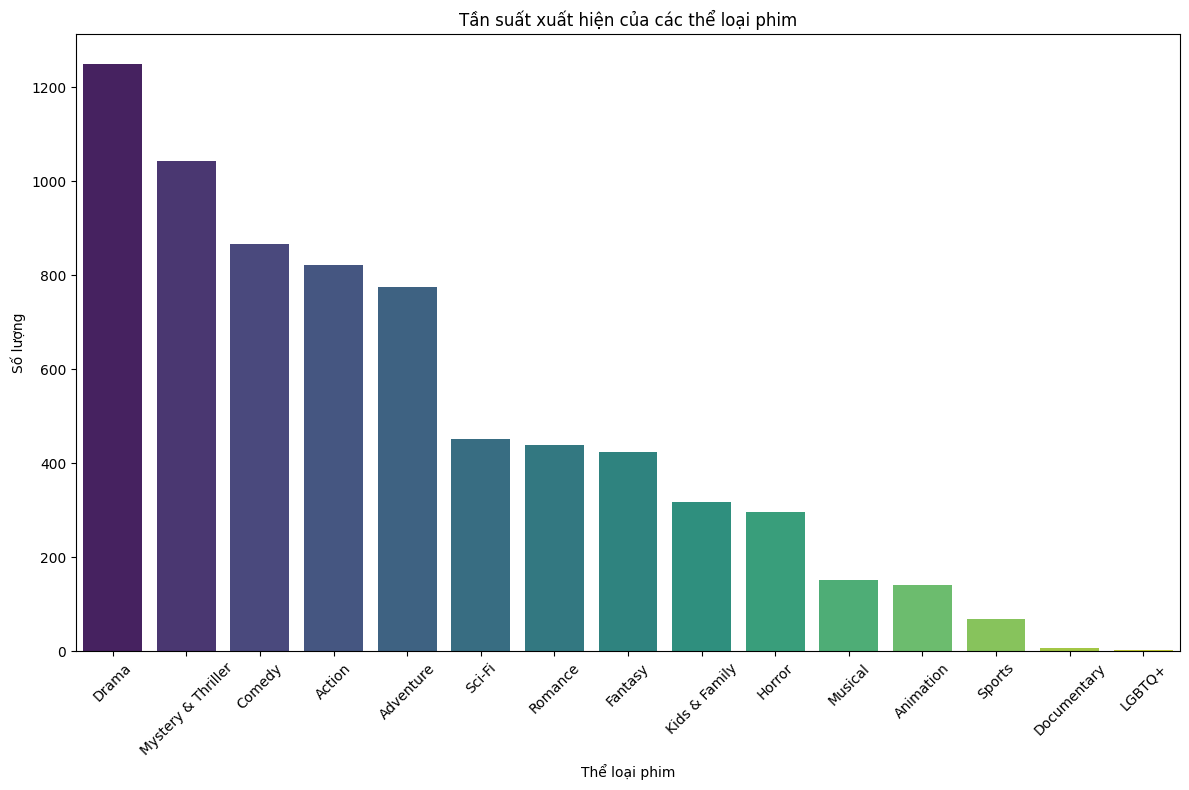

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Tần suất xuất hiện của các thể loại phim')
plt.xlabel('Thể loại phim')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> **Nhận xét :** Phim Drama và các thể loại giải trí như Mystery & Thriller hay Comedy chiếm ưu thế lớn, trong khi những thể loại như Sports và LGBTQ+ ít được sản xuất hơn.

## ***Các diễn viên xuất hiện nhiều nhất trong phim***

In [ ]:
demo = movie_data.copy()

In [ ]:
demo

,Link,Movie_Name,Ratings,Movie_category,Film_Actor,Release_Date,Duration,Original_Language,Companies,Description,Box Office,Certificate (MPAA),Directors,Writing_Credits
2,https://www.imdb.com/title/tt1179933/?ref_=sr_...,10 Cloverfield Lane,72%,"Drama, Horror, Mystery & Thriller, Sci-Fi","John Goodman, Mary Elizabeth Winstead, John Ga...","Mar 11, 2016",1h 43m,English,"Paramount Pictures, Bad Robot, Spectrum Effects",A young woman is held in an underground bunker...,"$110,216,998",PG-13,Dan Trachtenberg,"Josh Campbell, Matt Stuecken, Damien Chazelle,..."
3,https://www.imdb.com/title/tt0147800/?ref_=sr_...,10 Things I Hate About You,73%,"Comedy, Drama, Romance","Heath Ledger, Julia Stiles, Joseph Gordon-Levi...","Mar 31, 1999",1h 37m,English,"Touchstone Pictures, Mad Chance, Jaret Enterta...","A high-school boy, Cameron, cannot date Bianca...","$53,686,594",PG-13,Gil Junger,"Karen McCullah, Kirsten Smith, William Shakesp..."
4,https://www.imdb.com/title/tt0115433/?ref_=sr_...,101 Dalmatians,57%,"Adventure, Comedy, Kids & Family, Mystery & Th...","Glenn Close, Jeff Daniels, Joely Richardson, J...","Nov 27, 1996",1h 43m,English,"Walt Disney Pictures, Great Oaks Entertainment...",An evil high-fashion designer plots to steal d...,"$320,689,294",G,Stephen Herek,"Dodie Smith, John Hughes"
6,https://www.imdb.com/title/tt0050083/?ref_=sr_...,12 Angry Men,90%,"Drama, Mystery & Thriller","Henry Fonda, Lee J. Cobb, Martin Balsam, John ...","Apr 10, 1957",1h 36m,English,Orion-Nova Productions,The jury in a New York City murder trial is fr...,"$2,945",Approved,Sidney Lumet,"Reginald Rose, Reginald Rose"
7,https://www.imdb.com/title/tt0114746/?ref_=sr_...,12 Monkeys,80%,"Mystery & Thriller, Sci-Fi","Bruce Willis, Madeleine Stowe, Brad Pitt, Jose...","Jan 05, 1996",2h 9m,English,"Universal Pictures, Atlas Entertainment, Classico","In a future world devastated by disease, a con...","$168,839,459",R,Terry Gilliam,"Chris Marker, David Webb Peoples, Janet Peoples"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4686,https://www.imdb.com/title/tt0196229/?ref_=sr_...,Zoolander,65%,Comedy,"Ben Stiller, Owen Wilson, Christine Taylor, Wi...","Sep 28, 2001",1h 30m,English,"Paramount Pictures, Village Roadshow Pictures,...","At the end of his career, a clueless fashion m...","$60,780,981",R,Ben Stiller,"Drake Sather, Ben Stiller, Drake Sather, Ben S..."
4687,https://www.imdb.com/title/tt1608290/?ref_=sr_...,Zoolander 2,47%,"Action, Adventure, Comedy, Mystery & Thriller,...","Ben Stiller, Owen Wilson, Penélope Cruz, Will ...","Feb 12, 2016",1h 41m,English,"Panorama Films, Red Hour Films, Scott Rudin Pr...",Derek and Hansel are lured into modelling agai...,"$56,722,693",PG-13,Ben Stiller,"Justin Theroux, Ben Stiller, Nicholas Stoller,..."
4688,https://www.imdb.com/title/tt2948356/?ref_=sr_...,Zootopia,80%,"Action, Adventure, Animation, Comedy, Kids & F...","Ginnifer Goodwin, Jason Bateman, Idris Elba, J...","Mar 04, 2016",1h 48m,English,"Walt Disney Pictures, Walt Disney Animation St...","In a city of anthropomorphic animals, a rookie...","$1,025,521,689",PG,"Byron Howard, Rich Moore, Jared Bush","Byron Howard, Rich Moore, Jared Bush, Jim Rear..."
4692,https://www.imdb.com/title/tt8721424/?ref_=sr_...,"tick, tick... BOOM!",75%,"Comedy, Drama, Musical","Andrew Garfield, Alexandra Shipp, Robin de Jes...","Nov 19, 2021",1h 55m,English,"5000 Broadway Productions, Imagine Entertainment","On the brink of turning 30, a promising theate...","$112,777",PG-13,Lin-Manuel Miranda,"Steven Levenson, Jonathan Larson"


C:\Users\ACER\AppData\Local\Temp\ipykernel_2952\2277388268.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=actor_counts.values, y=actor_counts.index, palette='viridis', edgecolor='black')


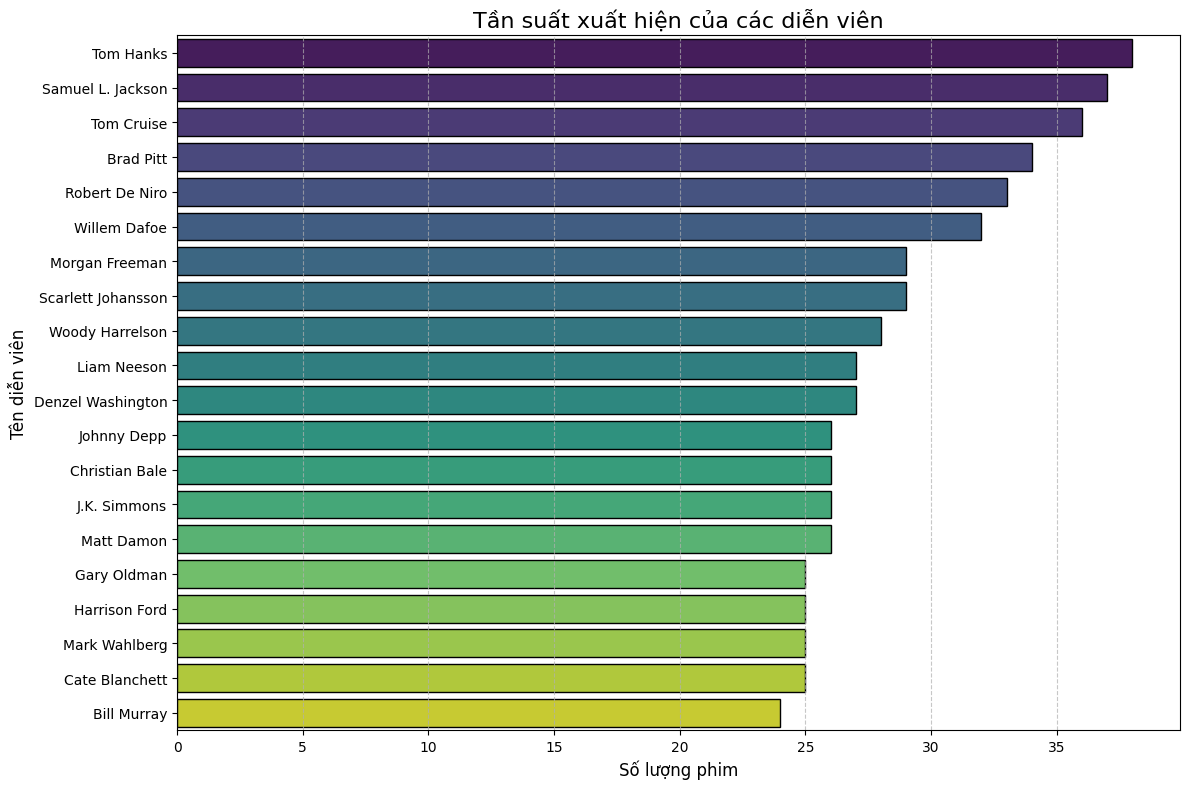

In [ ]:
demo['Film_Actor'] = demo['Film_Actor'].fillna('').astype(str)
all_actors = demo['Film_Actor'].str.split(', ').explode().str.strip()
actor_counts = all_actors.value_counts().head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=actor_counts.values, y=actor_counts.index, palette='viridis', edgecolor='black')
plt.title("Tần suất xuất hiện của các diễn viên", fontsize=16)
plt.xlabel("Số lượng phim", fontsize=12)
plt.ylabel("Tên diễn viên", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

> **Nhận xét :** Tom Hanks và Samuel L. Jackson là hai diễn viên có tần suất xuất hiện nhiều nhất, mỗi người đều tham gia hơn 35 bộ phim.Tần suất xuất hiện của các diễn viên từ đầu đến cuối không có sự chênh lệch quá lớn, phần lớn nằm trong khoảng từ 25 đến hơn 35 bộ phim => Tom Hanks và Samuel L. Jackson dẫn đầu danh sách về số lượng phim tham gia, khẳng định vị trí quan trọng của họ trong ngành điện ảnh.


## ***Các đạo diễn xuất hiện nhiều nhất trong phim***

C:\Users\ACER\AppData\Local\Temp\ipykernel_2952\3209731149.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=director_counts.values, y=director_counts.index, palette='viridis', edgecolor='black')


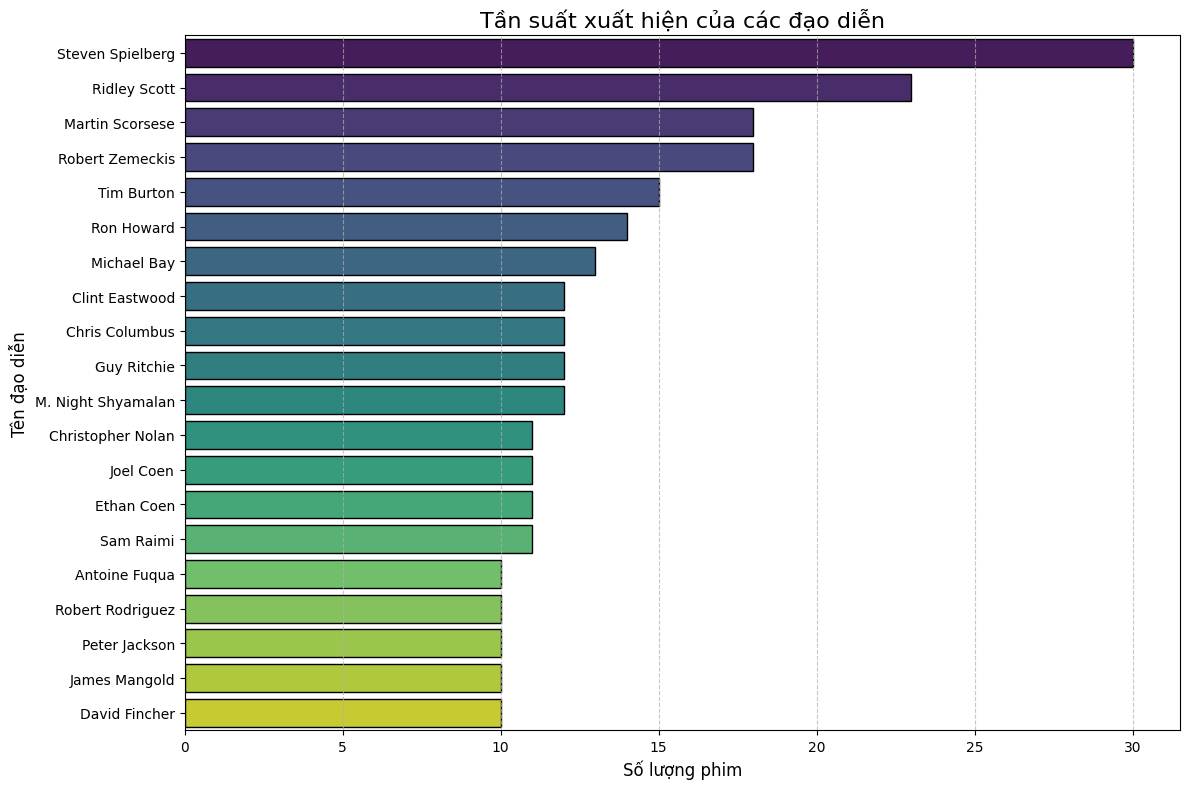

In [ ]:
demo['Directors'] = demo['Directors'].fillna('').astype(str)
all_directors = demo['Directors'].str.split(', ').explode().str.strip()
director_counts = all_directors.value_counts().head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=director_counts.values, y=director_counts.index, palette='viridis', edgecolor='black')
plt.title("Tần suất xuất hiện của các đạo diễn", fontsize=16)
plt.xlabel("Số lượng phim", fontsize=12)
plt.ylabel("Tên đạo diễn", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

> **Nhận xét :** Steven Spielberg dẫn đầu với số lượng phim tham gia nhiều nhất, gần 30 bộ phim, thể hiện tầm ảnh hưởng mạnh mẽ của ông trong ngành điện ảnh =>  Tần suất xuất hiện của các đạo diễn này cho thấy sự đa dạng và phong phú trong thể loại phim mà họ lựa chọn và sự ảnh hưởng của mỗi người trong sự phát triển của điện ảnh.

## ***Tần suất các tháng mà phim đã ra mắt***

C:\Users\ACER\AppData\Local\Temp\ipykernel_2952\2525731934.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_counts.index, y=month_counts.values, palette='Blues_d', edgecolor='black')


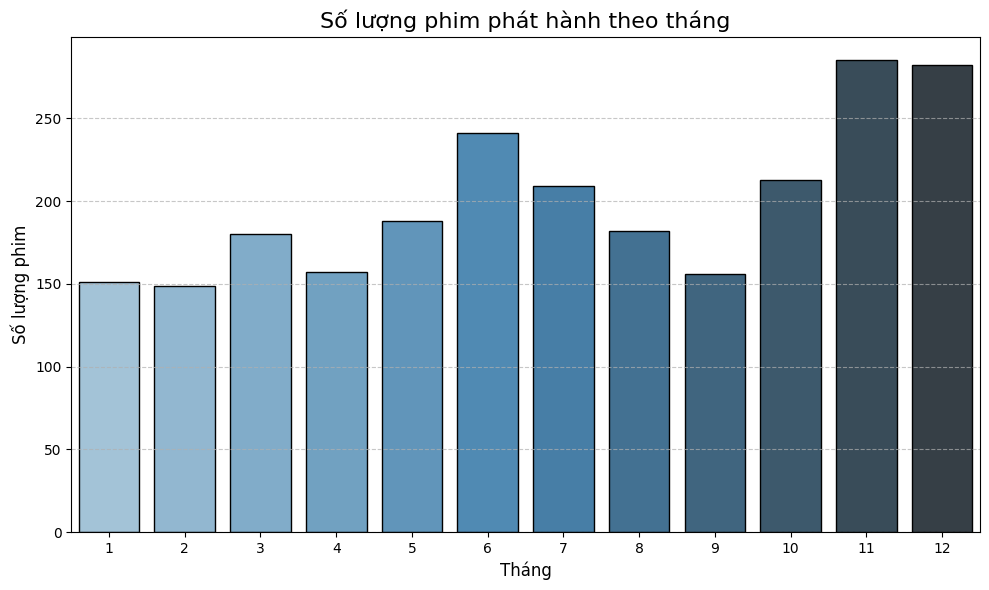

In [ ]:
demo['Release_Date'] = pd.to_datetime(demo['Release_Date'], errors='coerce')
demo['Month'] = demo['Release_Date'].dt.month
month_counts = demo['Month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=month_counts.index, y=month_counts.values, palette='Blues_d', edgecolor='black')
plt.title("Số lượng phim phát hành theo tháng", fontsize=16)
plt.xlabel("Tháng", fontsize=12)
plt.ylabel("Số lượng phim", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

> **Nhận xét :** Tháng 11 thường ra mắt phim nhiều hơn các tháng khác bởi vì có thể giúp họ thu về doanh thu tốt vào tháng 12 trước khi hết năm.

## ***Các ngôn ngữ phổ biến nhất của các bộ phim***

In [ ]:
language_distribution = demo['Original_Language'].value_counts(normalize=True).head(10)
language_distribution

Original_Language
English                   0.957376
French                    0.007522
Japanese                  0.005433
Spanish                   0.004597
Korean                    0.003761
Italian                   0.003761
German                    0.002507
Swedish                   0.001672
Hindi                     0.001672
American Sign Language    0.001254
Name: proportion, dtype: float64

C:\Users\ACER\AppData\Local\Temp\ipykernel_2952\1903557772.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_distribution.values, y=language_distribution.index, palette='viridis', edgecolor='black')


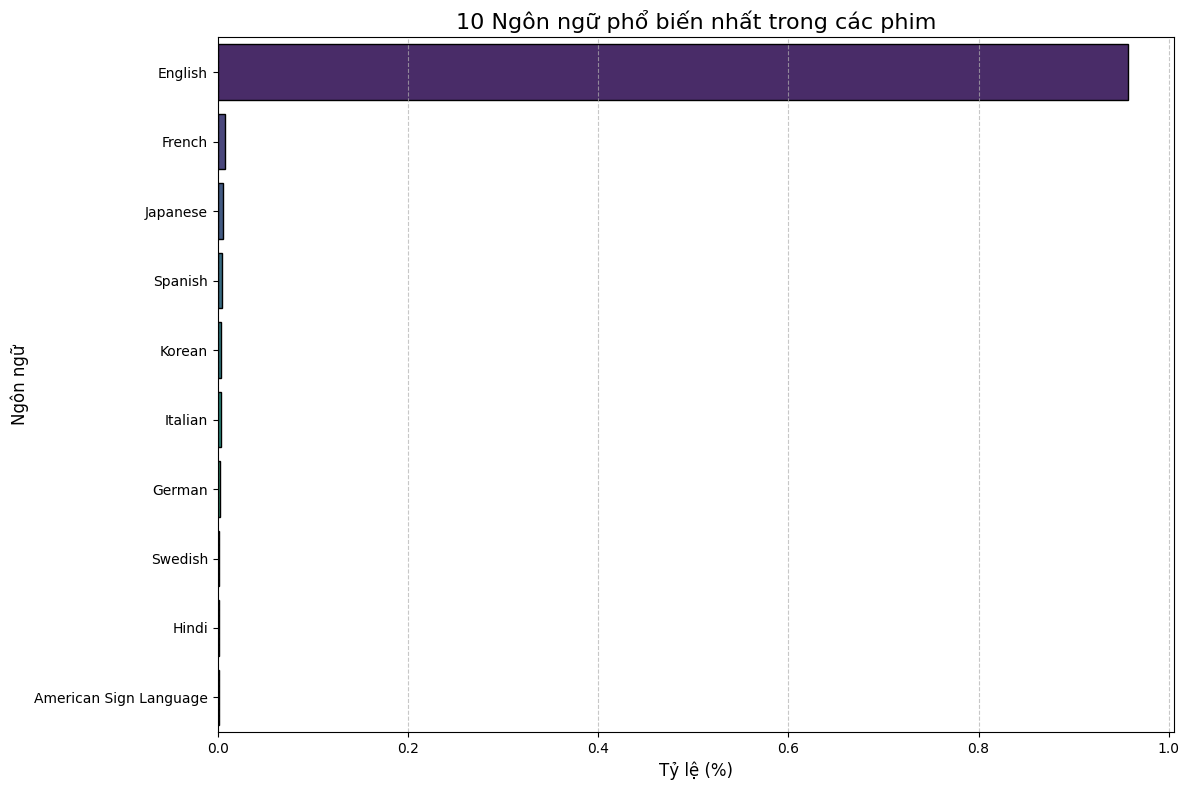

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x=language_distribution.values, y=language_distribution.index, palette='viridis', edgecolor='black')
plt.title("10 Ngôn ngữ phổ biến nhất trong các phim", fontsize=16)
plt.xlabel("Tỷ lệ (%)", fontsize=12)
plt.ylabel("Ngôn ngữ", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

> **Nhận xét :** Biểu đồ cho thấy ngôn ngữ tiếng Anh chiếm hơn 80% trong tổng số ngôn ngữ của các phim. Điều này phản ánh sự phổ biến và tầm quan trọng của tiếng Anh trong ngành điện ảnh toàn cầu, đặc biệt là với ảnh hưởng mạnh mẽ từ các thị trường lớn như Mỹ và Anh.

## ***Histograms của thuộc tính Ratings***

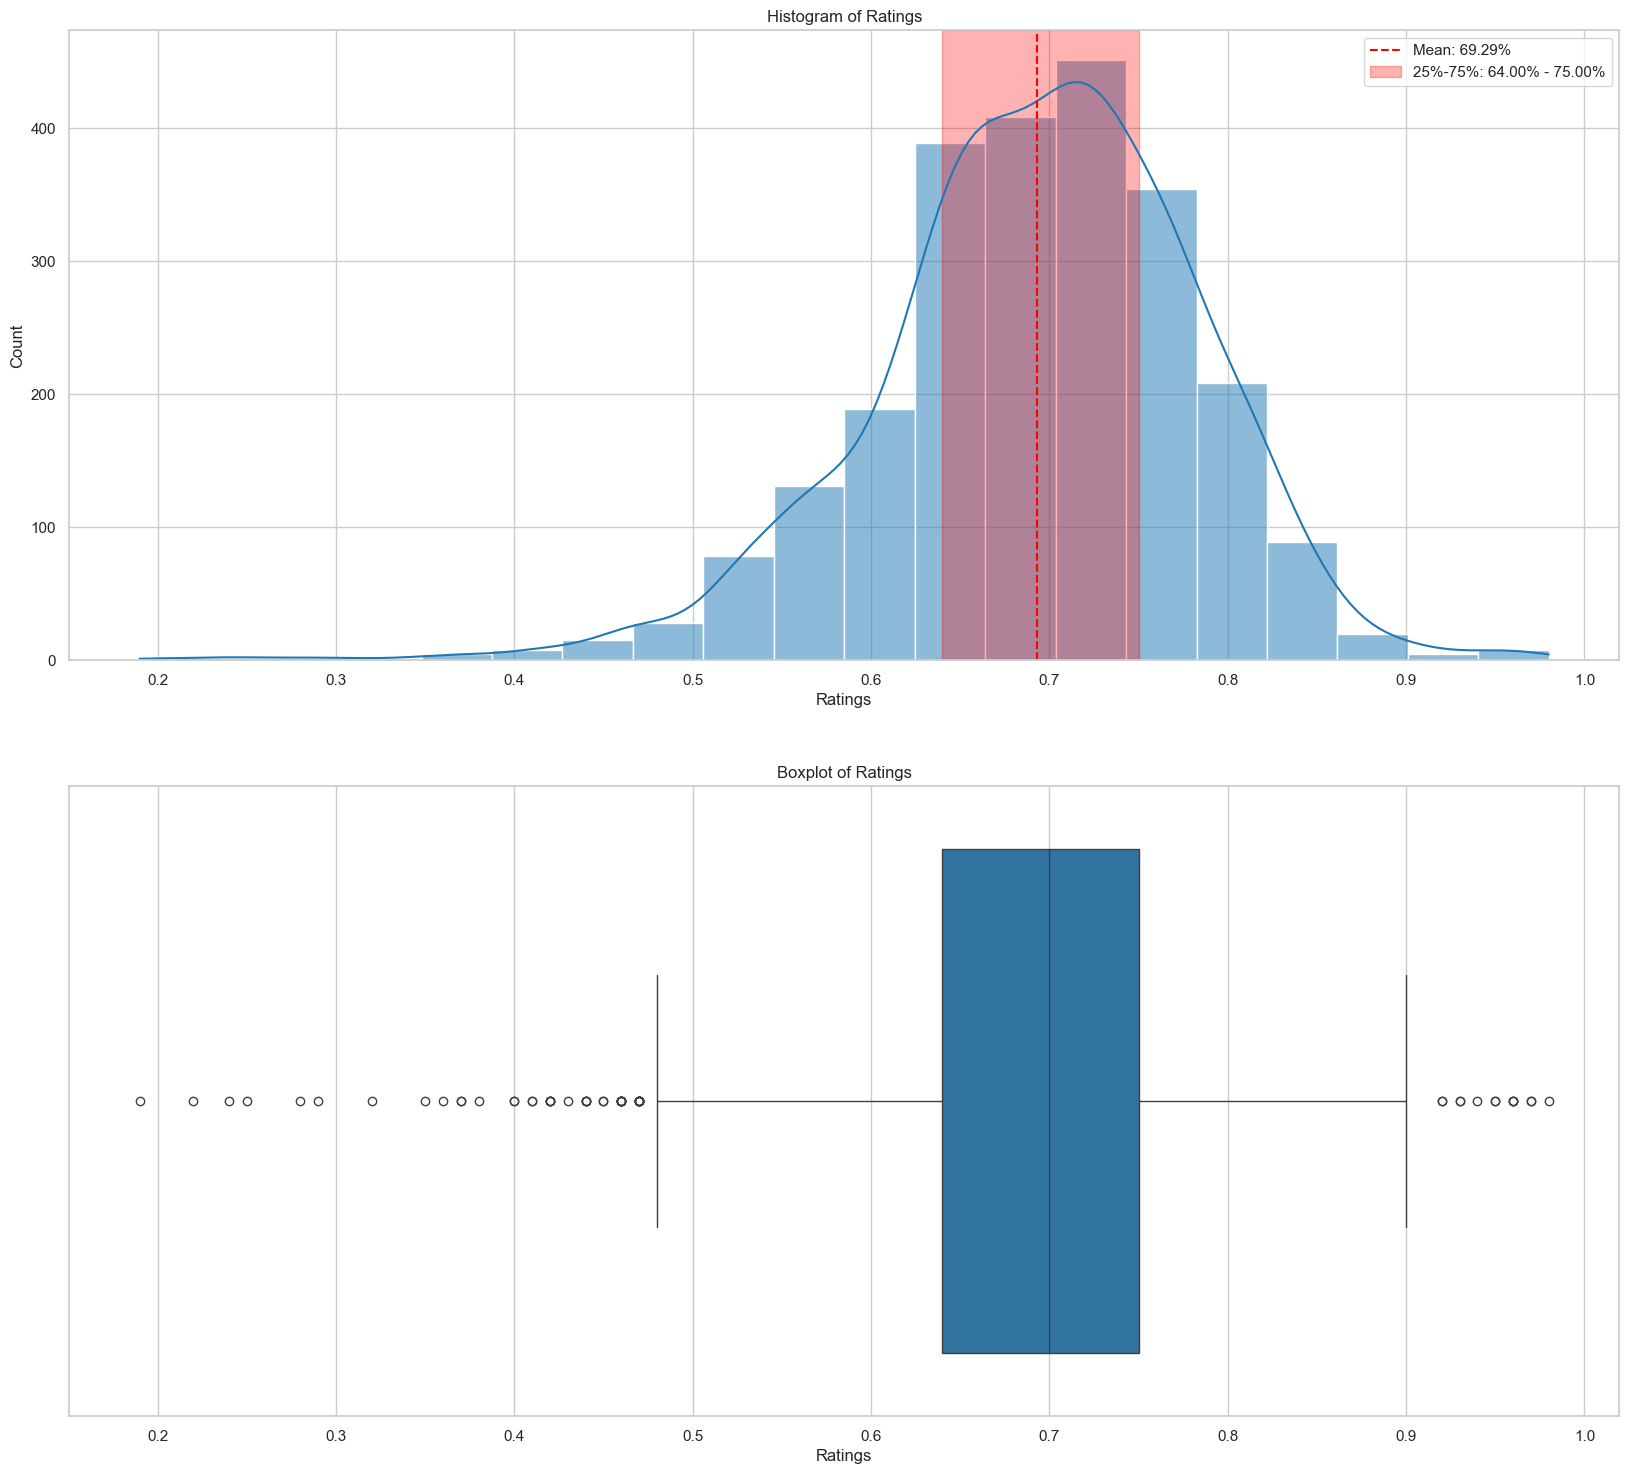

In [ ]:
demo['Ratings'] = demo['Ratings'].str.rstrip('%').astype('float') / 100

sns.set(style="whitegrid", palette="tab10")
fig, axes = plt.subplots(2, 1, figsize=(20, 18))

sns.histplot(demo['Ratings'], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Histogram of Ratings")

mean_rating = demo['Ratings'].mean()
axes[0].axvline(mean_rating, color='r', linestyle='--', label=f'Mean: {mean_rating:.2%}')

q25_rating = demo['Ratings'].quantile(0.25)
q75_rating = demo['Ratings'].quantile(0.75)
axes[0].axvspan(q25_rating, q75_rating, color='red', alpha=0.3, label=f'25%-75%: {q25_rating:.2%} - {q75_rating:.2%}')
axes[0].legend()
sns.boxplot(x=demo['Ratings'], ax=axes[1])
axes[1].set_title("Boxplot of Ratings")
plt.show()

> **Nhận xét :**
- Sự thống trị của các công ty lớn như Universal Pictures, Warner Bros và Columbia Pictures phản ánh vị thế của họ trong việc sản xuất và phân phối phim.
- Trong đó, công ty Marvel Studios, dù nằm ở cuối danh sách, vẫn có đóng góp đáng kể với số lượng phim ở mức trung bình. Đây là một thành tựu lớn vì họ tập trung vào một thể loại phim siêu anh hùng.

## ***Histograms của thuộc tính Duration***

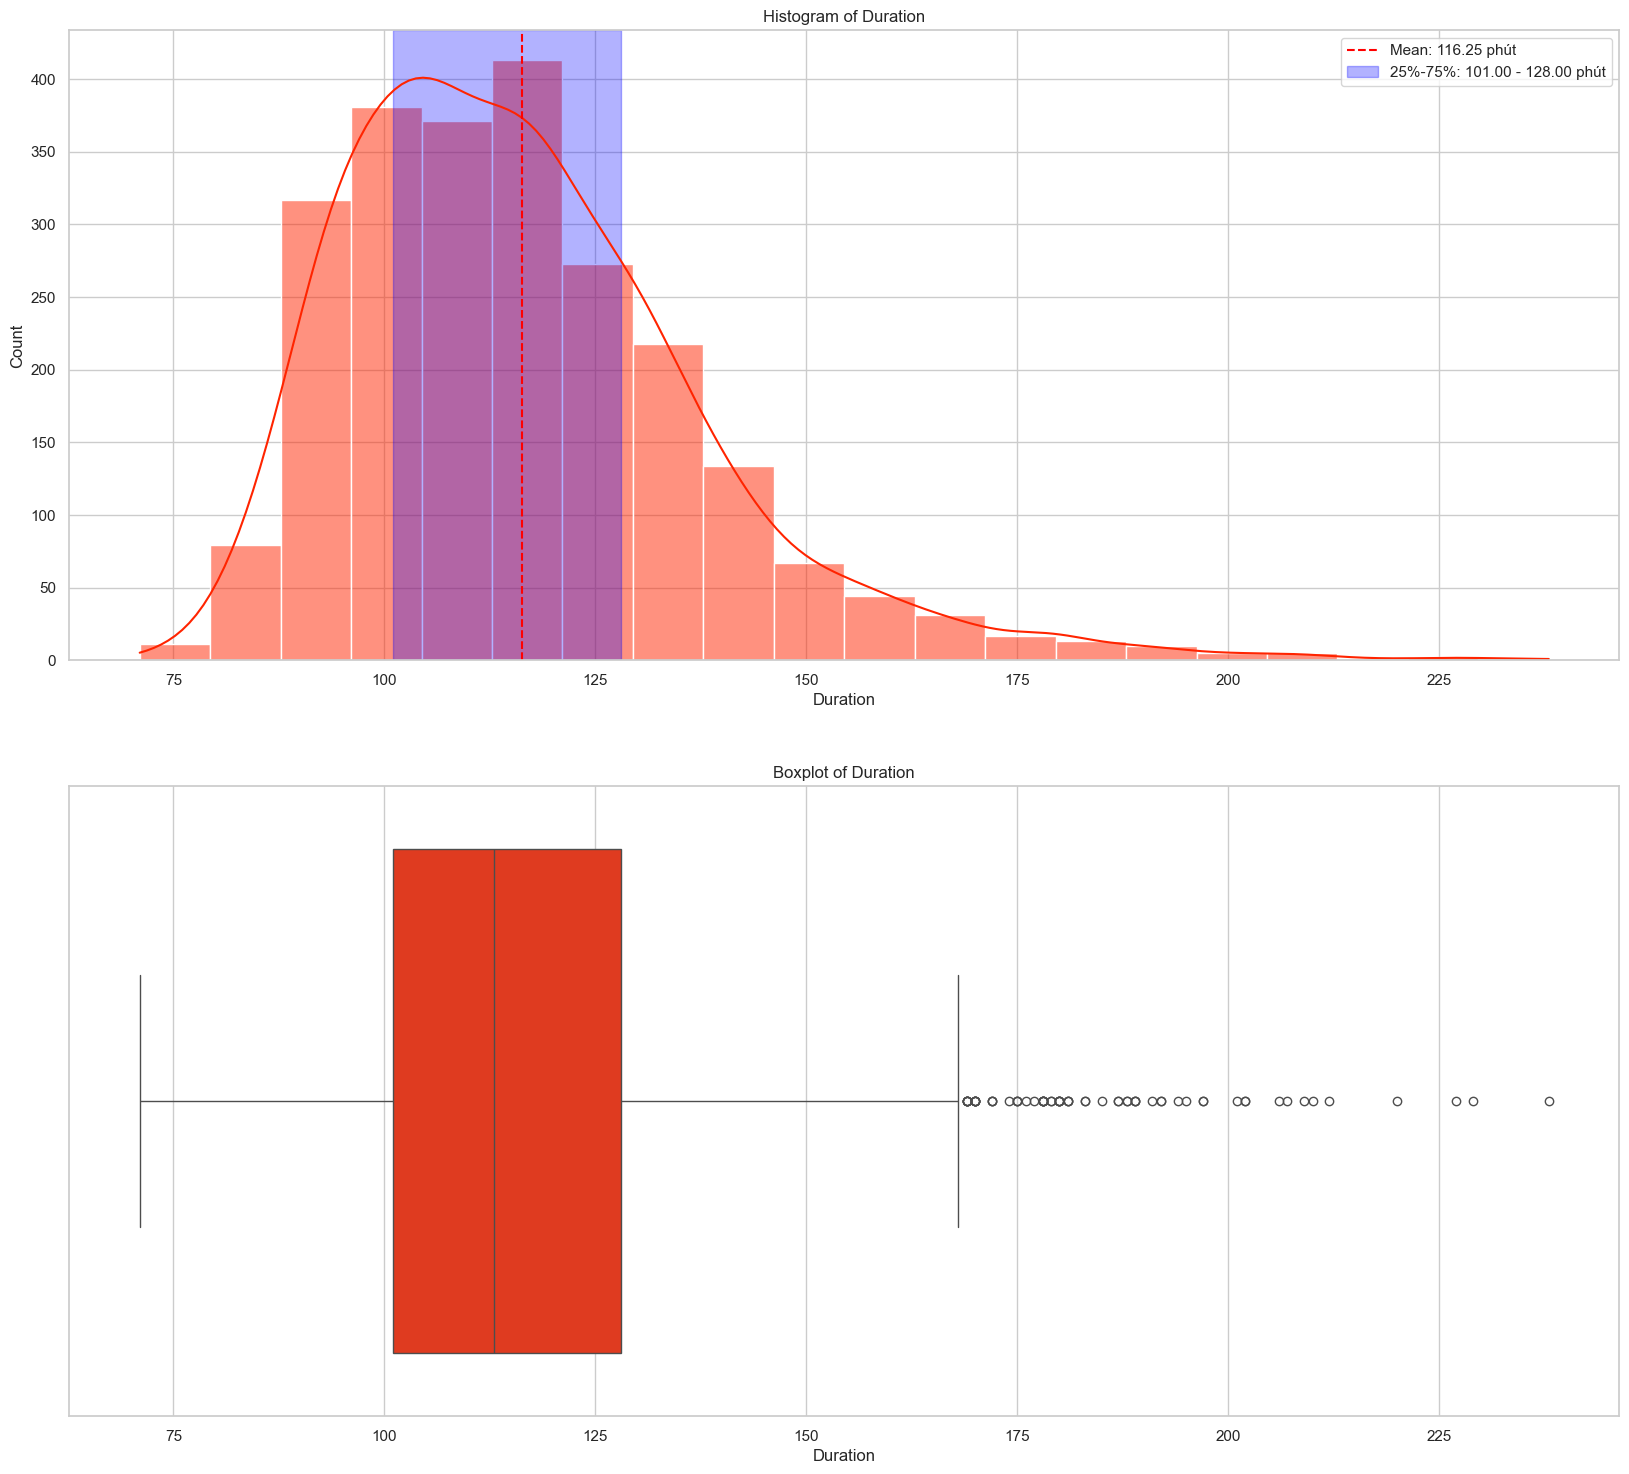

In [ ]:
# Chuyển đổi cột Duration từ dạng "1h 40m" sang số phút
def convert_to_minutes(duration):
    parts = duration.split(' ')
    hours = int(parts[0].replace('h', '')) if 'h' in parts[0] else 0
    minutes = int(parts[1].replace('m', '')) if len(parts) > 1 and 'm' in parts[1] else 0
    return hours * 60 + minutes

demo['Duration'] = demo['Duration'].apply(convert_to_minutes)

sns.set(style="whitegrid", palette="autumn")
fig, axes = plt.subplots(2, 1, figsize=(20, 18))

# Histogram và Boxplot cho Duration
sns.histplot(demo['Duration'], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Histogram of Duration")

# Tính giá trị trung bình
mean_duration = demo['Duration'].mean()
axes[0].axvline(mean_duration, color='r', linestyle='--', label=f'Mean: {mean_duration:.2f} phút')

# Tính khoảng tập trung chủ yếu (khoảng giữa 25% và 75%)
q25_duration = demo['Duration'].quantile(0.25)
q75_duration = demo['Duration'].quantile(0.75)
axes[0].axvspan(q25_duration, q75_duration, color='blue', alpha=0.3, label=f'25%-75%: {q25_duration:.2f} - {q75_duration:.2f} phút')

axes[0].legend()

sns.boxplot(x=demo['Duration'], ax=axes[1])
axes[1].set_title("Boxplot of Duration")

# Hiển thị biểu đồ
plt.show()


> **Nhận xét :**

Biểu đồ histogram

- Dữ liệu Ratings có xu hướng phân bố gần như hình chuông, cho thấy phần lớn các xếp hạng tập trung quanh giá trị trung bình.

- Giá trị ngoại lệ: Một số ít xếp hạng dưới 0.5 cho thấy có người dùng không hài lòng.

Biểu đồ boxplot

- Boxplot trực quan hóa các giá trị ngoại lệ thấp hơn.

- IQR hẹp, đồng nhất với histogram, cho thấy sự tập trung của phần lớn dữ liệu xung quanh giá trị trung bình và ít có sự phân tán lớn.

Xu hướng chính:
- Phần lớn người dùng hài lòng với sản phẩm/dịch vụ, thể hiện qua: Giá trị trung bình cao (0.6929).Sự phân bố tập trung và ổn định xung quanh giá trị trung bình

##### ***Nhận xét :***
- ***Phân bố***: Biểu đồ có dạng phân phối lệch trái nhẹ (left-skewed), nghĩa là phần lớn các điểm đánh giá tập trung ở mức cao (gần 0.7 - 0.8). Tuy có một số điểm đánh giá thấp dưới 0.5, nhưng không phổ biến.
- ***Trung bình và khoảng tứ phân vị (IQR)***:
    - ***Trung bình (Mean)***: Điểm đánh giá trung bình là 69.25% (được biểu diễn bằng đường nét đứt màu đỏ).
    - ***Khoảng tứ phân vị (IQR)***:
        - 25% phim có điểm đánh giá dưới 64%.
        - 75% phim có điểm đánh giá dưới 75.25%.
    Điều này có nghĩa là 50% phim có điểm đánh giá nằm trong khoảng 64% - 75.25% (vùng màu hồng).
- ***Độ phân tán***: Độ lệch chuẩn có thể không quá lớn vì các điểm Ratings khá tập trung quanh trung bình (0.7). Tuy nhiên, vẫn có một vài điểm ngoại lệ (phim có điểm đánh giá cực thấp hoặc cực cao).
- ***Tần suất và mật độ***: Phim có điểm đánh giá từ 0.65 đến 0.75 chiếm tần suất cao nhất (đỉnh histogram). Điểm Ratings giảm dần về hai phía, đặc biệt là ở phía điểm số thấp (< 0.5) và rất cao (> 0.85), cho thấy các phim cực thấp hoặc cực cao về điểm đánh giá không phổ biến.

## ***Sơ đồ tương quan của thuộc tính Ratings và Duration***

In [ ]:
ratings_duration_corr = demo['Ratings'].corr(demo['Duration'])
ratings_duration_corr

0.32498324312337

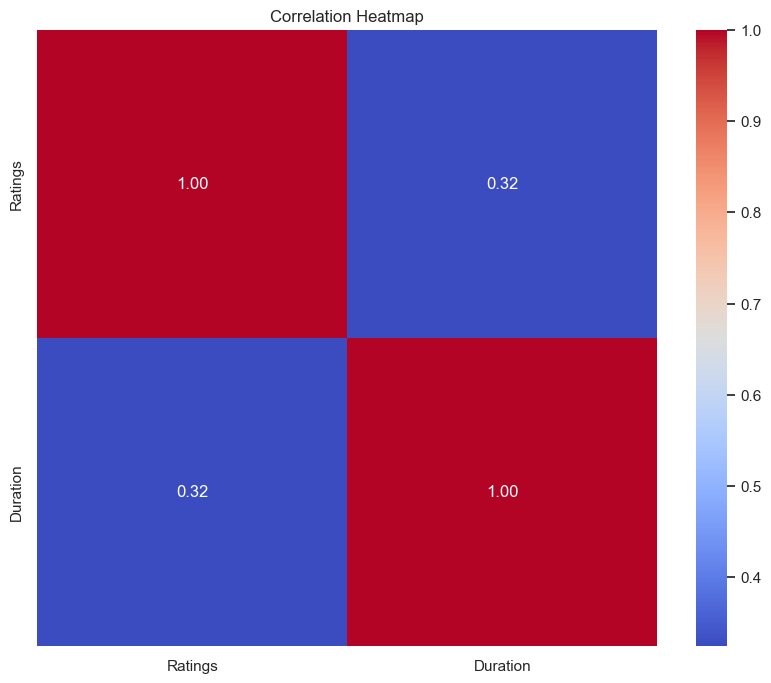

In [ ]:
# Heatmap for correlation
plt.figure(figsize=(10, 8))
correlation_matrix = demo[['Ratings', 'Duration']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

> **Nhận xét :** Với hệ số tương quan 0.32, Duration chỉ có tác động nhẹ đến Ratings. Duration không phải yếu tố quyết định chính ảnh hưởng đến Ratings của phim.

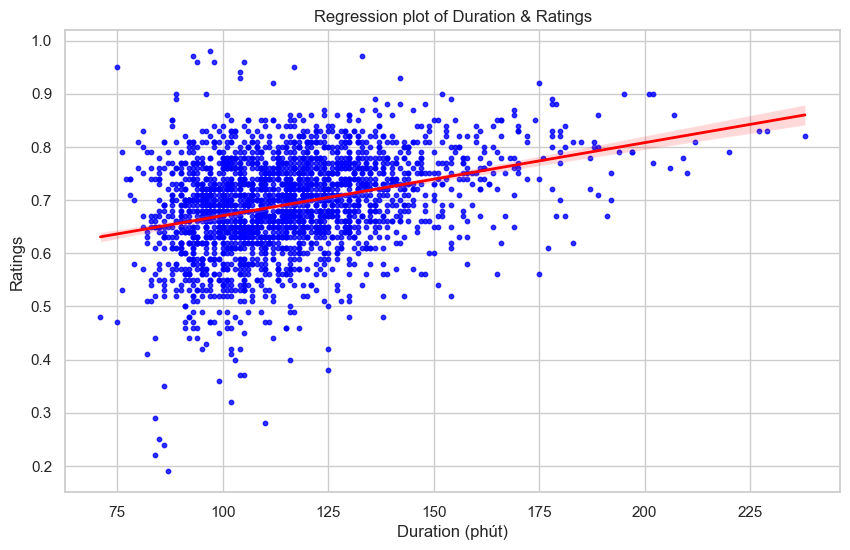

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Duration', y='Ratings', data=demo, scatter_kws={'s': 10, 'color': 'blue'}, line_kws={'color': 'red', 'linewidth': 2})
plt.title('Regression plot of Duration & Ratings')
plt.xlabel('Duration (phút)')
plt.ylabel('Ratings')
plt.grid(True)
plt.show()

> **Nhận xét :**

Đường hồi quy có độ dốc nhỏ nhưng hướng lên trên, cho thấy Duration (thời lượng phim) có mối quan hệ dương yếu với Ratings.

$\Rightarrow$ Duration không có ảnh hưởng lớn đến Ratings, mặc dù có xu hướng tăng nhẹ.Ta có thể thấy qua hệ số tương quan 0.32 từ heatmap đã vẽ trước đó.

***Xu hướng tuyến tính dương (Positive Linear Trend):*** Đường hồi quy màu đỏ cho thấy có mối quan hệ tuyến tính dương nhẹ giữa Duration và Ratings. Khi thời lượng phim tăng, điểm đánh giá có xu hướng tăng nhẹ. Độ dốc của đường hồi quy không lớn, điều này thể hiện mối tương quan giữa hai biến là yếu.

***Phân bố dữ liệu:*** Dữ liệu (các điểm màu xanh) tập trung dày đặc trong khoảng thời lượng 80–150 phút và điểm đánh giá chủ yếu nằm từ 0,6 đến 0,8. Một số điểm rải rác ngoài khoảng này cho thấy có một vài phim thời lượng dài hơn (từ 180–230 phút) nhưng vẫn có đánh giá cao.

***Phạm vi phương sai:*** Có một khoảng phân tán đáng kể xung quanh đường hồi quy, thể hiện rằng không phải mọi bộ phim có thời lượng dài hơn đều được đánh giá cao.

$\Rightarrow$ ***Kết luận:*** Thời lượng phim có ảnh hưởng nhỏ và không mạnh mẽ đến điểm đánh giá. Đường hồi quy chỉ cung cấp một xu hướng tổng quát, còn nhiều yếu tố khác có thể ảnh hưởng đến điểm đánh giá phim hơn là chỉ thời lượng.

## ***Boxplot giữa thuộc tính certificate (MPAA) và Ratings***

In [ ]:
certificate_ratings = demo.groupby('Certificate (MPAA)')['Ratings'].mean().sort_values(ascending=False)
certificate_ratings

Certificate (MPAA)
Approved     0.771143
M            0.760000
G            0.729091
Not Rated    0.704894
R            0.703143
NC-17        0.701667
PG           0.692060
TV-MA        0.686364
PG-13        0.672820
Unrated      0.623333
TV-G         0.560000
TV-14        0.550000
Name: Ratings, dtype: float64

C:\Users\ACER\AppData\Local\Temp\ipykernel_2952\3413338447.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Certificate (MPAA)', y='Ratings', data=demo, palette='viridis')


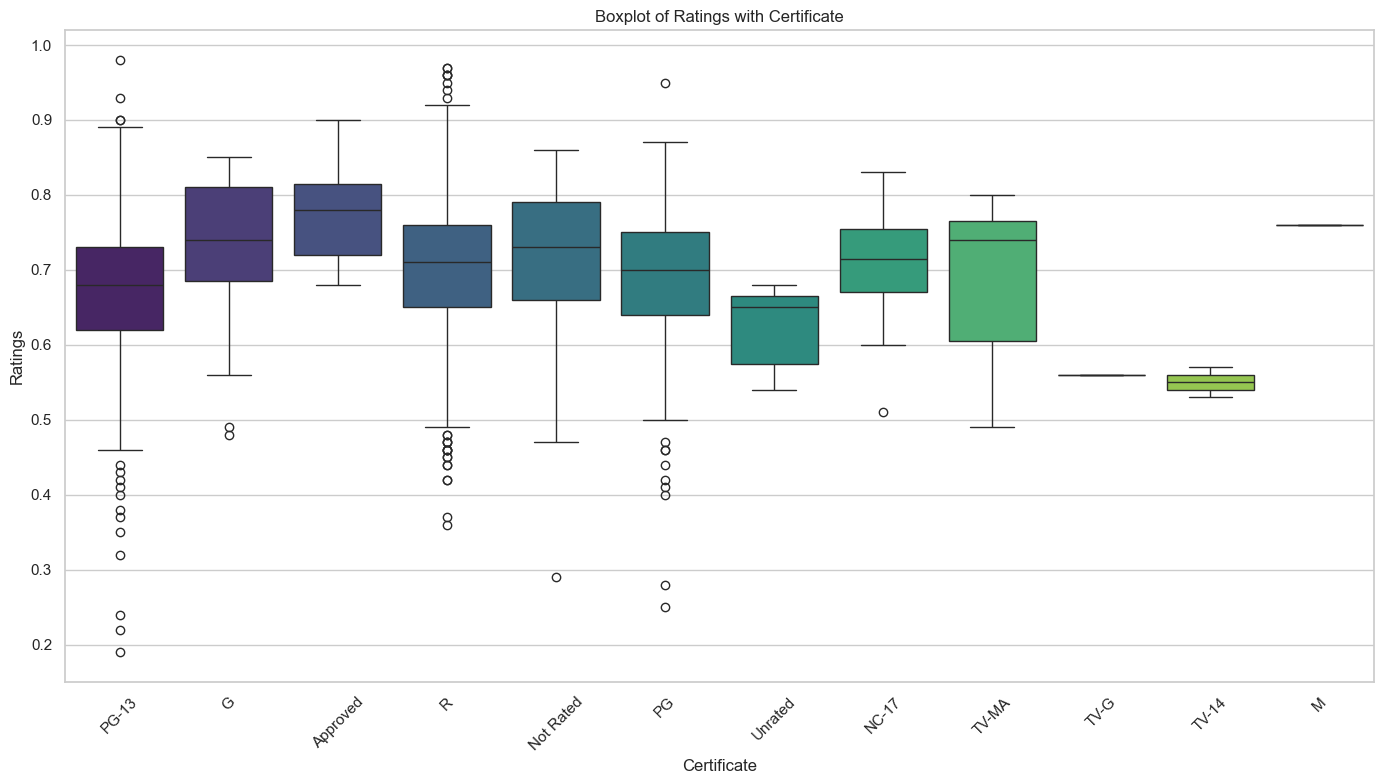

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Certificate (MPAA)', y='Ratings', data=demo, palette='viridis')
plt.title('Boxplot of Ratings with Certificate')
plt.xlabel('Certificate')
plt.ylabel('Ratings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> **Nhận xét :**  

- Có sự khác biệt đáng kể về xếp hạng trung bình và độ phân tán của các xếp hạng giữa các loại chứng nhận khác nhau.

- Nội dung phù hợp cho gia đình hoặc mọi lứa tuổi được khán giả đánh giá tích cực và có sự đồng thuận cao.

- Nội dung chỉ dành cho khán giả trưởng thành hoặc không được kiểm duyệt thường nhận đánh giá thấp hơn và có sự phân tán lớn.

***Nhận xét :***
- ***Mô tả tổng quan:*** Biểu đồ boxplot thể hiện sự phân phối Ratings tương ứng với từng loại Certificate (xếp hạng chứng nhận). Các chứng nhận có phân bố giá trị Rating khác nhau, phản ánh độ đa dạng về đánh giá theo từng chứng nhận phim.
- ***Các chứng nhận nổi bật:***
    - PG-13: Có phạm vi rộng với phân phối Rating từ 0.2 đến 0.9. Trung vị ở khoảng 0.67, nhưng có một số giá trị ngoại lệ thấp.
    - G và Approved: Có xu hướng tập trung ở mức đánh giá cao với trung vị xấp xỉ 0.75. Phân bố Rating ổn định hơn so với PG-13.
    - R: Có phạm vi khá rộng, trung vị gần 0.68, nhưng có nhiều điểm ngoại lệ thấp dưới 0.5.
    - NC-17 và TV-MA: Có trung vị tương đối cao (~0.7), nhưng dữ liệu phân bố chặt chẽ hơn với ít ngoại lệ hơn so với các chứng nhận khác.

- ***Chứng nhận có phân bố thấp hơn:***
    - TV-G và T16: Phân bố hẹp, với trung vị Ratings thấp hơn đáng kể (~0.5–0.55).
    - Banned: Có Ratings tập trung ở một khoảng rất nhỏ gần 0.45.
    - T13 và T18: Chứng nhận này có đánh giá tương đối ổn định, với ít giá trị ngoại lệ.
- ***Phân bố tổng thể:*** Các chứng nhận như C13, C18, T18 và TV-14 có xu hướng giữ được mức Ratings cao hơn với phạm vi hẹp. Ngược lại, các chứng nhận như Not Rated, PG-13 có nhiều ngoại lệ và phạm vi phân tán rộng, cho thấy sự đa dạng hơn trong mức độ đánh giá.

$\Rightarrow$ ***Kết luận:***
- Các bộ phim có chứng nhận như G, Approved, NC-17 thường có xu hướng đạt đánh giá cao và ổn định.
- Các chứng nhận như PG-13, R, Not Rated có sự phân tán lớn trong Ratings, thể hiện sự đa dạng về chất lượng.
- Một số chứng nhận như Banned và T16 có xu hướng thấp hơn và kém ổn định.

## ***Phân tích sự tương quan giữa Ratings và các biến có thể phân tích***

In [ ]:
new_data = demo.copy(deep=True)
new_data.drop(['Link', 'Movie_Name', 'Film_Actor', 'Companies', 'Description', 'Directors', 'Writing_Credits', 'Month'], axis=1, inplace=True)
new_data.dropna(subset=['Ratings'], inplace=True)
new_data.reset_index(drop=True, inplace=True)
new_data.isna().sum()

Ratings               0
Movie_category        0
Release_Date          0
Duration              0
Original_Language     0
Box Office            0
Certificate (MPAA)    0
dtype: int64

# So sánh độ tương quan của từng thuộc tính so với Ratings theo thứ tự từ trái sang phải, bắt đầu từ Movie_category

## Movie_category

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.stats import pearsonr

relation_movie_category = new_data.copy(deep=True)
relation_movie_category.drop(['Release_Date', 'Duration', 'Original_Language', 'Box Office', 'Certificate (MPAA)'], axis=1, inplace=True)
relation_movie_category['Movie_category'] = relation_movie_category['Movie_category'].apply(lambda x:x.split(', '))
# One-hot encoding chúng.
mlb = MultiLabelBinarizer()
category_encoded = mlb.fit_transform(relation_movie_category['Movie_category'])
category_df = pd.DataFrame(category_encoded, columns=mlb.classes_)

df_encoded = pd.concat([relation_movie_category['Ratings'], category_df], axis=1)
correlation_results = []

for col in df_encoded.columns:
    if col != 'Ratings':
      correlation, p_value = pearsonr(df_encoded['Ratings'], df_encoded[col])
      correlation_results.append({'Language': col, 'Correlation': correlation, 'P-Value': p_value})

correlation_df = pd.DataFrame(correlation_results)
print(correlation_df)

              Language  Correlation       P-Value
0               Action    -0.089274  1.222200e-05
1            Adventure    -0.057937  4.581327e-03
2            Animation     0.075714  2.095704e-04
3               Comedy    -0.088775  1.367193e-05
4          Documentary     0.033151  1.049561e-01
5                Drama     0.309426  2.927747e-54
6              Fantasy    -0.087618  1.769524e-05
7               Horror    -0.170948  3.760110e-17
8        Kids & Family    -0.051511  1.172929e-02
9               LGBTQ+     0.062674  2.159957e-03
10             Musical     0.015797  4.398809e-01
11  Mystery & Thriller    -0.032816  1.085152e-01
12             Romance    -0.041135  4.421450e-02
13              Sci-Fi    -0.099623  1.044950e-06
14              Sports     0.032422  1.128316e-01


In [ ]:
filtered_df = correlation_df[correlation_df['P-Value'] < 0.05]
filtered_df

,Language,Correlation,P-Value
0,Action,-0.089274,1.222200e-05
1,Adventure,-0.057937,4.581327e-03
2,Animation,0.075714,2.095704e-04
3,Comedy,-0.088775,1.367193e-05
5,Drama,0.309426,2.927747e-54
6,Fantasy,-0.087618,1.769524e-05
7,Horror,-0.170948,3.760110e-17
8,Kids & Family,-0.051511,1.172929e-02
9,LGBTQ+,0.062674,2.159957e-03
12,Romance,-0.041135,4.421450e-02


## Release Date

In [ ]:
relation_release_date = new_data.copy(deep=True)
relation_release_date.drop(['Movie_category', 'Duration', 'Original_Language', 'Box Office', 'Certificate (MPAA)'], axis=1, inplace=True)
relation_release_date['Release_Date'] = pd.to_datetime(relation_release_date['Release_Date'])
relation_release_date['Month'] = relation_release_date['Release_Date'].dt.month
relation_release_date['Year'] = relation_release_date['Release_Date'].dt.year

In [ ]:
from scipy.stats import pearsonr

# Calculate Pearson's correlation and p-value for Month and Ratings
month_corr, month_p_value = pearsonr(relation_release_date['Month'], relation_release_date['Ratings'])

# Calculate Pearson's correlation and p-value for Year and Ratings
year_corr, year_p_value = pearsonr(relation_release_date['Year'], relation_release_date['Ratings'])

# Print the results
print(f"Pearson's correlation between 'Month' and 'Ratings': {month_corr}")
print(f"P-value for 'Month' and 'Ratings': {month_p_value}")
print(f"Pearson's correlation between 'Year' and 'Ratings': {year_corr}")
print(f"P-value for 'Year' and 'Ratings': {year_p_value}")

Pearson's correlation between 'Month' and 'Ratings': 0.03321210217411626
P-value for 'Month' and 'Ratings': 0.10431632860324627
Pearson's correlation between 'Year' and 'Ratings': -0.24425091675414753
P-value for 'Year' and 'Ratings': 7.671611548591183e-34


## Duration

In [ ]:
relation_duration = new_data.copy(deep=True)
relation_duration.drop(['Movie_category', 'Release_Date', 'Original_Language', 'Box Office', 'Certificate (MPAA)'], axis=1, inplace=True)

In [ ]:
relation_duration.isna().sum()

Ratings     0
Duration    0
dtype: int64

In [ ]:
duration_corr, duration_p_value = pearsonr(relation_duration['Duration'], relation_duration['Ratings'])

print(f"Pearson's correlation between 'Duration' and 'Ratings': {duration_corr}")
print(f"P-value for 'Duration' and 'Ratings': {duration_p_value}")

Pearson's correlation between 'Duration' and 'Ratings': 0.3249832431233701
P-value for 'Duration' and 'Ratings': 5.58838101262872e-60


## Original_Language

### Overall

In [ ]:
relation_ol = new_data.copy(deep=True)
relation_ol.drop(['Movie_category', 'Release_Date', 'Duration', 'Box Office', 'Certificate (MPAA)'], axis=1, inplace=True)

Kiểm tra có ngôn ngữ là 'English' nhưng không được viết là 'English' mà là ở dưới dạng khác.

In [ ]:
test_df = relation_ol[relation_ol['Original_Language'].str.contains('English', case=False, na=False)]
test_df['Original_Language'].value_counts()

Original_Language
English    2291
Name: count, dtype: int64

In [ ]:
language_encoded = pd.get_dummies(relation_ol['Original_Language'], prefix='', prefix_sep='')
df_encoded = pd.concat([relation_ol['Ratings'], language_encoded], axis=1)

# Calculate Pearson's correlation and p-values
correlation_results = []

for col in language_encoded.columns:
    correlation, p_value = pearsonr(df_encoded['Ratings'], df_encoded[col])
    correlation_results.append({'Language': col, 'Correlation': correlation, 'P-Value': p_value})

# Convert results to a DataFrame
correlation_df = pd.DataFrame(correlation_results)

# Print the results
print(correlation_df)

                  Language  Correlation       P-Value
0   American Sign Language     0.013152  5.201950e-01
1                   Arabic     0.033068  1.058332e-01
2                  Aramaic     0.006091  7.658417e-01
3                Cantonese     0.013386  5.127891e-01
4                   Danish     0.013386  5.127891e-01
5                  English    -0.170895  3.846139e-17
6                  Finnish    -0.007397  7.176027e-01
7                   French     0.039229  5.501501e-02
8                   German     0.056278  5.891148e-03
9                    Greek     0.003843  8.509520e-01
10                   Hindi     0.031310  1.257140e-01
11              Indonesian     0.015083  4.608135e-01
12                 Italian     0.075350  2.248629e-04
13                Japanese     0.095775  2.685886e-06
14                 Kannada     0.028572  1.623454e-01
15                  Korean     0.061839  2.475007e-03
16                Mandarin     0.011853  5.622163e-01
17                    Maya  

In [ ]:
correlation_df['Correlation'].min(), correlation_df['Correlation'].max()

(-0.17089458536421137, 0.09577482027848133)

In [ ]:
correlation_df['P-Value'].min(), correlation_df['P-Value'].max()

(3.846139213906323e-17, 0.8509520058674364)

In [ ]:
filtered_df = correlation_df[correlation_df['P-Value'] < 0.05]
filtered_df

,Language,Correlation,P-Value
5,English,-0.170895,3.846139e-17
8,German,0.056278,5.891148e-03
12,Italian,0.075350,2.248629e-04
13,Japanese,0.095775,2.685886e-06
15,Korean,0.061839,2.475007e-03
20,Portuguese,0.057904,4.604679e-03
23,Spanish,0.043338,3.401203e-02


## ***Loại bỏ các data trùng nhau khi đem so sánh cột Movie_Name và chỉ bỏ những hàng có nhiều NaN nhất.***

In [ ]:
# Xử lý loại bỏ trùng lặp, giữ lại hàng có ít giá trị NaN hơn
movie_data = movie_data.loc[
    movie_data.groupby('Movie_Name').apply(lambda x: x.isna().sum(axis=1).idxmin())
]

# Reset lại chỉ mục sau khi loại bỏ
movie_data = movie_data.reset_index(drop=True)

movie_data

C:\Users\ACER\AppData\Local\Temp\ipykernel_2952\3190153533.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  movie_data.groupby('Movie_Name').apply(lambda x: x.isna().sum(axis=1).idxmin())


,Link,Movie_Name,Ratings,Movie_category,Film_Actor,Release_Date,Duration,Original_Language,Companies,Description,Box Office,Certificate (MPAA),Directors,Writing_Credits
0,https://www.imdb.com/title/tt1179933/?ref_=sr_...,10 Cloverfield Lane,72%,"Drama, Horror, Mystery & Thriller, Sci-Fi","John Goodman, Mary Elizabeth Winstead, John Ga...","Mar 11, 2016",1h 43m,English,"Paramount Pictures, Bad Robot, Spectrum Effects",A young woman is held in an underground bunker...,"$110,216,998",PG-13,Dan Trachtenberg,"Josh Campbell, Matt Stuecken, Damien Chazelle,..."
1,https://www.imdb.com/title/tt0147800/?ref_=sr_...,10 Things I Hate About You,73%,"Comedy, Drama, Romance","Heath Ledger, Julia Stiles, Joseph Gordon-Levi...","Mar 31, 1999",1h 37m,English,"Touchstone Pictures, Mad Chance, Jaret Enterta...","A high-school boy, Cameron, cannot date Bianca...","$53,686,594",PG-13,Gil Junger,"Karen McCullah, Kirsten Smith, William Shakesp..."
2,https://www.imdb.com/title/tt0115433/?ref_=sr_...,101 Dalmatians,57%,"Adventure, Comedy, Kids & Family, Mystery & Th...","Glenn Close, Jeff Daniels, Joely Richardson, J...","Nov 27, 1996",1h 43m,English,"Walt Disney Pictures, Great Oaks Entertainment...",An evil high-fashion designer plots to steal d...,"$320,689,294",G,Stephen Herek,"Dodie Smith, John Hughes"
3,https://www.imdb.com/title/tt0050083/?ref_=sr_...,12 Angry Men,90%,"Drama, Mystery & Thriller","Henry Fonda, Lee J. Cobb, Martin Balsam, John ...","Apr 10, 1957",1h 36m,English,Orion-Nova Productions,The jury in a New York City murder trial is fr...,"$2,945",Approved,Sidney Lumet,"Reginald Rose, Reginald Rose"
4,https://www.imdb.com/title/tt0114746/?ref_=sr_...,12 Monkeys,80%,"Mystery & Thriller, Sci-Fi","Bruce Willis, Madeleine Stowe, Brad Pitt, Jose...","Jan 05, 1996",2h 9m,English,"Universal Pictures, Atlas Entertainment, Classico","In a future world devastated by disease, a con...","$168,839,459",R,Terry Gilliam,"Chris Marker, David Webb Peoples, Janet Peoples"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,https://www.imdb.com/title/tt0196229/?ref_=sr_...,Zoolander,65%,Comedy,"Ben Stiller, Owen Wilson, Christine Taylor, Wi...","Sep 28, 2001",1h 30m,English,"Paramount Pictures, Village Roadshow Pictures,...","At the end of his career, a clueless fashion m...","$60,780,981",R,Ben Stiller,"Drake Sather, Ben Stiller, Drake Sather, Ben S..."
2389,https://www.imdb.com/title/tt1608290/?ref_=sr_...,Zoolander 2,47%,"Action, Adventure, Comedy, Mystery & Thriller,...","Ben Stiller, Owen Wilson, Penélope Cruz, Will ...","Feb 12, 2016",1h 41m,English,"Panorama Films, Red Hour Films, Scott Rudin Pr...",Derek and Hansel are lured into modelling agai...,"$56,722,693",PG-13,Ben Stiller,"Justin Theroux, Ben Stiller, Nicholas Stoller,..."
2390,https://www.imdb.com/title/tt2948356/?ref_=sr_...,Zootopia,80%,"Action, Adventure, Animation, Comedy, Kids & F...","Ginnifer Goodwin, Jason Bateman, Idris Elba, J...","Mar 04, 2016",1h 48m,English,"Walt Disney Pictures, Walt Disney Animation St...","In a city of anthropomorphic animals, a rookie...","$1,025,521,689",PG,"Byron Howard, Rich Moore, Jared Bush","Byron Howard, Rich Moore, Jared Bush, Jim Rear..."
2391,https://www.imdb.com/title/tt8721424/?ref_=sr_...,"tick, tick... BOOM!",75%,"Comedy, Drama, Musical","Andrew Garfield, Alexandra Shipp, Robin de Jes...","Nov 19, 2021",1h 55m,English,"5000 Broadway Productions, Imagine Entertainment","On the brink of turning 30, a promising theate...","$112,777",PG-13,Lin-Manuel Miranda,"Steven Levenson, Jonathan Larson"


In [ ]:
movie_data.isna().sum()

Link                  0
Movie_Name            0
Ratings               0
Movie_category        0
Film_Actor            0
Release_Date          0
Duration              0
Original_Language     0
Companies             0
Description           0
Box Office            0
Certificate (MPAA)    0
Directors             0
Writing_Credits       0
dtype: int64

## ***Boxplot giữa thuộc tính Original Language và Ratings***

C:\Users\ACER\AppData\Local\Temp\ipykernel_2952\944633639.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Original_Language', y='Ratings', data=demo, palette='viridis')


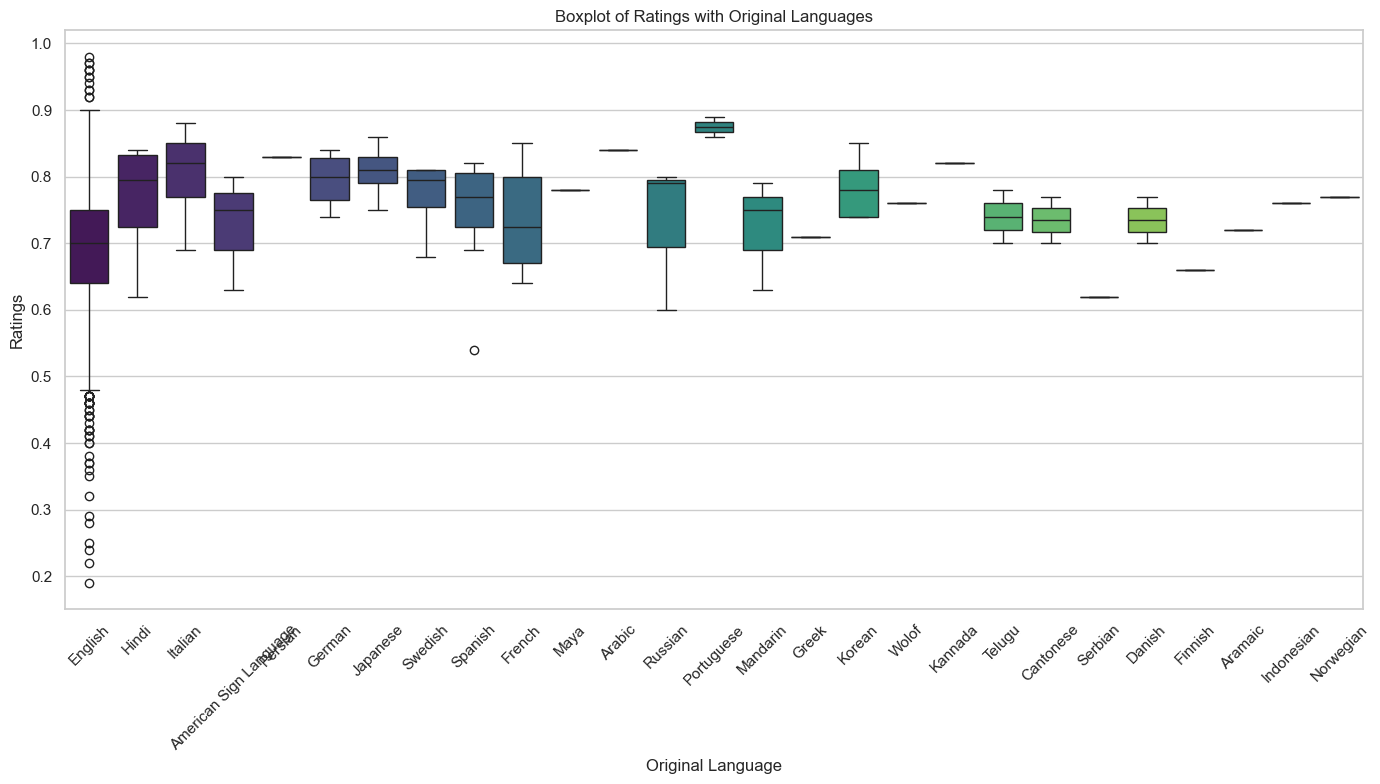

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Original_Language', y='Ratings', data=demo, palette='viridis')
plt.title('Boxplot of Ratings with Original Languages')
plt.xlabel('Original Language')
plt.ylabel('Ratings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> **Nhận xét :**

- Có sự khác biệt đáng kể về xếp hạng trung bình và độ phân tán của các xếp hạng giữa các ngôn ngữ gốc khác nhau.

- Một số ngôn ngữ có xếp hạng trung bình cao hơn so với các ngôn ngữ khác. Điều này gợi ý rằng nội dung được sản xuất bằng các ngôn ngữ này thường được đánh giá cao hơn.Chẳng hạn như nn English.

***Nhận xét :***
- ***Mô tả tổng quan:*** Biểu đồ boxplot thể hiện phân phối điểm Ratings theo từng ngôn ngữ gốc của phim. Có sự khác biệt rõ rệt giữa các ngôn ngữ về phạm vi giá trị, trung vị và độ phân tán của Ratings.
- ***Ngôn ngữ:***
    - ***English:*** Phân bố rộng nhất trong tất cả các ngôn ngữ, với nhiều ngoại lệ thấp dưới 0.3, trung vị khoảng 0.7. Điều này phản ánh sự đa dạng chất lượng của các phim nói tiếng Anh.
    $\Rightarrow$ Phim sử dụng tiếng Anh có sự đa dạng lớn về chất lượng, thể hiện qua phạm vi rộng và nhiều giá trị ngoại lệ.
    - ***Spanish*** và ***French***: Có trung vị khá ổn định khoảng 0.7–0.75, nhưng với một số ngoại lệ thấp hơn.
    - Một số ngôn ngữ khác có trung vị cao và phân phối hẹp, tuy nhiên đó là vì có rất ít phim sử dụng ngôn ngữ đó.
- ***Phân bố tổng thể***: Các chứng nhận như C13, C18, T18 và TV-14 có xu hướng giữ được mức Ratings cao hơn với phạm vi hẹp. Ngược lại, các chứng nhận như Not Rated, PG-13 có nhiều ngoại lệ và phạm vi phân tán rộng, cho thấy sự đa dạng hơn trong mức độ đánh giá.

## ***Boxplot của thuộc tính Movie_category và Ratings***

C:\Users\ACER\AppData\Local\Temp\ipykernel_2952\3101701828.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Movie_category', y='Ratings', data=demo, order=category_counts.index, palette='viridis')


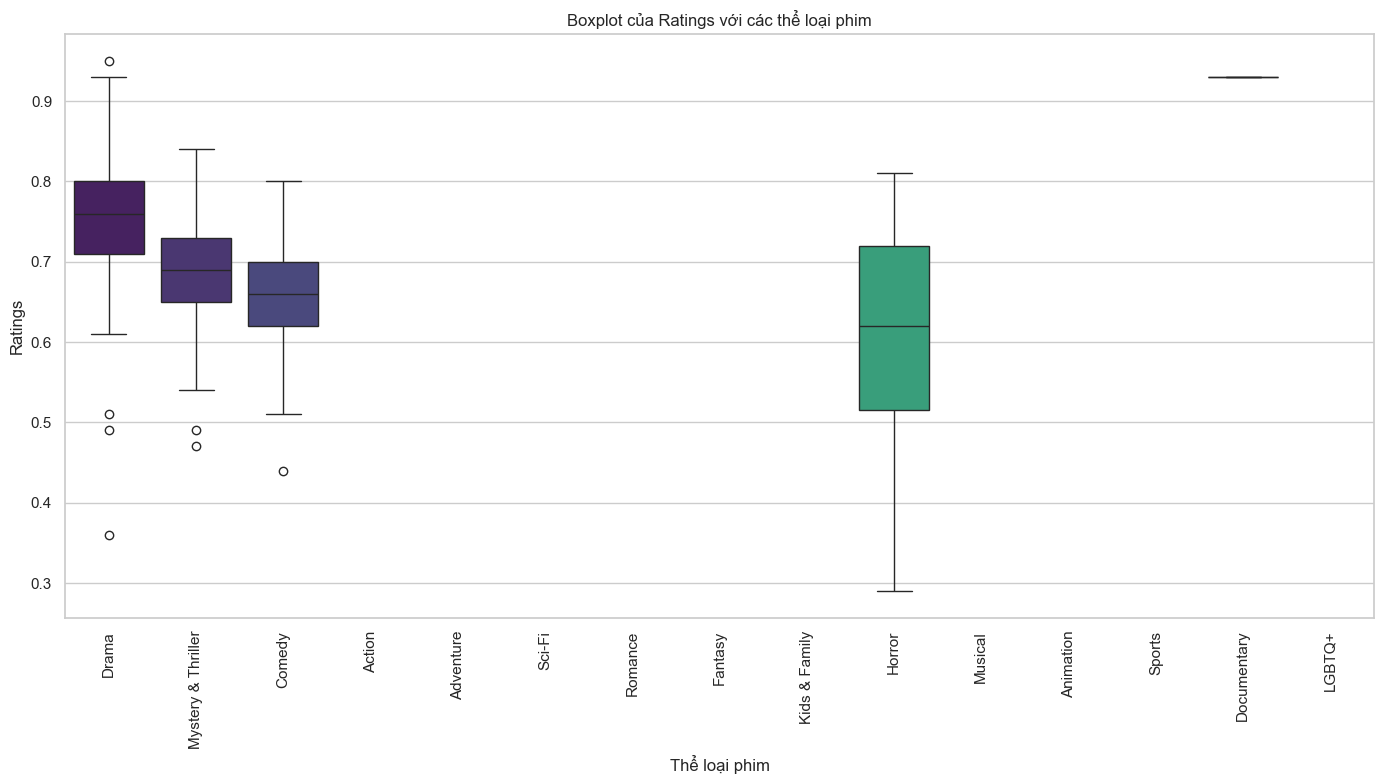

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Movie_category', y='Ratings', data=demo, order=category_counts.index, palette='viridis')
plt.title('Boxplot của Ratings với các thể loại phim')
plt.xlabel('Thể loại phim')
plt.ylabel('Ratings')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

> **Nhận xét**
Biểu đồ boxplot, cho thấy:

- Sự khác biệt rõ rệt về xếp hạng trung bình và độ phân tán giữa các thể loại.

- Độ dài của các hộp và số lượng giá trị ngoại lệ cũng khác nhau giữa các thể loại. Điều này cho thấy mức độ đồng thuận của người dùng về chất lượng của các phim thuộc từng thể loại cũng khác nhau.

Thể loại nổi bật:
- Drama: Trung vị cao nhất, khoảng 0.75, cho thấy các bộ phim thể loại này thường nhận được đánh giá tích cực. Phân phối Ratings khá ổn định, không có nhiều giá trị ngoại lệ thấp.
- LGBTQ+: Chỉ có một giá trị duy nhất gần 0.95, thể hiện rằng phim thuộc thể loại này có đánh giá rất cao.

Thể loại có phân phối đa dạng:
-Horror: Phân phối Ratings rộng nhất trong các thể loại, từ khoảng 0.3 đến 0.8. Trung vị khoảng 0.6, nhưng có nhiều giá trị thấp hơn, phản ánh sự khác biệt về chất lượng trong thể loại này.
- Mystery & Thriller: Trung vị khoảng 0.7, tuy nhiên có một số ngoại lệ thấp, với giá trị gần 0.45, cho thấy thể loại này có sự chênh lệch về chất lượng. Thể loại có Ratings ổn định và trung bình:
- Comedy: Trung vị khoảng 0.65–0.7, với độ phân tán không quá lớn. Điều này cho thấy các bộ phim hài thường nhận được đánh giá khá ổn định và trung bình. Thể loại ít dữ liệu hoặc không có dữ liệu:

Các thể loại như Action, Adventure, Sci-Fi, Romance, Fantasy, Kids & Family, Musical, Animation, Sports, Documentary không có dữ liệu hoặc chưa có đủ thông tin để phân tích.

## ***Scatter plot giữa thuộc tính Ratings và Box Office***

In [ ]:
def convert_to_number(value):
    value = value.replace('$', '').replace(',', '')
    if 'K' in value:
        return float(value.replace('K', '')) * 1_000
    elif 'M' in value:
        return float(value.replace('M', '')) * 1_000_000
    elif 'B' in value:
        return float(value.replace('B', '')) * 1_000_000_000
    else:
        return float(value)

demo['Box Office'] = demo['Box Office'].apply(convert_to_number)
demo['Box Office'] = demo['Box Office'].apply(lambda x: "{:.0f}".format(x))
demo['Box Office'] = pd.to_numeric(demo['Box Office'], errors='coerce')

In [ ]:
label_encoder = LabelEncoder()
demo['Certificate (MPAA)'] = label_encoder.fit_transform(demo['Certificate (MPAA)'].astype(str))

In [ ]:
columns_to_plot = {
    "Box Office": "Box Office",
    "Certificate (MPAA)": "Certificate (MPAA)",
    "Duration": "Duration"
}

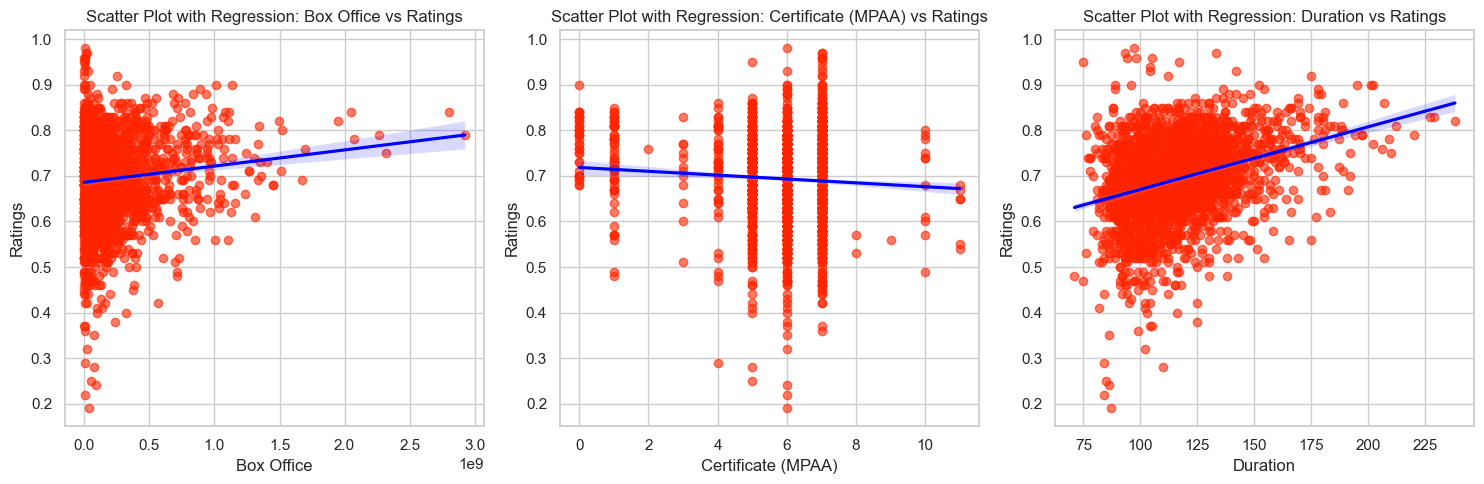

In [ ]:
plt.figure(figsize=(15, 5))
for i, (name, column) in enumerate(columns_to_plot.items(), 1):
    plt.subplot(1, 3, i)

    # Scatter plot và hồi quy tuyến tính
    sns.regplot(
        x=column,
        y="Ratings",
        data=demo,
        scatter_kws={"alpha": 0.6},
        line_kws={"color": "blue"},
    )
    plt.title(f"Scatter Plot with Regression: {name} vs Ratings")
    plt.xlabel(name)
    plt.ylabel("Ratings")

plt.tight_layout()
plt.show()

> **Nhận xét về biểu đồ Scatter Plot với đường hồi quy:**
- Box Office vs Ratings: Dữ liệu khá dày đặc ở khoảng doanh thu thấp (gần 0) và thưa dần khi Box Office tăng lên => Các bộ phim có doanh thu rất cao thường được đánh giá tốt.
- Certificate (MPAA) vs Ratings: Dữ liệu tập trung nhiều ở một số giá trị cụ thể $\Rightarrow$ Phim có chứng nhận nội dung giới hạn về độ tuổi có thể bị  đánh giá thấp hơn những thể loại phim "G"
- Duration vs Ratings: Dữ liệu tập trung nhiều ở khoảng thời lượng từ 100 đến 150 phút => Các bộ phim có thời lượng dài hơn thường có sự đầu tư nội dung lớn hơn, dẫn đến xếp hạng cao hơn từ người xem.


## ***Swarm plot giữa thuộc tính ratings vs thuộc tính certificate***

C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 58.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 75.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3399: UserWarning: 81.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


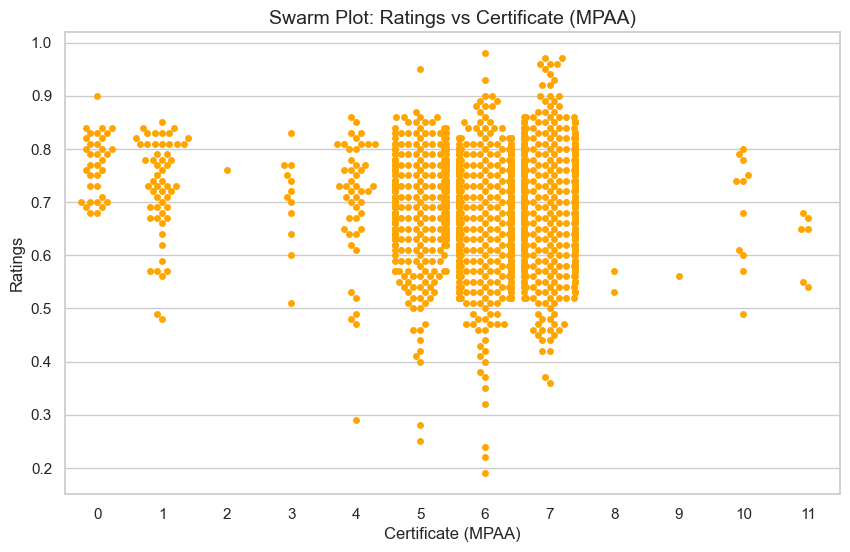

In [ ]:
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(10, 6))
sns.swarmplot(
    x="Certificate (MPAA)",
    y="Ratings",
    data=demo,
    size=5,
    color="orange"
)
plt.title("Swarm Plot: Ratings vs Certificate (MPAA)", fontsize=14)
plt.xlabel("Certificate (MPAA)", fontsize=12)
plt.ylabel("Ratings", fontsize=12)
plt.show()


>   **Nhận xét**
- Từ biểu đồ cho thấy không có mối tương quan rõ ràng giữa Certificate (MPAA) và Ratings, vì Ratings trải dài ở hầu hết các nhóm chứng nhận => Certificate (MPAA) có ảnh hưởng nhỏ đến Ratings

### **Pair Plot**

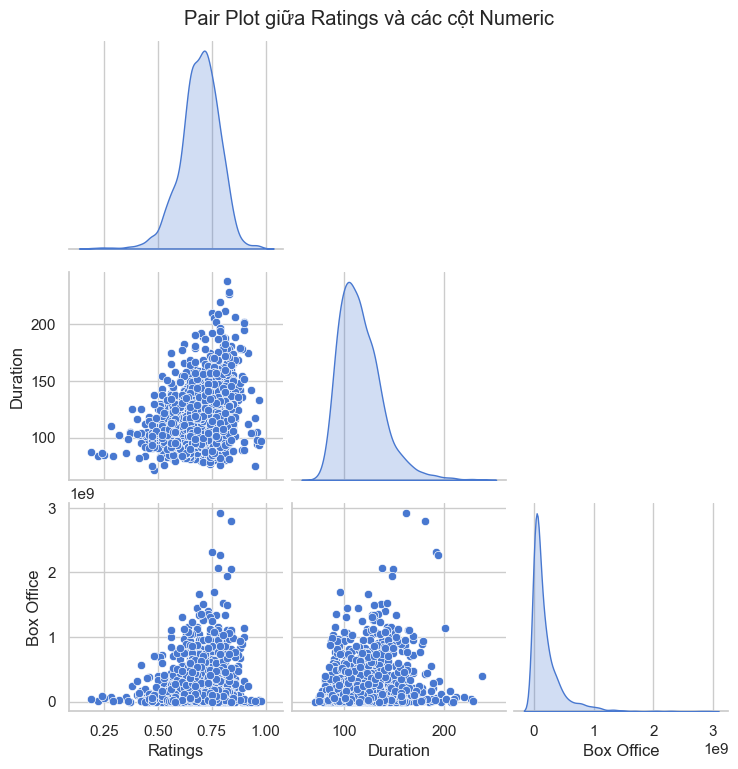

In [ ]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

pair_columns = ['Ratings'] + [col for col in numeric_columns if col != 'Ratings']

sns.pairplot(df[pair_columns], diag_kind='kde', corner=True)
plt.suptitle("Pair Plot giữa Ratings và các cột Numeric", y=1.02)
plt.show()

> **Nhận xét**
- Ratings và Duration: Phân phối của Ratings và Duration đều có hình dạng gần giống phân phối chuẩn với đỉnh ở khoảng giá trị giữa (0.6-0.8). Ratings có xu hướng cao hơn đối với các phim có thời lượng trung bình khoảng 100-150 phút => Điều này có thể phản ánh rằng các phim dài hơn thường có nội dung phong phú hơn, dẫn đến điểm số cao hơn từ khán giả.
- Ratings và Box Office: Hệ số phân phối của Ratings không thay đổi nhiều so với hình dạng chuẩn.Có sự phân nhóm khá rõ ràng giữa Ratings và Box Office. Phim có doanh thu cao hơn (dựa trên Box Office) thường có điểm số Ratings cũng cao hơn $\Rightarrow$ Điều này có thể phản ánh rằng các bộ phim ăn khách (có doanh thu cao) thường được đánh giá cao hơn về chất lượng.
- Box Office có sự biến động lớn từ 0 đến khoảng 3 tỷ USD, nhưng sau đó hình dạng dữ liệu lại có xu hướng chia thành các nhóm với doanh thu tương tự. Điều này cho thấy ảnh hưởng của các phim siêu anh hùng hoặc phim bom tấn với doanh thu rất cao.


In [ ]:
demo.to_csv('demo.csv')

# ***Tạo ID cho từng phim***

## ***ID tạo từ 1 tới cuối***

In [ ]:
import pandas as pd
import random
import string

def generate_sequential_ids(n):
    return list(range(1, n + 1))

# Add ID column to DataFrame
movie_data['ID'] = generate_sequential_ids(len(movie_data))
movie_data


,Link,Movie_Name,Ratings,Movie_category,Film_Actor,Release_Date,Duration,Original_Language,Companies,Description,Box Office,Certificate (MPAA),Directors,Writing_Credits,ID
0,https://www.imdb.com/title/tt1179933/?ref_=sr_...,10 Cloverfield Lane,72%,"Drama, Horror, Mystery & Thriller, Sci-Fi","John Goodman, Mary Elizabeth Winstead, John Ga...","Mar 11, 2016",1h 43m,English,"Paramount Pictures, Bad Robot, Spectrum Effects",A young woman is held in an underground bunker...,"$110,216,998",PG-13,Dan Trachtenberg,"Josh Campbell, Matt Stuecken, Damien Chazelle,...",1
1,https://www.imdb.com/title/tt0147800/?ref_=sr_...,10 Things I Hate About You,73%,"Comedy, Drama, Romance","Heath Ledger, Julia Stiles, Joseph Gordon-Levi...","Mar 31, 1999",1h 37m,English,"Touchstone Pictures, Mad Chance, Jaret Enterta...","A high-school boy, Cameron, cannot date Bianca...","$53,686,594",PG-13,Gil Junger,"Karen McCullah, Kirsten Smith, William Shakesp...",2
2,https://www.imdb.com/title/tt0115433/?ref_=sr_...,101 Dalmatians,57%,"Adventure, Comedy, Kids & Family, Mystery & Th...","Glenn Close, Jeff Daniels, Joely Richardson, J...","Nov 27, 1996",1h 43m,English,"Walt Disney Pictures, Great Oaks Entertainment...",An evil high-fashion designer plots to steal d...,"$320,689,294",G,Stephen Herek,"Dodie Smith, John Hughes",3
3,https://www.imdb.com/title/tt0050083/?ref_=sr_...,12 Angry Men,90%,"Drama, Mystery & Thriller","Henry Fonda, Lee J. Cobb, Martin Balsam, John ...","Apr 10, 1957",1h 36m,English,Orion-Nova Productions,The jury in a New York City murder trial is fr...,"$2,945",Approved,Sidney Lumet,"Reginald Rose, Reginald Rose",4
4,https://www.imdb.com/title/tt0114746/?ref_=sr_...,12 Monkeys,80%,"Mystery & Thriller, Sci-Fi","Bruce Willis, Madeleine Stowe, Brad Pitt, Jose...","Jan 05, 1996",2h 9m,English,"Universal Pictures, Atlas Entertainment, Classico","In a future world devastated by disease, a con...","$168,839,459",R,Terry Gilliam,"Chris Marker, David Webb Peoples, Janet Peoples",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,https://www.imdb.com/title/tt0196229/?ref_=sr_...,Zoolander,65%,Comedy,"Ben Stiller, Owen Wilson, Christine Taylor, Wi...","Sep 28, 2001",1h 30m,English,"Paramount Pictures, Village Roadshow Pictures,...","At the end of his career, a clueless fashion m...","$60,780,981",R,Ben Stiller,"Drake Sather, Ben Stiller, Drake Sather, Ben S...",2389
2389,https://www.imdb.com/title/tt1608290/?ref_=sr_...,Zoolander 2,47%,"Action, Adventure, Comedy, Mystery & Thriller,...","Ben Stiller, Owen Wilson, Penélope Cruz, Will ...","Feb 12, 2016",1h 41m,English,"Panorama Films, Red Hour Films, Scott Rudin Pr...",Derek and Hansel are lured into modelling agai...,"$56,722,693",PG-13,Ben Stiller,"Justin Theroux, Ben Stiller, Nicholas Stoller,...",2390
2390,https://www.imdb.com/title/tt2948356/?ref_=sr_...,Zootopia,80%,"Action, Adventure, Animation, Comedy, Kids & F...","Ginnifer Goodwin, Jason Bateman, Idris Elba, J...","Mar 04, 2016",1h 48m,English,"Walt Disney Pictures, Walt Disney Animation St...","In a city of anthropomorphic animals, a rookie...","$1,025,521,689",PG,"Byron Howard, Rich Moore, Jared Bush","Byron Howard, Rich Moore, Jared Bush, Jim Rear...",2391
2391,https://www.imdb.com/title/tt8721424/?ref_=sr_...,"tick, tick... BOOM!",75%,"Comedy, Drama, Musical","Andrew Garfield, Alexandra Shipp, Robin de Jes...","Nov 19, 2021",1h 55m,English,"5000 Broadway Productions, Imagine Entertainment","On the brink of turning 30, a promising theate...","$112,777",PG-13,Lin-Manuel Miranda,"Steven Levenson, Jonathan Larson",2392


In [ ]:
movie_data = movie_data.dropna()

In [ ]:
movie_data.isna().sum()

Link                  0
Movie_Name            0
Ratings               0
Movie_category        0
Film_Actor            0
Release_Date          0
Duration              0
Original_Language     0
Companies             0
Description           0
Box Office            0
Certificate (MPAA)    0
Directors             0
Writing_Credits       0
ID                    0
dtype: int64

In [ ]:
new_order1 = ['ID', 'Link',	'Movie_Name', 'Ratings', 'Movie_category', 'Film_Actor', 'Release_Date', 'Duration', 'Original_Language', 'Companies', 'Description', 'Box Office', 'Certificate (MPAA)', 'Directors', 'Writing_Credits']
movie_data = movie_data[new_order1]
movie_data

,ID,Link,Movie_Name,Ratings,Movie_category,Film_Actor,Release_Date,Duration,Original_Language,Companies,Description,Box Office,Certificate (MPAA),Directors,Writing_Credits
0,1,https://www.imdb.com/title/tt1179933/?ref_=sr_...,10 Cloverfield Lane,72%,"Drama, Horror, Mystery & Thriller, Sci-Fi","John Goodman, Mary Elizabeth Winstead, John Ga...","Mar 11, 2016",1h 43m,English,"Paramount Pictures, Bad Robot, Spectrum Effects",A young woman is held in an underground bunker...,"$110,216,998",PG-13,Dan Trachtenberg,"Josh Campbell, Matt Stuecken, Damien Chazelle,..."
1,2,https://www.imdb.com/title/tt0147800/?ref_=sr_...,10 Things I Hate About You,73%,"Comedy, Drama, Romance","Heath Ledger, Julia Stiles, Joseph Gordon-Levi...","Mar 31, 1999",1h 37m,English,"Touchstone Pictures, Mad Chance, Jaret Enterta...","A high-school boy, Cameron, cannot date Bianca...","$53,686,594",PG-13,Gil Junger,"Karen McCullah, Kirsten Smith, William Shakesp..."
2,3,https://www.imdb.com/title/tt0115433/?ref_=sr_...,101 Dalmatians,57%,"Adventure, Comedy, Kids & Family, Mystery & Th...","Glenn Close, Jeff Daniels, Joely Richardson, J...","Nov 27, 1996",1h 43m,English,"Walt Disney Pictures, Great Oaks Entertainment...",An evil high-fashion designer plots to steal d...,"$320,689,294",G,Stephen Herek,"Dodie Smith, John Hughes"
3,4,https://www.imdb.com/title/tt0050083/?ref_=sr_...,12 Angry Men,90%,"Drama, Mystery & Thriller","Henry Fonda, Lee J. Cobb, Martin Balsam, John ...","Apr 10, 1957",1h 36m,English,Orion-Nova Productions,The jury in a New York City murder trial is fr...,"$2,945",Approved,Sidney Lumet,"Reginald Rose, Reginald Rose"
4,5,https://www.imdb.com/title/tt0114746/?ref_=sr_...,12 Monkeys,80%,"Mystery & Thriller, Sci-Fi","Bruce Willis, Madeleine Stowe, Brad Pitt, Jose...","Jan 05, 1996",2h 9m,English,"Universal Pictures, Atlas Entertainment, Classico","In a future world devastated by disease, a con...","$168,839,459",R,Terry Gilliam,"Chris Marker, David Webb Peoples, Janet Peoples"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,2389,https://www.imdb.com/title/tt0196229/?ref_=sr_...,Zoolander,65%,Comedy,"Ben Stiller, Owen Wilson, Christine Taylor, Wi...","Sep 28, 2001",1h 30m,English,"Paramount Pictures, Village Roadshow Pictures,...","At the end of his career, a clueless fashion m...","$60,780,981",R,Ben Stiller,"Drake Sather, Ben Stiller, Drake Sather, Ben S..."
2389,2390,https://www.imdb.com/title/tt1608290/?ref_=sr_...,Zoolander 2,47%,"Action, Adventure, Comedy, Mystery & Thriller,...","Ben Stiller, Owen Wilson, Penélope Cruz, Will ...","Feb 12, 2016",1h 41m,English,"Panorama Films, Red Hour Films, Scott Rudin Pr...",Derek and Hansel are lured into modelling agai...,"$56,722,693",PG-13,Ben Stiller,"Justin Theroux, Ben Stiller, Nicholas Stoller,..."
2390,2391,https://www.imdb.com/title/tt2948356/?ref_=sr_...,Zootopia,80%,"Action, Adventure, Animation, Comedy, Kids & F...","Ginnifer Goodwin, Jason Bateman, Idris Elba, J...","Mar 04, 2016",1h 48m,English,"Walt Disney Pictures, Walt Disney Animation St...","In a city of anthropomorphic animals, a rookie...","$1,025,521,689",PG,"Byron Howard, Rich Moore, Jared Bush","Byron Howard, Rich Moore, Jared Bush, Jim Rear..."
2391,2392,https://www.imdb.com/title/tt8721424/?ref_=sr_...,"tick, tick... BOOM!",75%,"Comedy, Drama, Musical","Andrew Garfield, Alexandra Shipp, Robin de Jes...","Nov 19, 2021",1h 55m,English,"5000 Broadway Productions, Imagine Entertainment","On the brink of turning 30, a promising theate...","$112,777",PG-13,Lin-Manuel Miranda,"Steven Levenson, Jonathan Larson"


In [ ]:
movie_data['ID'].values.tolist()

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

## ***Chuyển các thuộc tính sẽ sử dụng thành dạng list***

In [ ]:
movie_data['Description'] = movie_data['Description'].apply(lambda x:x.split())
movie_data.head()

,ID,Link,Movie_Name,Ratings,Movie_category,Film_Actor,Release_Date,Duration,Original_Language,Companies,Description,Box Office,Certificate (MPAA),Directors,Writing_Credits
0,1,https://www.imdb.com/title/tt1179933/?ref_=sr_...,10 Cloverfield Lane,72%,"Drama, Horror, Mystery & Thriller, Sci-Fi","John Goodman, Mary Elizabeth Winstead, John Ga...","Mar 11, 2016",1h 43m,English,"Paramount Pictures, Bad Robot, Spectrum Effects","[A, young, woman, is, held, in, an, undergroun...","$110,216,998",PG-13,Dan Trachtenberg,"Josh Campbell, Matt Stuecken, Damien Chazelle,..."
1,2,https://www.imdb.com/title/tt0147800/?ref_=sr_...,10 Things I Hate About You,73%,"Comedy, Drama, Romance","Heath Ledger, Julia Stiles, Joseph Gordon-Levi...","Mar 31, 1999",1h 37m,English,"Touchstone Pictures, Mad Chance, Jaret Enterta...","[A, high-school, boy,, Cameron,, cannot, date,...","$53,686,594",PG-13,Gil Junger,"Karen McCullah, Kirsten Smith, William Shakesp..."
2,3,https://www.imdb.com/title/tt0115433/?ref_=sr_...,101 Dalmatians,57%,"Adventure, Comedy, Kids & Family, Mystery & Th...","Glenn Close, Jeff Daniels, Joely Richardson, J...","Nov 27, 1996",1h 43m,English,"Walt Disney Pictures, Great Oaks Entertainment...","[An, evil, high-fashion, designer, plots, to, ...","$320,689,294",G,Stephen Herek,"Dodie Smith, John Hughes"
3,4,https://www.imdb.com/title/tt0050083/?ref_=sr_...,12 Angry Men,90%,"Drama, Mystery & Thriller","Henry Fonda, Lee J. Cobb, Martin Balsam, John ...","Apr 10, 1957",1h 36m,English,Orion-Nova Productions,"[The, jury, in, a, New, York, City, murder, tr...","$2,945",Approved,Sidney Lumet,"Reginald Rose, Reginald Rose"
4,5,https://www.imdb.com/title/tt0114746/?ref_=sr_...,12 Monkeys,80%,"Mystery & Thriller, Sci-Fi","Bruce Willis, Madeleine Stowe, Brad Pitt, Jose...","Jan 05, 1996",2h 9m,English,"Universal Pictures, Atlas Entertainment, Classico","[In, a, future, world, devastated, by, disease...","$168,839,459",R,Terry Gilliam,"Chris Marker, David Webb Peoples, Janet Peoples"


In [ ]:
movie_data.iloc[0]['Description']

['A',
 'young',
 'woman',
 'is',
 'held',
 'in',
 'an',
 'underground',
 'bunker',
 'by',
 'a',
 'man',
 'who',
 'insists',
 'that',
 'a',
 'hostile',
 'event',
 'has',
 'left',
 'the',
 'surface',
 'of',
 'the',
 'Earth',
 'uninhabitable.']

In [ ]:
movie_data.iloc[:, 1:].columns

Index(['Link', 'Movie_Name', 'Ratings', 'Movie_category', 'Film_Actor',
       'Release_Date', 'Duration', 'Original_Language', 'Companies',
       'Description', 'Box Office', 'Certificate (MPAA)', 'Directors',
       'Writing_Credits'],
      dtype='object')

In [ ]:
movie_data['Movie_category'] = movie_data['Movie_category'].apply(lambda x:x.split(', '))
movie_data['Film_Actor'] = movie_data['Film_Actor'].apply(lambda x:x.split(', '))
movie_data['Companies'] = movie_data['Companies'].apply(lambda x:x.split(', '))
movie_data['Directors'] = movie_data['Directors'].apply(lambda x:x.split(', '))
movie_data['Writing_Credits'] = movie_data['Writing_Credits'].apply(lambda x:x.split(', '))

In [ ]:
movie_data

,ID,Link,Movie_Name,Ratings,Movie_category,Film_Actor,Release_Date,Duration,Original_Language,Companies,Description,Box Office,Certificate (MPAA),Directors,Writing_Credits
0,1,https://www.imdb.com/title/tt1179933/?ref_=sr_...,10 Cloverfield Lane,72%,"[Drama, Horror, Mystery & Thriller, Sci-Fi]","[John Goodman, Mary Elizabeth Winstead, John G...","Mar 11, 2016",1h 43m,English,"[Paramount Pictures, Bad Robot, Spectrum Effects]","[A, young, woman, is, held, in, an, undergroun...","$110,216,998",PG-13,[Dan Trachtenberg],"[Josh Campbell, Matt Stuecken, Damien Chazelle..."
1,2,https://www.imdb.com/title/tt0147800/?ref_=sr_...,10 Things I Hate About You,73%,"[Comedy, Drama, Romance]","[Heath Ledger, Julia Stiles, Joseph Gordon-Lev...","Mar 31, 1999",1h 37m,English,"[Touchstone Pictures, Mad Chance, Jaret Entert...","[A, high-school, boy,, Cameron,, cannot, date,...","$53,686,594",PG-13,[Gil Junger],"[Karen McCullah, Kirsten Smith, William Shakes..."
2,3,https://www.imdb.com/title/tt0115433/?ref_=sr_...,101 Dalmatians,57%,"[Adventure, Comedy, Kids & Family, Mystery & T...","[Glenn Close, Jeff Daniels, Joely Richardson, ...","Nov 27, 1996",1h 43m,English,"[Walt Disney Pictures, Great Oaks Entertainmen...","[An, evil, high-fashion, designer, plots, to, ...","$320,689,294",G,[Stephen Herek],"[Dodie Smith, John Hughes]"
3,4,https://www.imdb.com/title/tt0050083/?ref_=sr_...,12 Angry Men,90%,"[Drama, Mystery & Thriller]","[Henry Fonda, Lee J. Cobb, Martin Balsam, John...","Apr 10, 1957",1h 36m,English,[Orion-Nova Productions],"[The, jury, in, a, New, York, City, murder, tr...","$2,945",Approved,[Sidney Lumet],"[Reginald Rose, Reginald Rose]"
4,5,https://www.imdb.com/title/tt0114746/?ref_=sr_...,12 Monkeys,80%,"[Mystery & Thriller, Sci-Fi]","[Bruce Willis, Madeleine Stowe, Brad Pitt, Jos...","Jan 05, 1996",2h 9m,English,"[Universal Pictures, Atlas Entertainment, Clas...","[In, a, future, world, devastated, by, disease...","$168,839,459",R,[Terry Gilliam],"[Chris Marker, David Webb Peoples, Janet Peoples]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,2389,https://www.imdb.com/title/tt0196229/?ref_=sr_...,Zoolander,65%,[Comedy],"[Ben Stiller, Owen Wilson, Christine Taylor, W...","Sep 28, 2001",1h 30m,English,"[Paramount Pictures, Village Roadshow Pictures...","[At, the, end, of, his, career,, a, clueless, ...","$60,780,981",R,[Ben Stiller],"[Drake Sather, Ben Stiller, Drake Sather, Ben ..."
2389,2390,https://www.imdb.com/title/tt1608290/?ref_=sr_...,Zoolander 2,47%,"[Action, Adventure, Comedy, Mystery & Thriller...","[Ben Stiller, Owen Wilson, Penélope Cruz, Will...","Feb 12, 2016",1h 41m,English,"[Panorama Films, Red Hour Films, Scott Rudin P...","[Derek, and, Hansel, are, lured, into, modelli...","$56,722,693",PG-13,[Ben Stiller],"[Justin Theroux, Ben Stiller, Nicholas Stoller..."
2390,2391,https://www.imdb.com/title/tt2948356/?ref_=sr_...,Zootopia,80%,"[Action, Adventure, Animation, Comedy, Kids & ...","[Ginnifer Goodwin, Jason Bateman, Idris Elba, ...","Mar 04, 2016",1h 48m,English,"[Walt Disney Pictures, Walt Disney Animation S...","[In, a, city, of, anthropomorphic, animals,, a...","$1,025,521,689",PG,"[Byron Howard, Rich Moore, Jared Bush]","[Byron Howard, Rich Moore, Jared Bush, Jim Rea..."
2391,2392,https://www.imdb.com/title/tt8721424/?ref_=sr_...,"tick, tick... BOOM!",75%,"[Comedy, Drama, Musical]","[Andrew Garfield, Alexandra Shipp, Robin de Je...","Nov 19, 2021",1h 55m,English,"[5000 Broadway Productions, Imagine Entertainm...","[On, the, brink, of, turning, 30,, a, promisin...","$112,777",PG-13,[Lin-Manuel Miranda],"[Steven Levenson, Jonathan Larson]"


## ***Gộp các thuộc tính sẽ xét thành 1 thuộc tính Tags mới***

In [ ]:
movie_data['Tags'] = movie_data['Movie_category'] + movie_data['Film_Actor'] + movie_data['Companies'] + movie_data['Description'] + movie_data['Directors'] + movie_data['Writing_Credits']
movie_data

,ID,Link,Movie_Name,Ratings,Movie_category,Film_Actor,Release_Date,Duration,Original_Language,Companies,Description,Box Office,Certificate (MPAA),Directors,Writing_Credits,Tags
0,1,https://www.imdb.com/title/tt1179933/?ref_=sr_...,10 Cloverfield Lane,72%,"[Drama, Horror, Mystery & Thriller, Sci-Fi]","[John Goodman, Mary Elizabeth Winstead, John G...","Mar 11, 2016",1h 43m,English,"[Paramount Pictures, Bad Robot, Spectrum Effects]","[A, young, woman, is, held, in, an, undergroun...","$110,216,998",PG-13,[Dan Trachtenberg],"[Josh Campbell, Matt Stuecken, Damien Chazelle...","[Drama, Horror, Mystery & Thriller, Sci-Fi, Jo..."
1,2,https://www.imdb.com/title/tt0147800/?ref_=sr_...,10 Things I Hate About You,73%,"[Comedy, Drama, Romance]","[Heath Ledger, Julia Stiles, Joseph Gordon-Lev...","Mar 31, 1999",1h 37m,English,"[Touchstone Pictures, Mad Chance, Jaret Entert...","[A, high-school, boy,, Cameron,, cannot, date,...","$53,686,594",PG-13,[Gil Junger],"[Karen McCullah, Kirsten Smith, William Shakes...","[Comedy, Drama, Romance, Heath Ledger, Julia S..."
2,3,https://www.imdb.com/title/tt0115433/?ref_=sr_...,101 Dalmatians,57%,"[Adventure, Comedy, Kids & Family, Mystery & T...","[Glenn Close, Jeff Daniels, Joely Richardson, ...","Nov 27, 1996",1h 43m,English,"[Walt Disney Pictures, Great Oaks Entertainmen...","[An, evil, high-fashion, designer, plots, to, ...","$320,689,294",G,[Stephen Herek],"[Dodie Smith, John Hughes]","[Adventure, Comedy, Kids & Family, Mystery & T..."
3,4,https://www.imdb.com/title/tt0050083/?ref_=sr_...,12 Angry Men,90%,"[Drama, Mystery & Thriller]","[Henry Fonda, Lee J. Cobb, Martin Balsam, John...","Apr 10, 1957",1h 36m,English,[Orion-Nova Productions],"[The, jury, in, a, New, York, City, murder, tr...","$2,945",Approved,[Sidney Lumet],"[Reginald Rose, Reginald Rose]","[Drama, Mystery & Thriller, Henry Fonda, Lee J..."
4,5,https://www.imdb.com/title/tt0114746/?ref_=sr_...,12 Monkeys,80%,"[Mystery & Thriller, Sci-Fi]","[Bruce Willis, Madeleine Stowe, Brad Pitt, Jos...","Jan 05, 1996",2h 9m,English,"[Universal Pictures, Atlas Entertainment, Clas...","[In, a, future, world, devastated, by, disease...","$168,839,459",R,[Terry Gilliam],"[Chris Marker, David Webb Peoples, Janet Peoples]","[Mystery & Thriller, Sci-Fi, Bruce Willis, Mad..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,2389,https://www.imdb.com/title/tt0196229/?ref_=sr_...,Zoolander,65%,[Comedy],"[Ben Stiller, Owen Wilson, Christine Taylor, W...","Sep 28, 2001",1h 30m,English,"[Paramount Pictures, Village Roadshow Pictures...","[At, the, end, of, his, career,, a, clueless, ...","$60,780,981",R,[Ben Stiller],"[Drake Sather, Ben Stiller, Drake Sather, Ben ...","[Comedy, Ben Stiller, Owen Wilson, Christine T..."
2389,2390,https://www.imdb.com/title/tt1608290/?ref_=sr_...,Zoolander 2,47%,"[Action, Adventure, Comedy, Mystery & Thriller...","[Ben Stiller, Owen Wilson, Penélope Cruz, Will...","Feb 12, 2016",1h 41m,English,"[Panorama Films, Red Hour Films, Scott Rudin P...","[Derek, and, Hansel, are, lured, into, modelli...","$56,722,693",PG-13,[Ben Stiller],"[Justin Theroux, Ben Stiller, Nicholas Stoller...","[Action, Adventure, Comedy, Mystery & Thriller..."
2390,2391,https://www.imdb.com/title/tt2948356/?ref_=sr_...,Zootopia,80%,"[Action, Adventure, Animation, Comedy, Kids & ...","[Ginnifer Goodwin, Jason Bateman, Idris Elba, ...","Mar 04, 2016",1h 48m,English,"[Walt Disney Pictures, Walt Disney Animation S...","[In, a, city, of, anthropomorphic, animals,, a...","$1,025,521,689",PG,"[Byron Howard, Rich Moore, Jared Bush]","[Byron Howard, Rich Moore, Jared Bush, Jim Rea...","[Action, Adventure, Animation, Comedy, Kids & ..."
2391,2392,https://www.imdb.com/title/tt8721424/?ref_=sr_...,"tick, tick... BOOM!",75%,"[Comedy, Drama, Musical]","[Andrew Garfield, Alexandra Shipp, Robin de Je...","Nov 19, 2021",1h 55m,English,"[5000 Broadway Productions, Imagine Entertainm...","[On, the, brink, of, turning, 30,, a, promisin...","$112,777",

In [ ]:
movie_data.iloc[0]['Tags']

['Drama',
 'Horror',
 'Mystery & Thriller',
 'Sci-Fi',
 'John Goodman',
 'Mary Elizabeth Winstead',
 'John Gallagher Jr.',
 'Douglas M. Griffin',
 'Suzanne Cryer',
 'Bradley Cooper',
 'Sumalee Montano',
 'Frank Mottek',
 'Kayla Bechor',
 'Paramount Pictures',
 'Bad Robot',
 'Spectrum Effects',
 'A',
 'young',
 'woman',
 'is',
 'held',
 'in',
 'an',
 'underground',
 'bunker',
 'by',
 'a',
 'man',
 'who',
 'insists',
 'that',
 'a',
 'hostile',
 'event',
 'has',
 'left',
 'the',
 'surface',
 'of',
 'the',
 'Earth',
 'uninhabitable.',
 'Dan Trachtenberg',
 'Josh Campbell',
 'Matt Stuecken',
 'Damien Chazelle',
 'Josh Campbell',
 'Matt Stuecken']

In [ ]:
movie_data.columns

Index(['ID', 'Link', 'Movie_Name', 'Ratings', 'Movie_category', 'Film_Actor',
       'Release_Date', 'Duration', 'Original_Language', 'Companies',
       'Description', 'Box Office', 'Certificate (MPAA)', 'Directors',
       'Writing_Credits', 'Tags'],
      dtype='object')

In [ ]:
movie_data.to_csv('movie_data.csv', index=False)

# ***Tạo data mới để sử dụng***

## ***Sử dụng 4 thuộc tính sẽ xét làm thành new_df***

In [ ]:
new_df = movie_data[['ID', 'Link', 'Movie_Name', 'Tags']]
new_df

,ID,Link,Movie_Name,Tags
0,1,https://www.imdb.com/title/tt1179933/?ref_=sr_...,10 Cloverfield Lane,"[Drama, Horror, Mystery & Thriller, Sci-Fi, Jo..."
1,2,https://www.imdb.com/title/tt0147800/?ref_=sr_...,10 Things I Hate About You,"[Comedy, Drama, Romance, Heath Ledger, Julia S..."
2,3,https://www.imdb.com/title/tt0115433/?ref_=sr_...,101 Dalmatians,"[Adventure, Comedy, Kids & Family, Mystery & T..."
3,4,https://www.imdb.com/title/tt0050083/?ref_=sr_...,12 Angry Men,"[Drama, Mystery & Thriller, Henry Fonda, Lee J..."
4,5,https://www.imdb.com/title/tt0114746/?ref_=sr_...,12 Monkeys,"[Mystery & Thriller, Sci-Fi, Bruce Willis, Mad..."
...,...,...,...,...
2388,2389,https://www.imdb.com/title/tt0196229/?ref_=sr_...,Zoolander,"[Comedy, Ben Stiller, Owen Wilson, Christine T..."
2389,2390,https://www.imdb.com/title/tt1608290/?ref_=sr_...,Zoolander 2,"[Action, Adventure, Comedy, Mystery & Thriller..."
2390,2391,https://www.imdb.com/title/tt2948356/?ref_=sr_...,Zootopia,"[Action, Adventure, Animation, Comedy, Kids & ..."
2391,2392,https://www.imdb.com/title/tt8721424/?ref_=sr_...,"tick, tick... BOOM!","[Comedy, Drama, Musical, Andrew Garfield, Alex..."


In [ ]:
new_df['Tags'] = new_df['Tags'].apply(lambda x: " ".join(x))
new_df

C:\Users\ACER\AppData\Local\Temp\ipykernel_2952\1399687406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Tags'] = new_df['Tags'].apply(lambda x: " ".join(x))


,ID,Link,Movie_Name,Tags
0,1,https://www.imdb.com/title/tt1179933/?ref_=sr_...,10 Cloverfield Lane,Drama Horror Mystery & Thriller Sci-Fi John Go...
1,2,https://www.imdb.com/title/tt0147800/?ref_=sr_...,10 Things I Hate About You,Comedy Drama Romance Heath Ledger Julia Stiles...
2,3,https://www.imdb.com/title/tt0115433/?ref_=sr_...,101 Dalmatians,Adventure Comedy Kids & Family Mystery & Thril...
3,4,https://www.imdb.com/title/tt0050083/?ref_=sr_...,12 Angry Men,Drama Mystery & Thriller Henry Fonda Lee J. Co...
4,5,https://www.imdb.com/title/tt0114746/?ref_=sr_...,12 Monkeys,Mystery & Thriller Sci-Fi Bruce Willis Madelei...
...,...,...,...,...
2388,2389,https://www.imdb.com/title/tt0196229/?ref_=sr_...,Zoolander,Comedy Ben Stiller Owen Wilson Christine Taylo...
2389,2390,https://www.imdb.com/title/tt1608290/?ref_=sr_...,Zoolander 2,Action Adventure Comedy Mystery & Thriller Rom...
2390,2391,https://www.imdb.com/title/tt2948356/?ref_=sr_...,Zootopia,Action Adventure Animation Comedy Kids & Famil...
2391,2392,https://www.imdb.com/title/tt8721424/?ref_=sr_...,"tick, tick... BOOM!",Comedy Drama Musical Andrew Garfield Alexandra...


## ***Viết thường thuộc tính Tags***

In [ ]:
new_df['Tags'] = new_df['Tags'].apply(lambda x:x.lower())
new_df

C:\Users\ACER\AppData\Local\Temp\ipykernel_2952\339632771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Tags'] = new_df['Tags'].apply(lambda x:x.lower())


,ID,Link,Movie_Name,Tags
0,1,https://www.imdb.com/title/tt1179933/?ref_=sr_...,10 Cloverfield Lane,drama horror mystery & thriller sci-fi john go...
1,2,https://www.imdb.com/title/tt0147800/?ref_=sr_...,10 Things I Hate About You,comedy drama romance heath ledger julia stiles...
2,3,https://www.imdb.com/title/tt0115433/?ref_=sr_...,101 Dalmatians,adventure comedy kids & family mystery & thril...
3,4,https://www.imdb.com/title/tt0050083/?ref_=sr_...,12 Angry Men,drama mystery & thriller henry fonda lee j. co...
4,5,https://www.imdb.com/title/tt0114746/?ref_=sr_...,12 Monkeys,mystery & thriller sci-fi bruce willis madelei...
...,...,...,...,...
2388,2389,https://www.imdb.com/title/tt0196229/?ref_=sr_...,Zoolander,comedy ben stiller owen wilson christine taylo...
2389,2390,https://www.imdb.com/title/tt1608290/?ref_=sr_...,Zoolander 2,action adventure comedy mystery & thriller rom...
2390,2391,https://www.imdb.com/title/tt2948356/?ref_=sr_...,Zootopia,action adventure animation comedy kids & famil...
2391,2392,https://www.imdb.com/title/tt8721424/?ref_=sr_...,"tick, tick... BOOM!",comedy drama musical andrew garfield alexandra...


In [ ]:
new_df.iloc[0]['Tags']

'drama horror mystery & thriller sci-fi john goodman mary elizabeth winstead john gallagher jr. douglas m. griffin suzanne cryer bradley cooper sumalee montano frank mottek kayla bechor paramount pictures bad robot spectrum effects a young woman is held in an underground bunker by a man who insists that a hostile event has left the surface of the earth uninhabitable. dan trachtenberg josh campbell matt stuecken damien chazelle josh campbell matt stuecken'

In [ ]:
new_df.to_csv('new_df.csv', index = False)

## ***Quá trình stemming trên thuộc tính Tags***

***Stemming là quá trình chuyển đổi các từ về dạng gốc của chúng. Ví dụ, các từ như “running”, “runner”, và “ran” sẽ được chuyển về dạng gốc là “run”, biến đổi 'y' cuối câu thành 'i'.***

In [ ]:
new_df = pd.read_csv('new_df.csv')
new_df

,ID,Link,Movie_Name,Tags
0,1,https://www.imdb.com/title/tt1179933/?ref_=sr_...,10 Cloverfield Lane,drama horror mystery & thriller sci-fi john go...
1,2,https://www.imdb.com/title/tt0147800/?ref_=sr_...,10 Things I Hate About You,comedy drama romance heath ledger julia stiles...
2,3,https://www.imdb.com/title/tt0115433/?ref_=sr_...,101 Dalmatians,adventure comedy kids & family mystery & thril...
3,4,https://www.imdb.com/title/tt0050083/?ref_=sr_...,12 Angry Men,drama mystery & thriller henry fonda lee j. co...
4,5,https://www.imdb.com/title/tt0114746/?ref_=sr_...,12 Monkeys,mystery & thriller sci-fi bruce willis madelei...
...,...,...,...,...
2388,2389,https://www.imdb.com/title/tt0196229/?ref_=sr_...,Zoolander,comedy ben stiller owen wilson christine taylo...
2389,2390,https://www.imdb.com/title/tt1608290/?ref_=sr_...,Zoolander 2,action adventure comedy mystery & thriller rom...
2390,2391,https://www.imdb.com/title/tt2948356/?ref_=sr_...,Zootopia,action adventure animation comedy kids & famil...
2391,2392,https://www.imdb.com/title/tt8721424/?ref_=sr_...,"tick, tick... BOOM!",comedy drama musical andrew garfield alexandra...


In [ ]:
import nltk
from nltk.stem import PorterStemmer

In [ ]:
ps = PorterStemmer()

In [ ]:
def stems(text):
    l = []
    for i in text.split():
        l.append(ps.stem(i))

    return " ".join(l)

In [ ]:
new_df['Tags'] = new_df['Tags'].apply(stems)
new_df

,ID,Link,Movie_Name,Tags
0,1,https://www.imdb.com/title/tt1179933/?ref_=sr_...,10 Cloverfield Lane,drama horror mysteri & thriller sci-fi john go...
1,2,https://www.imdb.com/title/tt0147800/?ref_=sr_...,10 Things I Hate About You,comedi drama romanc heath ledger julia stile j...
2,3,https://www.imdb.com/title/tt0115433/?ref_=sr_...,101 Dalmatians,adventur comedi kid & famili mysteri & thrille...
3,4,https://www.imdb.com/title/tt0050083/?ref_=sr_...,12 Angry Men,drama mysteri & thriller henri fonda lee j. co...
4,5,https://www.imdb.com/title/tt0114746/?ref_=sr_...,12 Monkeys,mysteri & thriller sci-fi bruce willi madelein...
...,...,...,...,...
2388,2389,https://www.imdb.com/title/tt0196229/?ref_=sr_...,Zoolander,comedi ben stiller owen wilson christin taylor...
2389,2390,https://www.imdb.com/title/tt1608290/?ref_=sr_...,Zoolander 2,action adventur comedi mysteri & thriller roma...
2390,2391,https://www.imdb.com/title/tt2948356/?ref_=sr_...,Zootopia,action adventur anim comedi kid & famili myste...
2391,2392,https://www.imdb.com/title/tt8721424/?ref_=sr_...,"tick, tick... BOOM!",comedi drama music andrew garfield alexandra s...


In [ ]:
new_df.iloc[0]['Tags']

'drama horror mysteri & thriller sci-fi john goodman mari elizabeth winstead john gallagh jr. dougla m. griffin suzann cryer bradley cooper sumale montano frank mottek kayla bechor paramount pictur bad robot spectrum effect a young woman is held in an underground bunker by a man who insist that a hostil event ha left the surfac of the earth uninhabitable. dan trachtenberg josh campbel matt stuecken damien chazel josh campbel matt stuecken'

In [ ]:
new_df.columns

Index(['ID', 'Link', 'Movie_Name', 'Tags'], dtype='object')

In [ ]:
new_df['ID'] = generate_sequential_ids(len(new_df))
new_df


,ID,Link,Movie_Name,Tags
0,1,https://www.imdb.com/title/tt1179933/?ref_=sr_...,10 Cloverfield Lane,drama horror mysteri & thriller sci-fi john go...
1,2,https://www.imdb.com/title/tt0147800/?ref_=sr_...,10 Things I Hate About You,comedi drama romanc heath ledger julia stile j...
2,3,https://www.imdb.com/title/tt0115433/?ref_=sr_...,101 Dalmatians,adventur comedi kid & famili mysteri & thrille...
3,4,https://www.imdb.com/title/tt0050083/?ref_=sr_...,12 Angry Men,drama mysteri & thriller henri fonda lee j. co...
4,5,https://www.imdb.com/title/tt0114746/?ref_=sr_...,12 Monkeys,mysteri & thriller sci-fi bruce willi madelein...
...,...,...,...,...
2388,2389,https://www.imdb.com/title/tt0196229/?ref_=sr_...,Zoolander,comedi ben stiller owen wilson christin taylor...
2389,2390,https://www.imdb.com/title/tt1608290/?ref_=sr_...,Zoolander 2,action adventur comedi mysteri & thriller roma...
2390,2391,https://www.imdb.com/title/tt2948356/?ref_=sr_...,Zootopia,action adventur anim comedi kid & famili myste...
2391,2392,https://www.imdb.com/title/tt8721424/?ref_=sr_...,"tick, tick... BOOM!",comedi drama music andrew garfield alexandra s...


# ***Tạo dataset gồm 5000 users***

In [ ]:
movies = new_df[['ID','Movie_Name']]
movies

,ID,Movie_Name
0,1,10 Cloverfield Lane
1,2,10 Things I Hate About You
2,3,101 Dalmatians
3,4,12 Angry Men
4,5,12 Monkeys
...,...,...
2388,2389,Zoolander
2389,2390,Zoolander 2
2390,2391,Zootopia
2391,2392,"tick, tick... BOOM!"


In [ ]:
import pandas as pd
import random


random.seed(42)
# Số lượng người dùng
num_users = 5000

# Tạo danh sách UserID từ 1 trở đi
user_ids = list(range(1, num_users + 1))

# Tạo danh sách MovieID
movie_ids = movies['ID'].values.tolist()

# Tạo dữ liệu
data = []

# Mỗi user sẽ đánh giá từ 3 tới 20 bộ phim
for user_id in user_ids:
    rated_movies = random.sample(movie_ids, random.randint(5, 50))
    for movie_id in rated_movies:
        rating = round(random.uniform(1.0, 10.0), 1)  # Random ratings dạng float từ 1.0 tới 10.0
        data.append({'UserID': user_id, 'ID': movie_id, 'ratings': rating})

# Tạo DataFrame
user_data = pd.DataFrame(data)

user_data


,UserID,ID,ratings
0,1,457,6.0
1,1,103,8.5
2,1,1127,6.6
3,1,1004,8.8
4,1,915,6.2
...,...,...,...
138032,5000,597,2.3
138033,5000,390,6.3
138034,5000,1326,6.9
138035,5000,906,5.7


In [ ]:
user_data.to_csv('user_data.csv', index=False)

# ***User-based filtering (Colaborative Filtering)***

Imagine that we want to recommend a movie to our friend Stanley. We could assume that similar people will have similar taste. Suppose that me and Stanley have seen the same movies, and we rated them all almost identically. But Stanley hasn’t seen ‘The Godfather: Part II’ and I did. If I love that movie, it sounds logical to think that he will too. With that, we have created an artificial rating based on our similarity.

In [ ]:
user_item_matrix = user_data.pivot(index=['UserID'], columns=['ID'], values='ratings').fillna(0)
user_item_matrix

ID,1,2,3,4,5,6,7,8,9,10,...,2384,2385,2386,2387,2388,2389,2390,2391,2392,2393
UserID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.4,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.2,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.6,0.0,0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Tính toán độ tương đồng
user_similarity = cosine_similarity(user_item_matrix)
user_similarity

array([[1.        , 0.05890461, 0.03656662, ..., 0.        , 0.        ,
        0.04686552],
       [0.05890461, 1.        , 0.        , ..., 0.01490112, 0.        ,
        0.        ],
       [0.03656662, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.01490112, 0.        , ..., 1.        , 0.        ,
        0.05634398],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.04686552, 0.        , 0.        , ..., 0.05634398, 0.        ,
        1.        ]])

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd

def user_recommender_movies(target_user_id, user_data = user_data, user_item_matrix = user_item_matrix, user_similarity = user_similarity, top_n=5):
    # Get the index of the target user in user_item_matrix
    # target_user_index = user_item_matrix.index.tolist().index(target_user_id)
    target_user_index = target_user_id - 1

    # Retrieve similarity scores for the target user
    user_similarities = user_similarity[target_user_index]

    # Get the ratings of the target user
    target_user_ratings = user_item_matrix.iloc[target_user_index]

    # Identify movies not yet rated by the target user
    unrated_movies = target_user_ratings[target_user_ratings == 0].index

    # Calculate predicted ratings for unrated movies
    predicted_ratings = {}
    for movie in unrated_movies:
        # Find users who rated the movie
        users_rated_movie = user_item_matrix[user_item_matrix[movie] > 0].index

        # Calculate weighted sum of ratings for the movie
        numerator = 0
        denominator = 0
        for other_user in users_rated_movie:
            # other_user_index = user_item_matrix.index.tolist().index(other_user)
            other_user_index = other_user - 1
            similarity_score = user_similarities[other_user_index]

            numerator += similarity_score * user_item_matrix.loc[other_user, movie]
            denominator += abs(similarity_score)

        # Avoid division by zero
        if denominator > 0:
            predicted_ratings[movie] = numerator / denominator

    # Sort movies by predicted ratings in descending order
    recommended_movies = sorted(predicted_ratings.items(), key=lambda x: x[1], reverse=True)[:top_n]

    return recommended_movies

# Example Usage
# Replace 'target_user_id' with the ID of the user for whom you want recommendations
target_user_id = 1  # Replace with actual user ID
recommendations = user_recommender_movies(target_user_id)

print(f"Recommended Movies for {target_user_id}:")
for movie_id, predicted_rating in recommendations:
    movie_name = movies.loc[movies['ID'] == movie_id, 'Movie_Name'].values[0]
    print(f"{movie_name}, Predicted Rating: {predicted_rating:.2f}")

Recommended Movies for 1:
Step Up, Predicted Rating: 7.49
Scrooged, Predicted Rating: 7.44
Anna, Predicted Rating: 7.37
Planet of the Apes, Predicted Rating: 7.31
Indiana Jones and the Kingdom of the Crystal Skull, Predicted Rating: 7.28


In [ ]:
target_user_id = 10
recommendations = user_recommender_movies(target_user_id)

print(f"Recommended Movies for {target_user_id}:")
for movie_id, predicted_rating in recommendations:
    movie_name = movies.loc[movies['ID'] == movie_id, 'Movie_Name'].values[0]
    print(f"{movie_name}, Predicted Rating: {predicted_rating:.2f}")

Recommended Movies for 10:
Dragged Across Concrete, Predicted Rating: 8.16
Blood Simple, Predicted Rating: 7.91
Leaving Las Vegas, Predicted Rating: 7.65
Last Action Hero, Predicted Rating: 7.43
Jurassic Park III, Predicted Rating: 7.28


# ***Content-based filtering***

**Lọc dựa trên nội dung:** Phương pháp lọc dựa trên nội dung sử dụng một loạt các đặc điểm rời rạc của một mục để đề xuất các mục bổ sung có thuộc tính tương tự. Các phương pháp lọc dựa trên nội dung hoàn toàn dựa trên mô tả của mặt hàng và hồ sơ sở thích của người dùng. Nó đề xuất các mục dựa trên sở thích trước đây của người dùng.

## ***Sử dụng CountVectorizer để chuyển đổi văn bản thành một ma trận các số đếm từ (term frequency matrix)***

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, stop_words= 'english')
vector = cv.fit_transform(new_df['Tags']).toarray()

In [ ]:
vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
vector.shape

(2393, 5000)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vector)
similarity

array([[1.        , 0.06555615, 0.18027943, ..., 0.06586363, 0.03677316,
        0.05825517],
       [0.06555615, 1.        , 0.12328767, ..., 0.03303091, 0.06147302,
        0.09738412],
       [0.18027943, 0.12328767, 1.        , ..., 0.16515457, 0.10757779,
        0.09738412],
       ...,
       [0.06586363, 0.03303091, 0.16515457, ..., 1.        , 0.01235227,
        0.09131816],
       [0.03677316, 0.06147302, 0.10757779, ..., 0.01235227, 1.        ,
        0.01820893],
       [0.05825517, 0.09738412, 0.09738412, ..., 0.09131816, 0.01820893,
        1.        ]])

In [ ]:
similarity.shape

(2393, 2393)

In [ ]:
new_df[new_df['Movie_Name'] == 'Gladiator'].index[0]

721

In [ ]:
new_df.index.max()

2392

In [ ]:
similarity[new_df[new_df['Movie_Name'] == 'Gladiator'].index[0]]

array([0.11028067, 0.15801789, 0.19752237, ..., 0.09525543, 0.02954626,
       0.1248173 ])

In [ ]:
def recommend(movie):
    index = new_df[new_df['Movie_Name'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x: x[1])
    for i in distances[0:6]:
        movie_name = new_df.iloc[i[0]].Movie_Name
        similarity_score = i[1]
        print(f"{movie_name}: {similarity_score:.2f}")

In [ ]:
recommend("Harry Potter and the Sorcerer's Stone")

Harry Potter and the Sorcerer's Stone: 1.00
Harry Potter and the Chamber of Secrets: 0.54
Harry Potter and the Order of the Phoenix: 0.51
Harry Potter and the Prisoner of Azkaban: 0.48
Harry Potter and the Deathly Hallows: Part 1: 0.47
Harry Potter and the Deathly Hallows: Part 2: 0.43


## ***Sử dụng TF-IDF để cho ra được recommender systems tốt hơn***

- **Xác định từ quan trọng:** TF-IDF giúp xác định mức độ quan trọng của các từ trong tài liệu bằng cách kết hợp tần suất xuất hiện của từ trong tài liệu (TF) và mức độ hiếm gặp của từ trong tập hợp tài liệu lớn hơn (IDF). Điều này giúp loại bỏ các từ phổ biến nhưng ít giá trị thông tin.
- **Cải thiện độ chính xác:** Bằng cách giảm trọng số của các từ xuất hiện thường xuyên nhưng không mang lại nhiều thông tin, TF-IDF giúp cải thiện độ chính xác của các mô hình phân loại và truy xuất thông tin.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(new_df['Tags'])
similarity = cosine_similarity(tfidf_matrix)

In [ ]:
similarity

array([[1.        , 0.01064681, 0.01926951, ..., 0.0068771 , 0.01137889,
        0.00484202],
       [0.01064681, 1.        , 0.0386551 , ..., 0.00348335, 0.0095501 ,
        0.01799351],
       [0.01926951, 0.0386551 , 1.        , ..., 0.03971728, 0.04178233,
        0.02330967],
       ...,
       [0.0068771 , 0.00348335, 0.03971728, ..., 1.        , 0.00141781,
        0.02874714],
       [0.01137889, 0.0095501 , 0.04178233, ..., 0.00141781, 1.        ,
        0.00127672],
       [0.00484202, 0.01799351, 0.02330967, ..., 0.02874714, 0.00127672,
        1.        ]])

In [ ]:
recommend("Harry Potter and the Sorcerer's Stone")

Harry Potter and the Sorcerer's Stone: 1.00
Harry Potter and the Chamber of Secrets: 0.37
Harry Potter and the Prisoner of Azkaban: 0.35
Harry Potter and the Order of the Phoenix: 0.33
Harry Potter and the Deathly Hallows: Part 1: 0.32
Harry Potter and the Deathly Hallows: Part 2: 0.28


***$\Rightarrow$ Sử dụng TF-IDF sẽ cho ra được kết quả không khả quan hơn nhiêù so với CountVectorizer vì cosine similarity bị chênh lệch.***

## ***Sử dụng SentenceTransformer trong Embedding***

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Load a pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(new_df['Tags'].tolist())

# Calculate cosine similarity
similarity = cosine_similarity(embeddings)

similarity


C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


array([[0.99999994, 0.3301496 , 0.39212507, ..., 0.4747694 , 0.21473064,
        0.62622905],
       [0.3301496 , 0.99999994, 0.48380196, ..., 0.42807323, 0.5894753 ,
        0.3300346 ],
       [0.39212507, 0.48380196, 0.99999976, ..., 0.5123837 , 0.46625173,
        0.4370696 ],
       ...,
       [0.4747694 , 0.42807323, 0.5123837 , ..., 1.        , 0.4481771 ,
        0.5195426 ],
       [0.21473064, 0.5894753 , 0.46625173, ..., 0.4481771 , 1.0000001 ,
        0.30548045],
       [0.62622905, 0.3300346 , 0.4370696 , ..., 0.5195426 , 0.30548045,
        0.9999999 ]], dtype=float32)

In [ ]:
recommend("Harry Potter and the Sorcerer's Stone")

Harry Potter and the Sorcerer's Stone: 1.00
Harry Potter and the Goblet of Fire: 0.84
Harry Potter and the Chamber of Secrets: 0.81
Oz the Great and Powerful: 0.80
Harry Potter and the Prisoner of Azkaban: 0.80
Harry Potter and the Deathly Hallows: Part 2: 0.80


# ***Hybrid Approach Filtering***

### Hạn chế của Content-Based Filtering:

- **Hiệu ứng lạnh (Cold Start) cho người dùng mới:** Content-based không hoạt động tốt nếu người dùng chưa có nhiều tương tác với các nội dung, vì nó cần dữ liệu đầu vào từ hành vi của người dùng.
- **Thiếu đa dạng trong đề xuất:** Chỉ đề xuất các mục tương tự với những gì người dùng đã thích, dẫn đến việc hạn chế khám phá các mục mới (serendipity).

### Hạn chế của User-Based Filtering:

- **Hiệu ứng lạnh cho phim mới:** User-based không thể đề xuất các phim mới mà chưa có ai xem và đánh giá.
- **Khả năng mở rộng (Scalability):** Khi số lượng người dùng hoặc mục tăng lên, việc tính toán độ tương đồng trở nên chậm chạp.

### Lợi ích của Hybrid-based Filtering:

- **Kết hợp điểm mạnh của cả hai phương pháp, giúp giảm thiểu các hạn chế trên.**
- **Phim mới (giải quyết cold start item):** Content-based có thể đề xuất phim mới dựa trên nội dung.
- **Người dùng mới (giải quyết cold start user):** User-based có thể sử dụng dữ liệu từ các người dùng tương tự.


### ***Weighted-based Hybrid***

In [ ]:
similarity.shape

(2393, 2393)

In [ ]:
user_similarity.shape

(5000, 5000)

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

def content_recommender_movies(movie, new_df=new_df, similarity=similarity, top_n=5):
    index = new_df[new_df['Movie_Name'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x: x[1])
    recommendations = [(new_df.iloc[i[0]].Movie_Name, i[1]) for i in distances[1:top_n + 1]]
    return recommendations

# Define hybrid recommender function
def hybrid_recommender(target_user_id, user_data=user_data, user_item_matrix=user_item_matrix, user_similarity=user_similarity, new_df=new_df, similarity=similarity, top_n=5, alpha=0.1):
    # Get movies already watched by the user
    watched_movies = set(user_item_matrix.loc[target_user_id].dropna().index)

    # User-based recommendations
    user_recommendations = user_recommender_movies(target_user_id, user_data, user_item_matrix, user_similarity, top_n)

    # Content-based recommendations for each movie in user-based results
    hybrid_recommendations = {}
    for movie_id, user_score in user_recommendations:
        movie_name = new_df.loc[new_df['ID'] == movie_id, 'Movie_Name'].values[0]
        content_recommendations = content_recommender_movies(movie_name)

        # Combine scores using weighted average (alpha: user-based weight, 1-alpha: content-based weight)
        for content_movie, content_score in content_recommendations:
            if content_movie not in watched_movies:  # Exclude already watched movies
                if content_movie not in hybrid_recommendations:
                    hybrid_recommendations[content_movie] = 0
                hybrid_recommendations[content_movie] += alpha * user_score + (1 - alpha) * content_score

    # Sort hybrid recommendations
    sorted_hybrid_recommendations = sorted(hybrid_recommendations.items(), key=lambda x: x[1], reverse=True)[:top_n]
    return sorted_hybrid_recommendations

model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(new_df['Tags'].tolist())
similarity = cosine_similarity(embeddings)

target_user_id = 1
recommendations = hybrid_recommender(target_user_id)

print(f"Recommended Movies for User {target_user_id}:")
for movie_name, score in recommendations:
    print(f"{movie_name}, Score: {score:.2f}")


Recommended Movies for User 1:
The Bricklayer, Score: 1.49
The Santa Clause, Score: 1.49
Taken, Score: 1.48
Jumper, Score: 1.48
Casper, Score: 1.48


In [ ]:
ratings = pd.merge(user_data, new_df, on='ID')
ratings = ratings[['UserID',	'ID',	'ratings',	'Movie_Name']]
ratings[ratings['UserID'] == 1]

,UserID,ID,ratings,Movie_Name
0,1,457,6.0,Dan in Real Life
1,1,103,8.5,Aladdin
2,1,1127,6.6,Me Before You
3,1,1004,8.8,Kung Fu Panda 3
4,1,915,6.2,It Chapter Two
5,1,572,7.3,Elektra
6,1,420,1.4,Commando
7,1,2234,3.1,Tron
8,1,357,3.6,Cars
9,1,1729,1.7,The Beach


In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

def content_recommender_movies(movie_name, new_df, similarity, top_n=5):
    index = new_df[new_df['Movie_Name'] == movie_name].index[0]
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x: x[1])
    recommendations = [(new_df.iloc[i[0]].Movie_Name, i[1]) for i in distances[1:top_n + 1]]
    return recommendations

# Define hybrid recommender function
def hybrid_recommender(user_id, movie_name, user_data, user_item_matrix, user_similarity, new_df, similarity, top_n=2020, alpha=0.1):
    # User-based recommendations
    user_recommendations = user_recommender_movies(user_id, user_data, user_item_matrix, user_similarity, top_n)

    # Content-based recommendations for the given movie
    hybrid_recommendations = {}
    content_recommendations = content_recommender_movies(movie_name, new_df, similarity, top_n)

    # Combine user-based and content-based recommendations
    for movie_id, user_score in user_recommendations:
        recommended_movie_name = new_df.loc[new_df['ID'] == movie_id, 'Movie_Name'].values[0]
        hybrid_recommendations[recommended_movie_name] = alpha * user_score

    for content_movie, content_score in content_recommendations:
        if content_movie not in hybrid_recommendations:
            hybrid_recommendations[content_movie] = 0
        hybrid_recommendations[content_movie] += (1 - alpha) * content_score

    # Sort hybrid recommendations
    sorted_hybrid_recommendations = sorted(hybrid_recommendations.items(), key=lambda x: x[1], reverse=True)[:5]
    return sorted_hybrid_recommendations

# Example usage:
user_id = 1
movie_name = "Harry Potter and the Sorcerer's Stone"
recommendations = hybrid_recommender(user_id, movie_name, user_data, user_item_matrix, user_similarity, new_df, similarity)

print(f"Recommended Movies for User {user_id} based on {movie_name}:")
for movie_name, score in recommendations:
    print(f"{movie_name}, Score: {score:.2f}")

Recommended Movies for User 1 based on Harry Potter and the Sorcerer's Stone:
Harry Potter and the Goblet of Fire, Score: 1.37
Harry Potter and the Chamber of Secrets, Score: 1.36
Oz the Great and Powerful, Score: 1.33
Harry Potter and the Deathly Hallows: Part 2, Score: 1.32
The Chronicles of Narnia: The Lion, the Witch and the Wardrobe, Score: 1.30


In [ ]:
user_data

,UserID,ID,ratings
0,1,457,6.0
1,1,103,8.5
2,1,1127,6.6
3,1,1004,8.8
4,1,915,6.2
...,...,...,...
138032,5000,597,2.3
138033,5000,390,6.3
138034,5000,1326,6.9
138035,5000,906,5.7


In [ ]:
user_id = 1
movie_name = "Harry Potter and the Sorcerer's Stone"
recommendations = hybrid_recommender(user_id, movie_name, user_data, user_item_matrix, user_similarity, new_df, similarity)

print(f"Recommended Movies for User {user_id} based on {movie_name}:")
for movie_name, score in recommendations:
    print(f"{movie_name}, Score: {score:.2f}")

Recommended Movies for User 1 based on Harry Potter and the Sorcerer's Stone:
Harry Potter and the Goblet of Fire, Score: 1.37
Harry Potter and the Chamber of Secrets, Score: 1.36
Oz the Great and Powerful, Score: 1.33
Harry Potter and the Deathly Hallows: Part 2, Score: 1.32
The Chronicles of Narnia: The Lion, the Witch and the Wardrobe, Score: 1.30


In [ ]:
target_user_id = 1 # Replace with actual user ID
recommendations = user_recommender_movies(target_user_id)

print(f"Recommended Movies for {target_user_id}:")
for movie_id, predicted_rating in recommendations:
    movie_name = movies.loc[movies['ID'] == movie_id, 'Movie_Name'].values[0]
    print(f"{movie_name}, Predicted Rating: {predicted_rating:.2f}")

Recommended Movies for 1:
Step Up, Predicted Rating: 7.49
Scrooged, Predicted Rating: 7.44
Anna, Predicted Rating: 7.37
Planet of the Apes, Predicted Rating: 7.31
Indiana Jones and the Kingdom of the Crystal Skull, Predicted Rating: 7.28


In [ ]:
recommend("Harry Potter and the Sorcerer's Stone")

Harry Potter and the Sorcerer's Stone: 1.00
Harry Potter and the Goblet of Fire: 0.84
Harry Potter and the Chamber of Secrets: 0.81
Oz the Great and Powerful: 0.80
Harry Potter and the Prisoner of Azkaban: 0.80
Harry Potter and the Deathly Hallows: Part 2: 0.80


In [ ]:
new_df

,ID,Link,Movie_Name,Tags
0,1,https://www.imdb.com/title/tt1179933/?ref_=sr_...,10 Cloverfield Lane,drama horror mysteri & thriller sci-fi john go...
1,2,https://www.imdb.com/title/tt0147800/?ref_=sr_...,10 Things I Hate About You,comedi drama romanc heath ledger julia stile j...
2,3,https://www.imdb.com/title/tt0115433/?ref_=sr_...,101 Dalmatians,adventur comedi kid & famili mysteri & thrille...
3,4,https://www.imdb.com/title/tt0050083/?ref_=sr_...,12 Angry Men,drama mysteri & thriller henri fonda lee j. co...
4,5,https://www.imdb.com/title/tt0114746/?ref_=sr_...,12 Monkeys,mysteri & thriller sci-fi bruce willi madelein...
...,...,...,...,...
2388,2389,https://www.imdb.com/title/tt0196229/?ref_=sr_...,Zoolander,comedi ben stiller owen wilson christin taylor...
2389,2390,https://www.imdb.com/title/tt1608290/?ref_=sr_...,Zoolander 2,action adventur comedi mysteri & thriller roma...
2390,2391,https://www.imdb.com/title/tt2948356/?ref_=sr_...,Zootopia,action adventur anim comedi kid & famili myste...
2391,2392,https://www.imdb.com/title/tt8721424/?ref_=sr_...,"tick, tick... BOOM!",comedi drama music andrew garfield alexandra s...


In [ ]:
new_df.to_csv('new_df.csv', index = False)

In [ ]:
user_item_matrix

ID,1,2,3,4,5,6,7,8,9,10,...,2384,2385,2386,2387,2388,2389,2390,2391,2392,2393
UserID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.4,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.2,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.6,0.0,0.0


In [ ]:
user_item_matrix.to_pickle('user_item_matrix.pkl')

In [ ]:
user_data

,UserID,ID,ratings
0,1,457,6.0
1,1,103,8.5
2,1,1127,6.6
3,1,1004,8.8
4,1,915,6.2
...,...,...,...
138032,5000,597,2.3
138033,5000,390,6.3
138034,5000,1326,6.9
138035,5000,906,5.7


In [ ]:
user_data.to_csv('user_data.csv', index = False)

In [ ]:
similarity

array([[0.99999994, 0.3301496 , 0.39212507, ..., 0.4747694 , 0.21473064,
        0.62622905],
       [0.3301496 , 0.99999994, 0.48380196, ..., 0.42807323, 0.5894753 ,
        0.3300346 ],
       [0.39212507, 0.48380196, 0.99999976, ..., 0.5123837 , 0.46625173,
        0.4370696 ],
       ...,
       [0.4747694 , 0.42807323, 0.5123837 , ..., 1.        , 0.4481771 ,
        0.5195426 ],
       [0.21473064, 0.5894753 , 0.46625173, ..., 0.4481771 , 1.0000001 ,
        0.30548045],
       [0.62622905, 0.3300346 , 0.4370696 , ..., 0.5195426 , 0.30548045,
        0.9999999 ]], dtype=float32)

In [ ]:
user_similarity

array([[1.        , 0.05890461, 0.03656662, ..., 0.        , 0.        ,
        0.04686552],
       [0.05890461, 1.        , 0.        , ..., 0.01490112, 0.        ,
        0.        ],
       [0.03656662, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.01490112, 0.        , ..., 1.        , 0.        ,
        0.05634398],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.04686552, 0.        , 0.        , ..., 0.05634398, 0.        ,
        1.        ]])

# ***Demo***

- **EDA trước khi preprocessing**
- đưa ra cái thông tin lớn nhất, được nhiều user đánh giá nhất, 10 bộ phim được user đánh giá cao nhất với ratings cao nhất, hãng sản xuất nhiều phim nhất, thời lượng phim nhiều nhất và năm phim được chiếu nhiều nhất ( có thể theo tháng ), thể loại phim được ưa thích nhất, độ tuổi giới hạn

- **EDA sau khi preprocessing**
- Tập trung nhiều về ratings
- ratings từ user data có thể sử dụng histogram để chia theo bin



- Các plot sẽ sử dụng
1. **Heatmap (Correlation Matrix)**
Áp dụng cho: Các thuộc tính numerical.
Lý do sử dụng:
Tính hệ số tương quan (ví dụ: Pearson, Spearman) giữa Ratings và các thuộc tính số như Box Office, Duration. Heatmap trực quan hóa tương quan giữa các thuộc tính dưới dạng ma trận màu.
Cách thực hiện:
Tính toán hệ số tương quan.
Vẽ heatmap để dễ dàng so sánh.
2. **Barplot hoặc Boxplot (Categorical Attributes)**
Áp dụng cho: Các thuộc tính categorical như Movie_category, Original_Language, Certificate (MPAA), Companies.
Lý do sử dụng:
Kiểm tra xem các nhóm trong thuộc tính có sự khác biệt rõ rệt về Ratings hay không.
Cách thực hiện:
Barplot: Tính giá trị trung bình của Ratings theo từng nhóm.
Boxplot: Hiển thị phân phối Ratings cho từng nhóm.
3. **Wordcloud hoặc Frequency Plot (Textual Attributes)**
Áp dụng cho: Các thuộc tính dạng văn bản như Description, Tags, Writing_Credits.
Lý do sử dụng:
Tìm các từ khóa phổ biến trong các bộ phim có Ratings cao hoặc thấp.
Giúp phát hiện xu hướng hoặc yếu tố nào trong văn bản ảnh hưởng đến Ratings.
Cách thực hiện:
Phân tích tần suất xuất hiện của các từ hoặc cụm từ (Word Frequency).
Vẽ Wordcloud hoặc biểu đồ tần suất (Frequency Plot).
4. **Scatter Plot (Numerical Attributes)**
Áp dụng cho: Các thuộc tính numerical như Box Office, Duration.
Lý do sử dụng:
Trực quan hóa mối quan hệ giữa Ratings và thuộc tính số, kiểm tra xem có xu hướng tăng/giảm rõ ràng hay không.
Cách thực hiện:
Vẽ scatter plot giữa Ratings và từng thuộc tính numerical.
Có thể thêm đường hồi quy (regression line) để xem xu hướng.
5. **Violin Plot hoặc Swarm Plot (Categorical vs. Ratings)**
Áp dụng cho: Các thuộc tính categorical như Movie_category, Certificate (MPAA).
Lý do sử dụng:
So sánh phân phối của Ratings giữa các nhóm khác nhau trong thuộc tính.
Cách thực hiện:
Violin Plot: Hiển thị phân phối Ratings dạng tổng quát cho từng nhóm.
Swarm Plot: Thể hiện từng điểm dữ liệu, giúp thấy rõ mức độ phân tán.
6. **Pairplot (Numerical Attributes)**
Áp dụng cho: Các thuộc tính numerical.
Lý do sử dụng:
Trực quan hóa toàn bộ mối quan hệ giữa Ratings và các thuộc tính số (ví dụ: Ratings vs. Duration, Ratings vs. Box Office).
Cách thực hiện:
Dùng công cụ như Seaborn để vẽ Pairplot.
7. **Stacked Barplot (Multiple Categorical Attributes)**
Áp dụng cho: Kết hợp các thuộc tính categorical như Movie_category, Original_Language, Certificate (MPAA) để xem ảnh hưởng đồng thời.
Lý do sử dụng:
Kiểm tra sự kết hợp của các nhóm ảnh hưởng như thế nào đến Ratings.
8. **Histogram (Distribution of Ratings)**
Áp dụng cho: Tổng quát Ratings.
Lý do sử dụng:
Kiểm tra phân phối Ratings (đều, lệch trái/phải, đa đỉnh). Điều này cung cấp thông tin về sự đồng đều hoặc mất cân bằng trong dữ liệu.
9. **Network Graph (Relationships between Entities)**
Áp dụng cho: Các thuộc tính có mối liên hệ như Directors, Writing_Credits, Film_Actor.
Lý do sử dụng:
Phân tích xem các mối quan hệ giữa các thực thể (đạo diễn, biên kịch, diễn viên) có ảnh hưởng thế nào đến Ratings.

In [ ]:
movie_data

,ID,Link,Movie_Name,Ratings,Movie_category,Film_Actor,Release_Date,Duration,Original_Language,Companies,Description,Box Office,Certificate (MPAA),Directors,Writing_Credits,Tags
0,1,https://www.imdb.com/title/tt1179933/?ref_=sr_...,10 Cloverfield Lane,72%,"[Drama, Horror, Mystery & Thriller, Sci-Fi]","[John Goodman, Mary Elizabeth Winstead, John G...","Mar 11, 2016",1h 43m,English,"[Paramount Pictures, Bad Robot, Spectrum Effects]","[A, young, woman, is, held, in, an, undergroun...","$110,216,998",PG-13,[Dan Trachtenberg],"[Josh Campbell, Matt Stuecken, Damien Chazelle...","[Drama, Horror, Mystery & Thriller, Sci-Fi, Jo..."
1,2,https://www.imdb.com/title/tt0147800/?ref_=sr_...,10 Things I Hate About You,73%,"[Comedy, Drama, Romance]","[Heath Ledger, Julia Stiles, Joseph Gordon-Lev...","Mar 31, 1999",1h 37m,English,"[Touchstone Pictures, Mad Chance, Jaret Entert...","[A, high-school, boy,, Cameron,, cannot, date,...","$53,686,594",PG-13,[Gil Junger],"[Karen McCullah, Kirsten Smith, William Shakes...","[Comedy, Drama, Romance, Heath Ledger, Julia S..."
2,3,https://www.imdb.com/title/tt0115433/?ref_=sr_...,101 Dalmatians,57%,"[Adventure, Comedy, Kids & Family, Mystery & T...","[Glenn Close, Jeff Daniels, Joely Richardson, ...","Nov 27, 1996",1h 43m,English,"[Walt Disney Pictures, Great Oaks Entertainmen...","[An, evil, high-fashion, designer, plots, to, ...","$320,689,294",G,[Stephen Herek],"[Dodie Smith, John Hughes]","[Adventure, Comedy, Kids & Family, Mystery & T..."
3,4,https://www.imdb.com/title/tt0050083/?ref_=sr_...,12 Angry Men,90%,"[Drama, Mystery & Thriller]","[Henry Fonda, Lee J. Cobb, Martin Balsam, John...","Apr 10, 1957",1h 36m,English,[Orion-Nova Productions],"[The, jury, in, a, New, York, City, murder, tr...","$2,945",Approved,[Sidney Lumet],"[Reginald Rose, Reginald Rose]","[Drama, Mystery & Thriller, Henry Fonda, Lee J..."
4,5,https://www.imdb.com/title/tt0114746/?ref_=sr_...,12 Monkeys,80%,"[Mystery & Thriller, Sci-Fi]","[Bruce Willis, Madeleine Stowe, Brad Pitt, Jos...","Jan 05, 1996",2h 9m,English,"[Universal Pictures, Atlas Entertainment, Clas...","[In, a, future, world, devastated, by, disease...","$168,839,459",R,[Terry Gilliam],"[Chris Marker, David Webb Peoples, Janet Peoples]","[Mystery & Thriller, Sci-Fi, Bruce Willis, Mad..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,2389,https://www.imdb.com/title/tt0196229/?ref_=sr_...,Zoolander,65%,[Comedy],"[Ben Stiller, Owen Wilson, Christine Taylor, W...","Sep 28, 2001",1h 30m,English,"[Paramount Pictures, Village Roadshow Pictures...","[At, the, end, of, his, career,, a, clueless, ...","$60,780,981",R,[Ben Stiller],"[Drake Sather, Ben Stiller, Drake Sather, Ben ...","[Comedy, Ben Stiller, Owen Wilson, Christine T..."
2389,2390,https://www.imdb.com/title/tt1608290/?ref_=sr_...,Zoolander 2,47%,"[Action, Adventure, Comedy, Mystery & Thriller...","[Ben Stiller, Owen Wilson, Penélope Cruz, Will...","Feb 12, 2016",1h 41m,English,"[Panorama Films, Red Hour Films, Scott Rudin P...","[Derek, and, Hansel, are, lured, into, modelli...","$56,722,693",PG-13,[Ben Stiller],"[Justin Theroux, Ben Stiller, Nicholas Stoller...","[Action, Adventure, Comedy, Mystery & Thriller..."
2390,2391,https://www.imdb.com/title/tt2948356/?ref_=sr_...,Zootopia,80%,"[Action, Adventure, Animation, Comedy, Kids & ...","[Ginnifer Goodwin, Jason Bateman, Idris Elba, ...","Mar 04, 2016",1h 48m,English,"[Walt Disney Pictures, Walt Disney Animation S...","[In, a, city, of, anthropomorphic, animals,, a...","$1,025,521,689",PG,"[Byron Howard, Rich Moore, Jared Bush]","[Byron Howard, Rich Moore, Jared Bush, Jim Rea...","[Action, Adventure, Animation, Comedy, Kids & ..."
2391,2392,https://www.imdb.com/title/tt8721424/?ref_=sr_...,"tick, tick... BOOM!",75%,"[Comedy, Drama, Musical]","[Andrew Garfield, Alexandra Shipp, Robin de Je...","Nov 19, 2021",1h 55m,English,"[5000 Broadway Productions, Imagine Entertainm...","[On, the, brink, of, turning, 30,, a, promisin...","$112,777",

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def hybrid_recommender_balanced(target_user_id, movie_name, new_df = new_df, user_item_matrix=user_item_matrix, user_similarity=user_similarity, similarity=similarity, alpha=0.5, top_n=5):
    target_user_idx = target_user_id - 1
    user_user_similarity_vector = user_similarity[target_user_idx]
    target_user_ratings = user_item_matrix.iloc[target_user_idx]
    rated_movies = target_user_ratings[target_user_ratings > 0].index
    total_movies = movies.shape[0]
    user_based_recommendations = []
    for movie_idx in range(1, total_movies + 1):
        if movie_idx in rated_movies:
            user_based_recommendations.append(0.0)
            continue
        else:
            numerator = 0
            denominator = 0
            other_rated_users = user_item_matrix[user_item_matrix[movie_idx] > 0].index
            for other_user in other_rated_users:
                other_user_idx = other_user - 1
                similarity_score = user_user_similarity_vector[other_user_idx]
                numerator += similarity_score * user_item_matrix.loc[other_user, movie_idx]
                denominator += abs(similarity_score)
            if denominator > 0:
                predicted_rating = numerator / denominator
                user_based_recommendations.append(predicted_rating)
            else:
                user_based_recommendations.append(0.0)
    ub_predicted_vector = np.array(user_based_recommendations)
    # Chuẩn hóa lại về vùng 0 - 1 cho tương đồng với content-based
    # vì content-based sử dụng cosin
    scaler = MinMaxScaler()
    normalized_array = scaler.fit_transform(ub_predicted_vector.reshape(-1, 1))
    normalized_array = normalized_array.flatten()

    # Phần 2: đã tính similarity

    # Phần 3
    # Tương đồng của user + tương đồng của phim = kết hợp giữa 2 vùng value
    movie_idx = new_df[new_df['Movie_Name'] == movie_name].index[0]
    # Chỉ khi dùng cos sim với chính nó thì cho ra kết quả là 1, do đó
    # cho kết quả = 0 khi sử dụng cos sim với movie đó
    movie_vector = similarity[movie_idx]
    movie_vector[movie_idx] = 0.0
    hybrid_array = alpha * normalized_array + (1 - alpha) * similarity[movie_idx]
    hybrid_dict = {}
    for movie_idx in range(1, total_movies + 1):
        hybrid_dict[movie_idx] = float(hybrid_array[movie_idx - 1])
    recommendations = sorted(hybrid_dict.items(), key=lambda x: x[1], reverse=True)[:top_n]
    return recommendations

recommendations = hybrid_recommender_balanced(1, "Iron Man")
print(f"Recommended Movies for {target_user_id}:")
for movie_id, predicted_rating in recommendations:
    movie_name = movies.loc[movies['ID'] == movie_id, 'Movie_Name'].values[0]
    print(f"{movie_name}, Predicted Rating: {predicted_rating:.2f}")

Recommended Movies for 1:
Iron Man 2, Predicted Rating: 0.84
Avengers: Age of Ultron, Predicted Rating: 0.83
Rogue One: A Star Wars Story, Predicted Rating: 0.81
Krull, Predicted Rating: 0.80
Captain America: The Winter Soldier, Predicted Rating: 0.80


In [ ]:
movies.to_csv('movies.csv', index=False)

In [ ]:
pd.read_csv('movie_data.csv')

,ID,Link,Movie_Name,Ratings,Movie_category,Film_Actor,Release_Date,Duration,Original_Language,Companies,Description,Box Office,Certificate (MPAA),Directors,Writing_Credits,Tags
0,1,https://www.imdb.com/title/tt1179933/?ref_=sr_...,10 Cloverfield Lane,72%,"['Drama', 'Horror', 'Mystery & Thriller', 'Sci...","['John Goodman', 'Mary Elizabeth Winstead', 'J...","Mar 11, 2016",1h 43m,English,"['Paramount Pictures', 'Bad Robot', 'Spectrum ...","['A', 'young', 'woman', 'is', 'held', 'in', 'a...","$110,216,998",PG-13,['Dan Trachtenberg'],"['Josh Campbell', 'Matt Stuecken', 'Damien Cha...","['Drama', 'Horror', 'Mystery & Thriller', 'Sci..."
1,2,https://www.imdb.com/title/tt0147800/?ref_=sr_...,10 Things I Hate About You,73%,"['Comedy', 'Drama', 'Romance']","['Heath Ledger', 'Julia Stiles', 'Joseph Gordo...","Mar 31, 1999",1h 37m,English,"['Touchstone Pictures', 'Mad Chance', 'Jaret E...","['A', 'high-school', 'boy,', 'Cameron,', 'cann...","$53,686,594",PG-13,['Gil Junger'],"['Karen McCullah', 'Kirsten Smith', 'William S...","['Comedy', 'Drama', 'Romance', 'Heath Ledger',..."
2,3,https://www.imdb.com/title/tt0115433/?ref_=sr_...,101 Dalmatians,57%,"['Adventure', 'Comedy', 'Kids & Family', 'Myst...","['Glenn Close', 'Jeff Daniels', 'Joely Richard...","Nov 27, 1996",1h 43m,English,"['Walt Disney Pictures', 'Great Oaks Entertain...","['An', 'evil', 'high-fashion', 'designer', 'pl...","$320,689,294",G,['Stephen Herek'],"['Dodie Smith', 'John Hughes']","['Adventure', 'Comedy', 'Kids & Family', 'Myst..."
3,4,https://www.imdb.com/title/tt0050083/?ref_=sr_...,12 Angry Men,90%,"['Drama', 'Mystery & Thriller']","['Henry Fonda', 'Lee J. Cobb', 'Martin Balsam'...","Apr 10, 1957",1h 36m,English,['Orion-Nova Productions'],"['The', 'jury', 'in', 'a', 'New', 'York', 'Cit...","$2,945",Approved,['Sidney Lumet'],"['Reginald Rose', 'Reginald Rose']","['Drama', 'Mystery & Thriller', 'Henry Fonda',..."
4,5,https://www.imdb.com/title/tt0114746/?ref_=sr_...,12 Monkeys,80%,"['Mystery & Thriller', 'Sci-Fi']","['Bruce Willis', 'Madeleine Stowe', 'Brad Pitt...","Jan 05, 1996",2h 9m,English,"['Universal Pictures', 'Atlas Entertainment', ...","['In', 'a', 'future', 'world', 'devastated', '...","$168,839,459",R,['Terry Gilliam'],"['Chris Marker', 'David Webb Peoples', 'Janet ...","['Mystery & Thriller', 'Sci-Fi', 'Bruce Willis..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,2389,https://www.imdb.com/title/tt0196229/?ref_=sr_...,Zoolander,65%,['Comedy'],"['Ben Stiller', 'Owen Wilson', 'Christine Tayl...","Sep 28, 2001",1h 30m,English,"['Paramount Pictures', 'Village Roadshow Pictu...","['At', 'the', 'end', 'of', 'his', 'career,', '...","$60,780,981",R,['Ben Stiller'],"['Drake Sather', 'Ben Stiller', 'Drake Sather'...","['Comedy', 'Ben Stiller', 'Owen Wilson', 'Chri..."
2389,2390,https://www.imdb.com/title/tt1608290/?ref_=sr_...,Zoolander 2,47%,"['Action', 'Adventure', 'Comedy', 'Mystery & T...","['Ben Stiller', 'Owen Wilson', 'Penélope Cruz'...","Feb 12, 2016",1h 41m,English,"['Panorama Films', 'Red Hour Films', 'Scott Ru...","['Derek', 'and', 'Hansel', 'are', 'lured', 'in...","$56,722,693",PG-13,['Ben Stiller'],"['Justin Theroux', 'Ben Stiller', 'Nicholas St...","['Action', 'Adventure', 'Comedy', 'Mystery & T..."
2390,2391,https://www.imdb.com/title/tt2948356/?ref_=sr_...,Zootopia,80%,"['Action', 'Adventure', 'Animation', 'Comedy',...","['Ginnifer Goodwin', 'Jason Bateman', 'Idris E...","Mar 04, 2016",1h 48m,English,"['Walt Disney Pictures', 'Walt Disney Animatio...","['In', 'a', 'city', 'of', 'anthropomorphic', '...","$1,025,521,689",PG,"['Byron Howard', 'Rich Moore', 'Jared Bush']","['Byron Howard', 'Rich Moore', 'Jared Bush', '...","['Action', 'Adventure', 'Animation', 'Comedy',..."
2391,2392,https://www.imdb.com/title/tt8721424/?ref_=sr_...,"tick, tick... BOOM!",75%,"['Comedy', 'Drama', 'Musical']","['Andrew Garfield', 'Alexandra Shipp', 'Robin ...","Nov 19, 2021",1h 55m,English,"['5000 Broadway Productions', 'Imagine Enterta...","['On

In [ ]:
new_df[['ID', 'Movie_Name']]

,ID,Movie_Name
0,1,10 Cloverfield Lane
1,2,10 Things I Hate About You
2,3,101 Dalmatians
3,4,12 Angry Men
4,5,12 Monkeys
...,...,...
2388,2389,Zoolander
2389,2390,Zoolander 2
2390,2391,Zootopia
2391,2392,"tick, tick... BOOM!"
